# Census Income Dataset Analysis

In this project we will cover indepth analysis of the Census data where extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted from the US census data and in order to add anonimity among many things a lot of data has been masked. Even then its still one of the most extenstive Census Income dataset avaialable as generally only tables statistics are available for Census data across multiple countries.

Main predictive goal for the dataset was to predict for the proportion of people having income greater than 50K USD, adjusting for the inflation this amount would be 102K USD as of date of the making this report. This is the individual income, not the household income, and following that 50K was indeed a representation of high income group on 1994.

During this project we will cover Explanatory Data Analysis, Hypothesis Tests, Linear Models such as Generalized Linear Models, Generalized Additive Models, Bayesian Hierarchical Model, and a simple Neurel Network. Goal is to first clean the dataset, perform the EDA, and then check some planned hypothesis. After that we will fit various models and check for both inference and predictive capabilities of them. We will also analyze the use of Bayesian Mixture Model using MCMC algorithms for the dataset and whether they add to the value.

1. Explanatory Data Analysis
2. Hypothesis Tests
3. Linear Model
4. Bayesian Hierarchical Model
5. Neural Network
6. Conclusion
7. Bibliography

## Explanatory Data Analysis

Data used for this analysis is based on the US Census data for 1996 available at UC Irvine ML Repositor<sup>[1]</sup>. Data card for the dataset is as follows:

| Variable Name    | Role    | Type        | Demographic      | Description                                                                                                                                                                                                 | Units | Missing Values |
|------------------|---------|-------------|------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------|---------------|
| age              | Feature | Integer     | Age              | N/A                                                                                                                                                                                                         |       | no            |
| workclass        | Feature | Categorical | Income           | Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.                                                                                                      |       | yes           |
| fnlwgt           | Feature | Integer     |                  | N/A                                                                                                                                                                                                         |       | no            |
| education        | Feature | Categorical | Education Level  | Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.                                                     |       | no            |
| education-num    | Feature | Integer     | Education Level  | N/A                                                                                                                                                                                                         |       | no            |
| marital-status   | Feature | Categorical | Other            | Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.                                                                                                 |       | no            |
| occupation       | Feature | Categorical | Other            | Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. |       | yes           |
| relationship     | Feature | Categorical | Other            | Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.                                                                                                                                         |       | no            |
| race             | Feature | Categorical | Race             | White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.                                                                                                                                                |       | no            |
| sex              | Feature | Binary      | Sex              | Female, Male.                                                                                                                                                                                               |       | no            |
| capital-gain     | Feature | Integer     |                  | N/A                                                                                                                                                                                                         |       | no            |
| capital-loss     | Feature | Integer     |                  | N/A                                                                                                                                                                                                         |       | no            |
| hours-per-week   | Feature | Integer     |                  | N/A                                                                                                                                                                                                         |       | no            |
| native-country   | Feature | Categorical | Other            | United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands. |       | yes           |
| income           | Target  | Binary      | Income           | >50K, <=50K.                                                                                                                                                                                                |       | no            |


There is no specific information about the variables besides the table above in official source. While most of the variables are self explanatory, fnlwgt is an important weight parameter here used in survey designs of cases like this where authors of the data converted a bigger dataset into smaller one. This variable tells us how much weight the observation in the sample weight in the population. We can ignore it and perform sample based inference and predictions or we include the weights as parameter as Additive Models and Bayesian models do allow us to take them into consideration, but as a negative it increases model complexity by a lot and model training time increases by a lot, in bayesian model we moved from rjags to rstanarm model which uses Hamiltonian Monte Carlo (HMC) instead of Metropolitis Hastings or Gibbs Sampling in rjags, we were able to reduce the training time from 2-3 hours to few minutes in non weighted but weighted model still took 2+ hours to train on a competent machine.

EDA will be broken into 3 parts:
1. Initial data checking and hypothesis formation
2. Data Cleaning and further EDA
3. Hypothesis Testing

We have broken EDA into smaller parts in order to form planned hypothesis. Generally such hypothesis should have been made before the survey itself and we could have used post hoc hypothesis tests but by just observing the data initially without going for in depth analysis so that we could know what type of data we have. In this way we could avoid data dredging. 

In [3]:
#loading the dataset

census <- read.csv('adult.data.csv', header = FALSE)
headers <- c("age", "workclass", "fnlwgt", "education", "education_num", 
               "marital_status", "occupation", "relationship", "race", "sex", 
               "capital_gain", "capital_loss", "hours_per_week", "native_country", 
               "income_group")

colnames(census) <- headers
head(census)

age workclass         fnlwgt education  education_num marital_status     
1 39   State-gov         77516  Bachelors 13             Never-married     
2 50   Self-emp-not-inc  83311  Bachelors 13             Married-civ-spouse
3 38   Private          215646  HS-grad    9             Divorced          
4 53   Private          234721  11th       7             Married-civ-spouse
5 28   Private          338409  Bachelors 13             Married-civ-spouse
6 37   Private          284582  Masters   14             Married-civ-spouse
  occupation         relationship   race   sex     capital_gain capital_loss
1  Adm-clerical       Not-in-family  White  Male   2174         0           
2  Exec-managerial    Husband        White  Male      0         0           
3  Handlers-cleaners  Not-in-family  White  Male      0         0           
4  Handlers-cleaners  Husband        Black  Male      0         0           
5  Prof-specialty     Wife           Black  Female    0         0           
6  Exec-managerial    Wife           White  Female    0         0           
  hours_per_week native_country income_group
1 40              United-States  <=50K      
2 13              United-States  <=50K      
3 40              United-States  <=50K      
4 40              United-States  <=50K      
5 40              Cuba           <=50K      
6 40              United-States  <=50K

In [3]:
sapply(census, class)

age      workclass         fnlwgt      education  education_num 
     "integer"    "character"      "integer"    "character"      "integer" 
marital_status     occupation   relationship           race            sex 
   "character"    "character"    "character"    "character"    "character" 
  capital_gain   capital_loss hours_per_week native_country   income_group 
     "integer"      "integer"      "integer"    "character"    "character"

In [4]:
str(census)

'data.frame':	32561 obs. of  15 variables:
 $ age           : int  39 50 38 53 28 37 49 52 31 42 ...
 $ workclass     : chr  " State-gov" " Self-emp-not-inc" " Private" " Private" ...
 $ fnlwgt        : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education     : chr  " Bachelors" " Bachelors" " HS-grad" " 11th" ...
 $ education_num : int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital_status: chr  " Never-married" " Married-civ-spouse" " Divorced" " Married-civ-spouse" ...
 $ occupation    : chr  " Adm-clerical" " Exec-managerial" " Handlers-cleaners" " Handlers-cleaners" ...
 $ relationship  : chr  " Not-in-family" " Husband" " Not-in-family" " Husband" ...
 $ race          : chr  " White" " White" " White" " Black" ...
 $ sex           : chr  " Male" " Male" " Male" " Male" ...
 $ capital_gain  : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital_loss  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hours_per_week: int  40 13 40 40 40 40 16 45 50 40 ...
 $ native_countr

In [5]:
summary(census)

      age         workclass             fnlwgt         education        
 Min.   :17.00   Length:32561       Min.   :  12285   Length:32561      
 1st Qu.:28.00   Class :character   1st Qu.: 117827   Class :character  
 Median :37.00   Mode  :character   Median : 178356   Mode  :character  
 Mean   :38.58                      Mean   : 189778                     
 3rd Qu.:48.00                      3rd Qu.: 237051                     
 Max.   :90.00                      Max.   :1484705                     
 education_num   marital_status      occupation        relationship      
 Min.   : 1.00   Length:32561       Length:32561       Length:32561      
 1st Qu.: 9.00   Class :character   Class :character   Class :character  
 Median :10.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :10.08                                                           
 3rd Qu.:12.00                                                           
 Max.   :16.00                               

In [5]:
table(census[['income_group']])


 <=50K   >50K 
 24720   7841 

In [6]:
#sample proprotion based on the sex, while weights may change the proportions they would not vary by much
prop.table(table(census[['sex']]))


   Female      Male 
0.3307945 0.6692055 

In [7]:
table(census[['sex']])


 Female    Male 
  10771   21790 

In [8]:
summary(census[['education_num']])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    9.00   10.00   10.08   12.00   16.00 

In [10]:
var(census[['education_num']])

[1] 6.61889

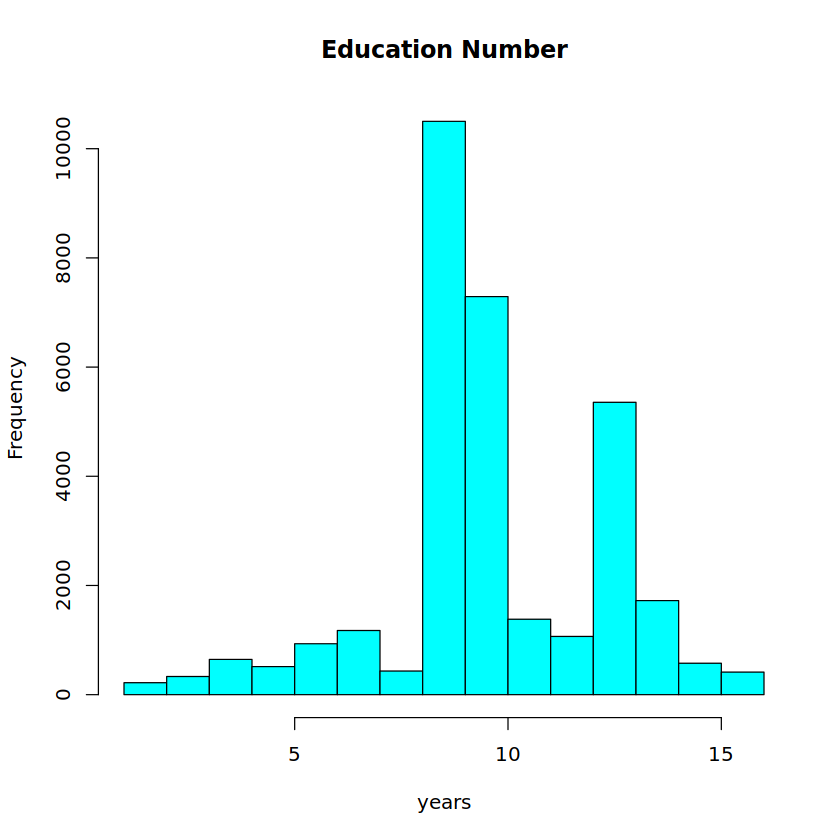

In [9]:
hist(census[['education_num']], main = 'Education Number', xlab = 'years', col = 'cyan')

At this stage we are have done a preliminary data checking in order to observe the dataset in hand. We will use this analysis to desing conservative planned hypothesis which could have been naturally during the period of the data with which we can avoid data dredging.

Nevertheless, we can observe some NA values present in the dataset in the form of values like 99 and 99999. We will analyze them further.

After giving a quick look and checking other sources relevant in 1990s we will test following planned hypothesis in EDA, this does not include the post hoc hypothesis we may perform at that stage:
1. Mean Education Years for American working class is 11.5. We are forming a conservative planned hypothesis here and using data for 1990 specifically as it would be a natural data for this dataset. This Null Hypothesis is formed on the basis of NCES Compiled data in 1990 <sup>[2]</sup>, if we were comparing it across different countries HDI <sup>[3]</sup> based hypothesis of 13.3 would be a better fit for the same period.
2. Proportion of Women in income group of >50k is 0.441. In 1990 as per World Bank data <sup>[3]</sup> percentage of women in american workforce was 44.1%, we will use it as null hypothesis and test the hypothesis that even in high income group this overall proportion holds true.
3. Proportion of workforce having salary more than 50k is 0.15. This null hypthesis has been formed based on the general trend and proportions at 1990 as per data from BLS and Census while following the wage stagnation during that period <sup>[4]</sup>.

For both planned hypothesis above we will use 95% confidence value, and with sufficient power as we can see below. We will perform the test after other steps for EDA, we formed them early so that we can avoid data dredging situation

In [11]:
# Post hoc power analysis for both planned hypothesis
n_sample <- dim(census)[1]
achieved_power <- pwr.t.test(n = n_sample, d = 1/2, sig.level = 0.05, #mean difference assumed is 1 and estimated variance as 4
                             type = "one.sample", alternative = "two.sided")
print(achieved_power)

women_sample = 10771
achieved_power_h2 <- power.prop.test(n = 10771, p1 = 0.441, p2 = 0.35, sig.level = 0.05, alternative = "two.sided") #estimated real prop for h2 is 0.35
print(achieved_power_h2)


     One-sample t test power calculation 

              n = 32561
              d = 0.5
      sig.level = 0.05
          power = 1
    alternative = two.sided


     Two-sample comparison of proportions power calculation 

              n = 10771
             p1 = 0.441
             p2 = 0.35
      sig.level = 0.05
          power = 1
    alternative = two.sided

NOTE: n is number in *each* group



Now we have formed our planned hypothesis and performed post hoc power analysis we are ready to move on to Data Cleaning and further EDA. On a side note, power is enough for our hypothesis because of large number of observations even if we ignore the sample weights and consider only the sample obseervations.

In [13]:
#checking NA Values
print(sum(is.na(census)))
sapply(census, function(x) sum(is.na(x)))

[1] 0


age      workclass         fnlwgt      education  education_num 
             0              0              0              0              0 
marital_status     occupation   relationship           race            sex 
             0              0              0              0              0 
  capital_gain   capital_loss hours_per_week native_country   income_group 
             0              0              0              0              0

In [14]:
dim(census)

[1] 32561    15

In [15]:
summary(census)

      age         workclass             fnlwgt         education        
 Min.   :17.00   Length:32561       Min.   :  12285   Length:32561      
 1st Qu.:28.00   Class :character   1st Qu.: 117827   Class :character  
 Median :37.00   Mode  :character   Median : 178356   Mode  :character  
 Mean   :38.58                      Mean   : 189778                     
 3rd Qu.:48.00                      3rd Qu.: 237051                     
 Max.   :90.00                      Max.   :1484705                     
 education_num   marital_status      occupation        relationship      
 Min.   : 1.00   Length:32561       Length:32561       Length:32561      
 1st Qu.: 9.00   Class :character   Class :character   Class :character  
 Median :10.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :10.08                                                           
 3rd Qu.:12.00                                                           
 Max.   :16.00                               

In [16]:
#checking 99.0 hours per week data 
print(length(census[census$hours_per_week  == 99.0,]))
head(census[census$hours_per_week  == 99.0,])

[1] 15


age workclass         fnlwgt education     education_num
936  37   Private          176900  HS-grad       9           
1173 25   Private          404616  Masters      14           
1888 55   Self-emp-not-inc 184425  Some-college 10           
3579 37   Self-emp-inc     382802  Doctorate    16           
4087 50   ?                174964  10th          6           
4309 35   Self-emp-not-inc 166416  HS-grad       9           
     marital_status      occupation       relationship   race   sex  
936   Married-civ-spouse  Craft-repair     Husband        White  Male
1173  Married-civ-spouse  Farming-fishing  Not-in-family  White  Male
1888  Married-civ-spouse  Farming-fishing  Husband        White  Male
3579  Married-civ-spouse  Prof-specialty   Husband        Black  Male
4087  Married-civ-spouse  ?                Husband        White  Male
4309  Married-civ-spouse  Farming-fishing  Husband        White  Male
     capital_gain capital_loss hours_per_week native_country income_group
936  0            0            99              United-States  >50K       
1173 0            0            99              United-States  >50K       
1888 0            0            99              United-States  >50K       
3579 0            0            99              United-States  >50K       
4087 0            0            99              United-States  <=50K      
4309 0            0            99              United-States  <=50K

In [17]:
#checking 99.0 hours per week data 
print(length(census[census$capital_gain  == 99999,]))
head(census[census$capital_gain  == 99999,])

[1] 15


age workclass     fnlwgt education    education_num marital_status     
1247 54   Self-emp-inc 166459  Prof-school 15             Married-civ-spouse
1369 52   Private      152234  HS-grad      9             Married-civ-spouse
1483 53   Self-emp-inc 263925  HS-grad      9             Married-civ-spouse
1529 52   Private      118025  Bachelors   13             Married-civ-spouse
1617 46   Private      370119  Prof-school 15             Married-civ-spouse
1683 43   Private      176270  Bachelors   13             Married-civ-spouse
     occupation       relationship race                sex   capital_gain
1247  Prof-specialty   Husband      White               Male 99999       
1369  Exec-managerial  Husband      Asian-Pac-Islander  Male 99999       
1483  Sales            Husband      White               Male 99999       
1529  Exec-managerial  Husband      White               Male 99999       
1617  Prof-specialty   Husband      White               Male 99999       
1683  Exec-managerial  Husband      White               Male 99999       
     capital_loss hours_per_week native_country income_group
1247 0            60              United-States  >50K       
1369 0            40              Japan          >50K       
1483 0            40              United-States  >50K       
1529 0            50              United-States  >50K       
1617 0            60              United-States  >50K       
1683 0            60              United-States  >50K

While outliers are common in both of the variables above, specfic values such 99 or 999999 or so are used as reprentative of NA values. Of course, we may be wrong and they may actually contain important data however due to low number of such observations and the fact that data set itself does not provide any information about the na values we will remove them from the dataset for our analysis

In [18]:
data <- census[!(census$capital_gain  == 99999 | census$hours_per_week  == 99.0),]
summary(data)

      age         workclass             fnlwgt         education        
 Min.   :17.00   Length:32317       Min.   :  12285   Length:32317      
 1st Qu.:28.00   Class :character   1st Qu.: 117849   Class :character  
 Median :37.00   Mode  :character   Median : 178470   Mode  :character  
 Mean   :38.53                      Mean   : 189837                     
 3rd Qu.:48.00                      3rd Qu.: 237065                     
 Max.   :90.00                      Max.   :1484705                     
 education_num   marital_status      occupation        relationship      
 Min.   : 1.00   Length:32317       Length:32317       Length:32317      
 1st Qu.: 9.00   Class :character   Class :character   Class :character  
 Median :10.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :10.07                                                           
 3rd Qu.:12.00                                                           
 Max.   :16.00                               

In [19]:
#checking categorial variables specifically as there can be some na values there too
cat_cols <- sapply(data, function(x) !is.numeric(x))
cat_data <- data[, cat_cols]
head(cat_data)

workclass         education  marital_status      occupation        
1  State-gov         Bachelors  Never-married       Adm-clerical     
2  Self-emp-not-inc  Bachelors  Married-civ-spouse  Exec-managerial  
3  Private           HS-grad    Divorced            Handlers-cleaners
4  Private           11th       Married-civ-spouse  Handlers-cleaners
5  Private           Bachelors  Married-civ-spouse  Prof-specialty   
6  Private           Masters    Married-civ-spouse  Exec-managerial  
  relationship   race   sex     native_country income_group
1  Not-in-family  White  Male    United-States  <=50K      
2  Husband        White  Male    United-States  <=50K      
3  Not-in-family  White  Male    United-States  <=50K      
4  Husband        Black  Male    United-States  <=50K      
5  Wife           Black  Female  Cuba           <=50K      
6  Wife           White  Female  United-States  <=50K

In [20]:
for (col in names(cat_data)) {
  print(paste("Table for", col))
  print(table(data[[col]]))
}

[1] "Table for workclass"

                ?       Federal-gov         Local-gov      Never-worked 
             1827               958              2083                 7 
          Private      Self-emp-inc  Self-emp-not-inc         State-gov 
            22570              1071              2491              1296 
      Without-pay 
               14 
[1] "Table for education"

         10th          11th          12th       1st-4th       5th-6th 
          926          1174           432           168           333 
      7th-8th           9th    Assoc-acdm     Assoc-voc     Bachelors 
          639           512          1062          1377          5304 
    Doctorate       HS-grad       Masters     Preschool   Prof-school 
          394         10460          1698            51           524 
 Some-college 
         7263 
[1] "Table for marital_status"

              Divorced      Married-AF-spouse     Married-civ-spouse 
                  4421                     23             

From the above analysis we can see that while categorial data does not have specific NA values there are observations associated with ? value which might indicate NA values

In [21]:
#brief look at ? related data and we can observe that it may have arose during to data collection itself 
head(cat_data[cat_data$workclass == ' ?',])

workclass education     marital_status         occupation relationship  
28   ?         Some-college  Married-civ-spouse     ?          Husband      
62   ?         7th-8th       Married-spouse-absent  ?          Not-in-family
70   ?         Some-college  Never-married          ?          Own-child    
78   ?         10th          Married-civ-spouse     ?          Husband      
107  ?         10th          Never-married          ?          Own-child    
129  ?         HS-grad       Married-civ-spouse     ?          Husband      
    race                sex     native_country income_group
28   Asian-Pac-Islander  Male    South          >50K       
62   White               Male    ?              <=50K      
70   White               Male    United-States  <=50K      
78   White               Male    United-States  <=50K      
107  White               Female  United-States  <=50K      
129  White               Male    United-States  <=50K

In [22]:
data[, cat_cols] <- lapply(data[, cat_cols], function(x) {
  x[x == " ?"] <- NA
  return(x)
})

data = na.omit(data)

In [23]:
#after removing NA values dataset has 29936 rows
print(sum(is.na(data)))
print(dim(data))

[1] 0
[1] 29936    15


In [24]:
head(data)

age workclass         fnlwgt education  education_num marital_status     
1 39   State-gov         77516  Bachelors 13             Never-married     
2 50   Self-emp-not-inc  83311  Bachelors 13             Married-civ-spouse
3 38   Private          215646  HS-grad    9             Divorced          
4 53   Private          234721  11th       7             Married-civ-spouse
5 28   Private          338409  Bachelors 13             Married-civ-spouse
6 37   Private          284582  Masters   14             Married-civ-spouse
  occupation         relationship   race   sex     capital_gain capital_loss
1  Adm-clerical       Not-in-family  White  Male   2174         0           
2  Exec-managerial    Husband        White  Male      0         0           
3  Handlers-cleaners  Not-in-family  White  Male      0         0           
4  Handlers-cleaners  Husband        Black  Male      0         0           
5  Prof-specialty     Wife           Black  Female    0         0           
6  Exec-managerial    Wife           White  Female    0         0           
  hours_per_week native_country income_group
1 40              United-States  <=50K      
2 13              United-States  <=50K      
3 40              United-States  <=50K      
4 40              United-States  <=50K      
5 40              Cuba           <=50K      
6 40              United-States  <=50K

In [17]:
summary(data)

      age         workclass             fnlwgt         education        
 Min.   :17.00   Length:29936       Min.   :  13769   Length:29936      
 1st Qu.:28.00   Class :character   1st Qu.: 117679   Class :character  
 Median :37.00   Mode  :character   Median : 178514   Mode  :character  
 Mean   :38.39                      Mean   : 189846                     
 3rd Qu.:47.00                      3rd Qu.: 237647                     
 Max.   :90.00                      Max.   :1484705                     
 education_num   marital_status      occupation        relationship      
 Min.   : 1.00   Length:29936       Length:29936       Length:29936      
 1st Qu.: 9.00   Class :character   Class :character   Class :character  
 Median :10.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :10.11                                                           
 3rd Qu.:12.00                                                           
 Max.   :16.00                               

In [25]:
#reinitiating cols data
cat_cols <- sapply(data, function(x) !is.numeric(x))
cat_data <- data[, cat_cols]
                   
for (col in names(cat_data)) {
  print(paste("Table for", col))
  print(table(data[[col]]))
}

[1] "Table for workclass"

      Federal-gov         Local-gov           Private      Self-emp-inc 
              941              2058             22165              1032 
 Self-emp-not-inc         State-gov       Without-pay 
             2449              1277                14 
[1] "Table for education"

         10th          11th          12th       1st-4th       5th-6th 
          815          1047           376           151           288 
      7th-8th           9th    Assoc-acdm     Assoc-voc     Bachelors 
          552           453          1004          1302          4998 
    Doctorate       HS-grad       Masters     Preschool   Prof-school 
          357          9801          1603            45           491 
 Some-college 
         6653 
[1] "Table for marital_status"

              Divorced      Married-AF-spouse     Married-civ-spouse 
                  4194                     21                  13892 
 Married-spouse-absent          Never-married              Sep

We will fit three type of models in this notebook: Linear Models, Bayesian Heirarchical model, and a Logistic Regression based Deep Learning Model. And for them we need different type of datasets

During our project we tested multiple versions of this dataset and found that only by reducing the levels across the categorial variables we would be able to reduce multicollinearity for linear and bayesian models. For the basic neurel network there is no need to do so.

In [26]:
#IN GAM or GLM number of tests can lead to faulty tests so we will try to reduce the number of groups across the dataset logically

df_gm <- subset(data, select = -c(native_country)) #first we will remove native country altogether
head(df_gm)

age workclass         fnlwgt education  education_num marital_status     
1 39   State-gov         77516  Bachelors 13             Never-married     
2 50   Self-emp-not-inc  83311  Bachelors 13             Married-civ-spouse
3 38   Private          215646  HS-grad    9             Divorced          
4 53   Private          234721  11th       7             Married-civ-spouse
5 28   Private          338409  Bachelors 13             Married-civ-spouse
6 37   Private          284582  Masters   14             Married-civ-spouse
  occupation         relationship   race   sex     capital_gain capital_loss
1  Adm-clerical       Not-in-family  White  Male   2174         0           
2  Exec-managerial    Husband        White  Male      0         0           
3  Handlers-cleaners  Not-in-family  White  Male      0         0           
4  Handlers-cleaners  Husband        Black  Male      0         0           
5  Prof-specialty     Wife           Black  Female    0         0           
6  Exec-managerial    Wife           White  Female    0         0           
  hours_per_week income_group
1 40              <=50K      
2 13              <=50K      
3 40              <=50K      
4 40              <=50K      
5 40              <=50K      
6 40              <=50K

In [28]:
#reducing the factor levels across the categories by recoding their classes logically

df_gm <- df_gm %>%
  mutate(
    # Recode workclass into four groups
    workclass = recode(workclass,
      " Private" = "Private",
      " Private" = "Private",
      " State-gov" = "Government",
      " Federal-gov" = "Government",
      " Local-gov" = "Government",
      " Self-emp-inc" = "Self-employed",
      " Self-emp-not-inc" = "Self-employed",
      " Without-pay" = "Unpaid/Other"
    ),
    # Recode education:
    education = case_when(
      education %in% c(" Preschool", " 1st-4th", " 5th-6th", " 7th-8th") ~ "Less than High School",
      education %in% c(" 9th", " 10th", " 11th", " 12th", " HS-grad") ~ "High School",
      education %in% c(" Some-college", " Assoc-acdm", ' Assoc-voc') ~ "Some College/Associate",
      education == " Bachelors" ~ "Bachelors",
      education == " Masters" ~ "Masters",
      education == " Doctorate" ~ "Doctorate",
      TRUE ~ "Other"
    ),
    # Recode marital status into two groups
    marital_status = ifelse(marital_status %in% c(" Married-civ-spouse", " Married-AF-spouse", " Married-spouse-absent"),
                           " Married", " Not Married"),
    # Recode relationship into three groups
    relationship = case_when(
      relationship %in% c(" Husband", " Wife") ~ "Spouse/Partner",
      relationship == " Own-child" ~ "Child",
      relationship %in% c(" Other relative", " Not in family", " Unmarried") ~ "Other/Nonfamily",
      TRUE ~ "Other/Nonfamily"
    ),
    occupation = case_when(
    occupation %in% c(" Exec-managerial", " Prof-specialty", " Tech-support") ~ "Management/Professional",
    occupation %in% c(" Adm-clerical", " Sales") ~ "Office/Clerical & Sales",
    occupation %in% c(" Handlers-cleaners", " Machine-op-inspct", " Craft-repair", " Transport-moving/cr", 
                      " Farming-fishing", " Other-service", " Priv-house-serv", " Protective-serv", " Armed-Forces") ~ "Manual/Service",
    TRUE ~ "Other"  # for any unexpected levels
  )
  )



In [29]:
head(df_gm)

age workclass     fnlwgt education   education_num marital_status
1 39  Government     77516 Bachelors   13             Not Married  
2 50  Self-employed  83311 Bachelors   13             Married      
3 38  Private       215646 High School  9             Not Married  
4 53  Private       234721 High School  7             Married      
5 28  Private       338409 Bachelors   13             Married      
6 37  Private       284582 Masters     14             Married      
  occupation              relationship    race   sex     capital_gain
1 Office/Clerical & Sales Other/Nonfamily  White  Male   2174        
2 Management/Professional Spouse/Partner   White  Male      0        
3 Manual/Service          Other/Nonfamily  White  Male      0        
4 Manual/Service          Spouse/Partner   Black  Male      0        
5 Management/Professional Spouse/Partner   Black  Female    0        
6 Management/Professional Spouse/Partner   White  Female    0        
  capital_loss hours_per_week income_group
1 0            40              <=50K      
2 0            13              <=50K      
3 0            40              <=50K      
4 0            40              <=50K      
5 0            40              <=50K      
6 0            40              <=50K

In [30]:
summary(df_gm)

      age         workclass             fnlwgt         education        
 Min.   :17.00   Length:29936       Min.   :  13769   Length:29936      
 1st Qu.:28.00   Class :character   1st Qu.: 117679   Class :character  
 Median :37.00   Mode  :character   Median : 178514   Mode  :character  
 Mean   :38.39                      Mean   : 189846                     
 3rd Qu.:47.00                      3rd Qu.: 237647                     
 Max.   :90.00                      Max.   :1484705                     
 education_num   marital_status      occupation        relationship      
 Min.   : 1.00   Length:29936       Length:29936       Length:29936      
 1st Qu.: 9.00   Class :character   Class :character   Class :character  
 Median :10.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :10.11                                                           
 3rd Qu.:12.00                                                           
 Max.   :16.00                               

In [24]:
#reinitiating cols data
cat_cols <- sapply(df_gm, function(x) !is.numeric(x))
cat_data <- df_gm[, cat_cols]
                   
for (col in names(cat_data)) {
  print(paste("Table for", col))
  print(prop.table(table(df_gm[[col]])))
}

#reduced levels are indeed much more sensible and informative than before while also having reduced complexities

[1] "Table for workclass"

   Government       Private Self-employed  Unpaid/Other 
 0.1428380545  0.7404128808  0.1162814003  0.0004676644 
[1] "Table for education"

             Bachelors              Doctorate            High School 
            0.16695617             0.01192544             0.41729022 
 Less than High School                Masters                  Other 
            0.03460716             0.05354757             0.01640166 
Some College/Associate 
            0.29927178 
[1] "Table for marital_status"

     Married  Not Married 
    0.477051     0.522949 
[1] "Table for occupation"

Management/Professional          Manual/Service Office/Clerical & Sales 
             0.29419428              0.41074292              0.24291823 
                  Other 
             0.05214458 
[1] "Table for relationship"

          Child Other/Nonfamily  Spouse/Partner 
      0.1490179       0.3934059       0.4575762 
[1] "Table for race"

 Amer-Indian-Eskimo  Asian-Pac-Islander     

Now we will plot the categorial and numerical variables and analyse the data in hand.

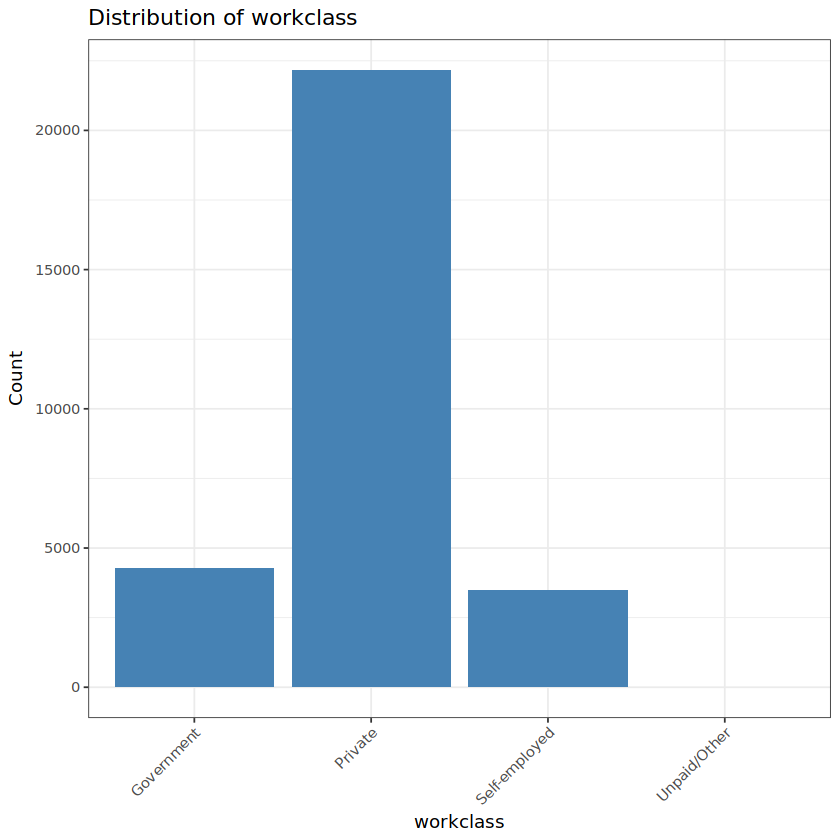

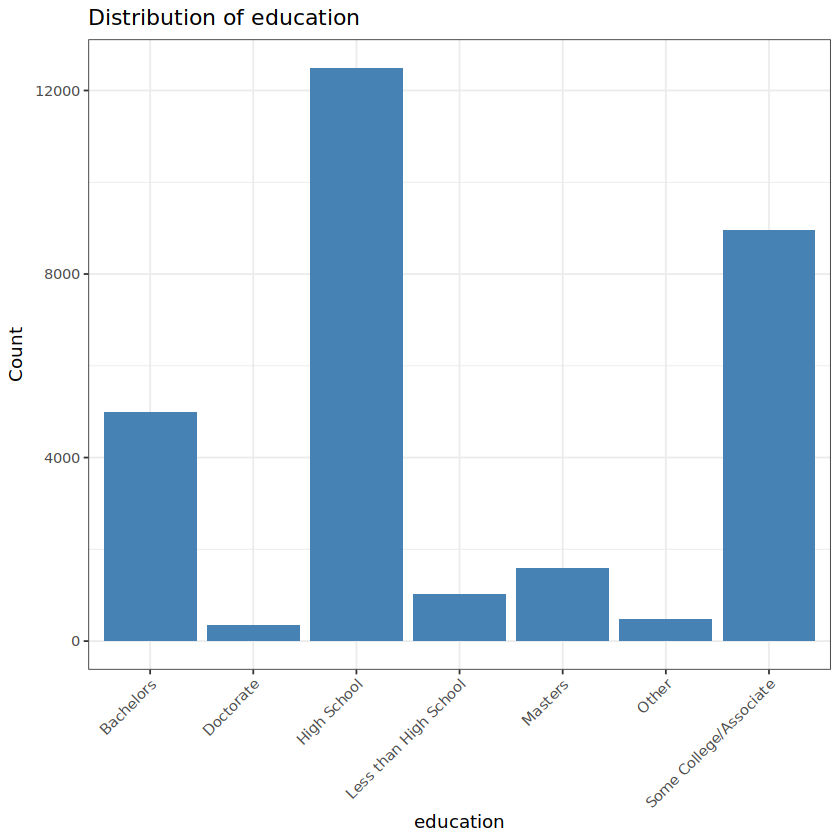

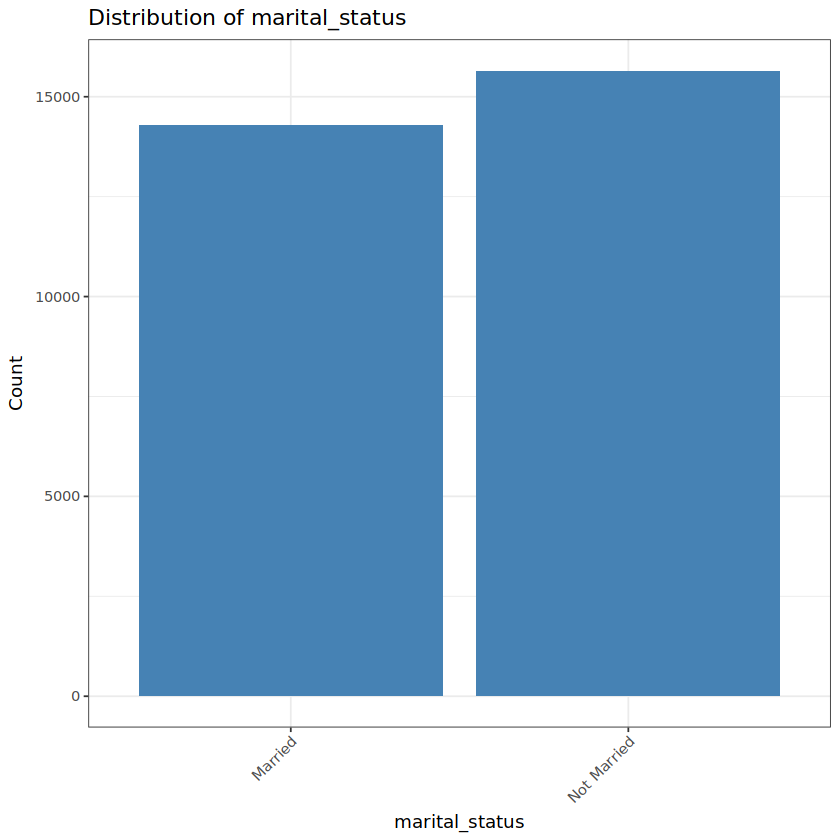

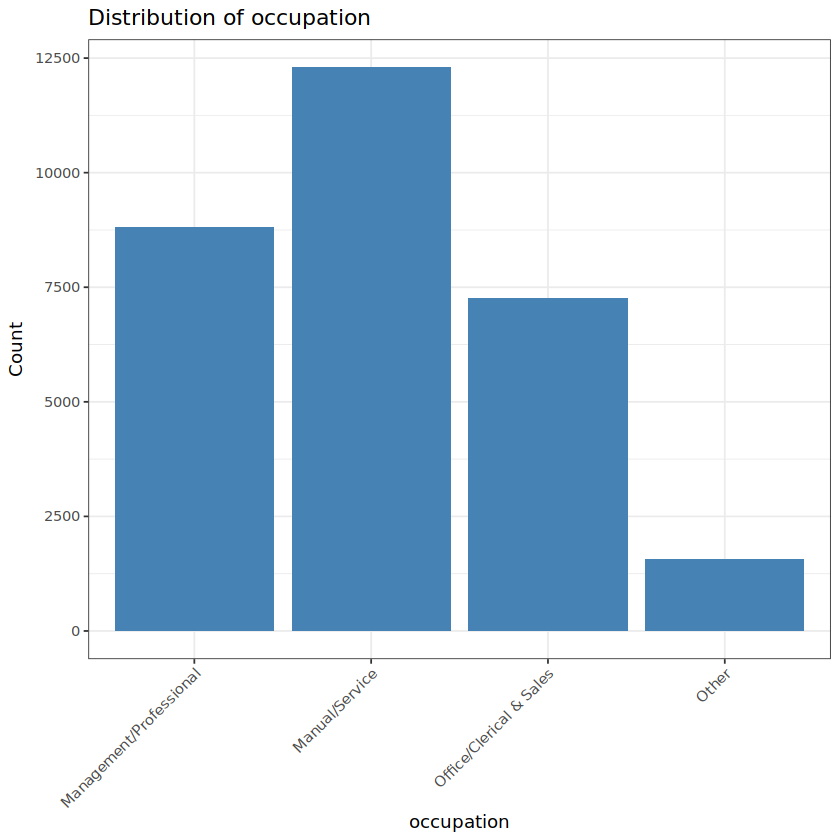

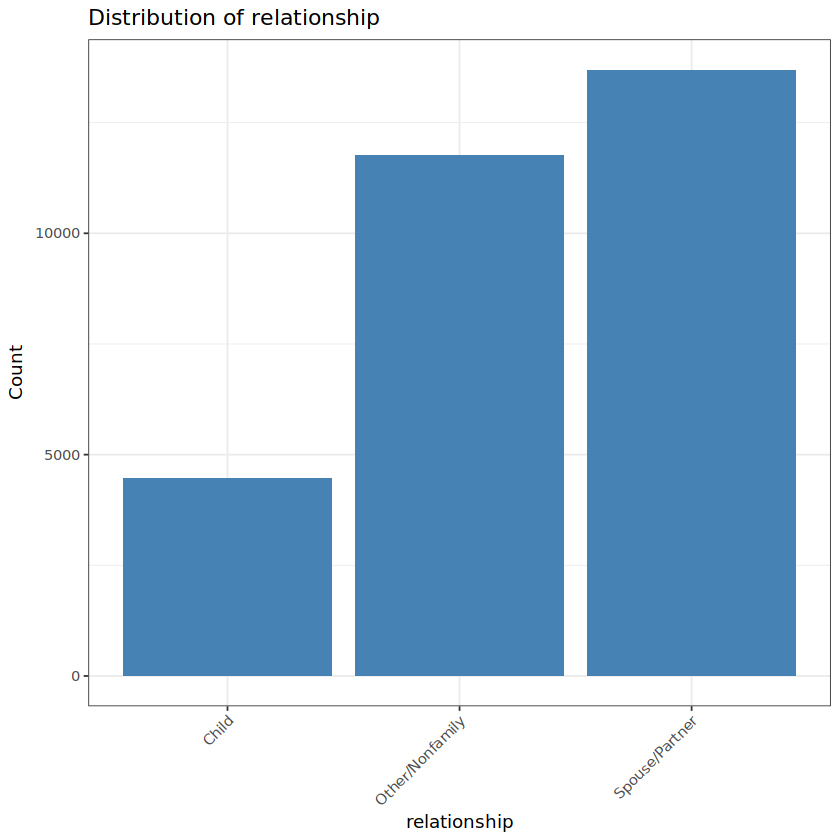

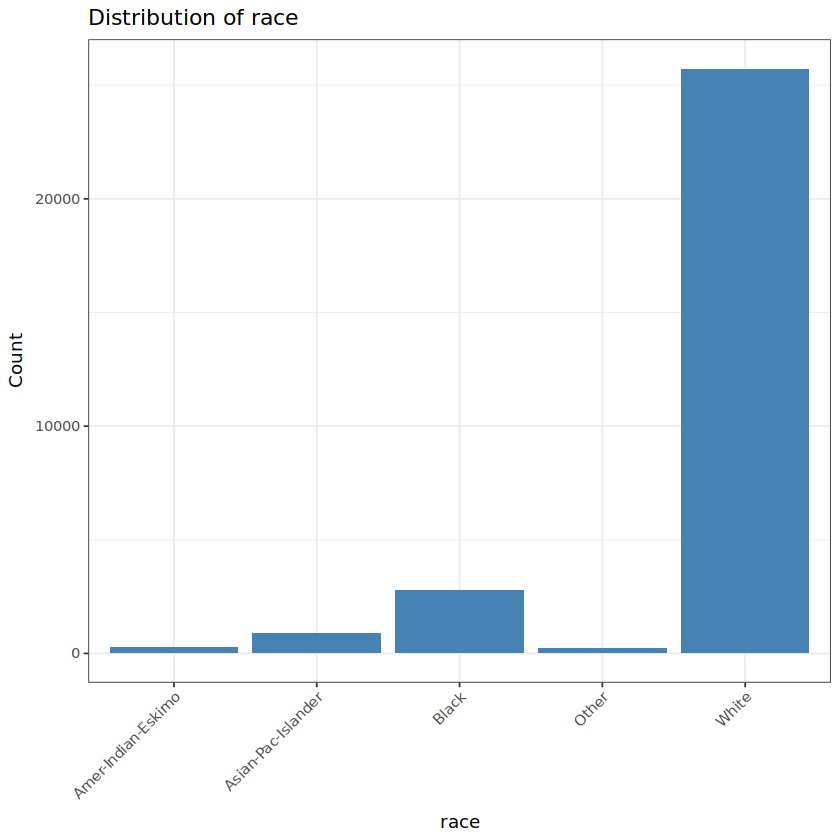

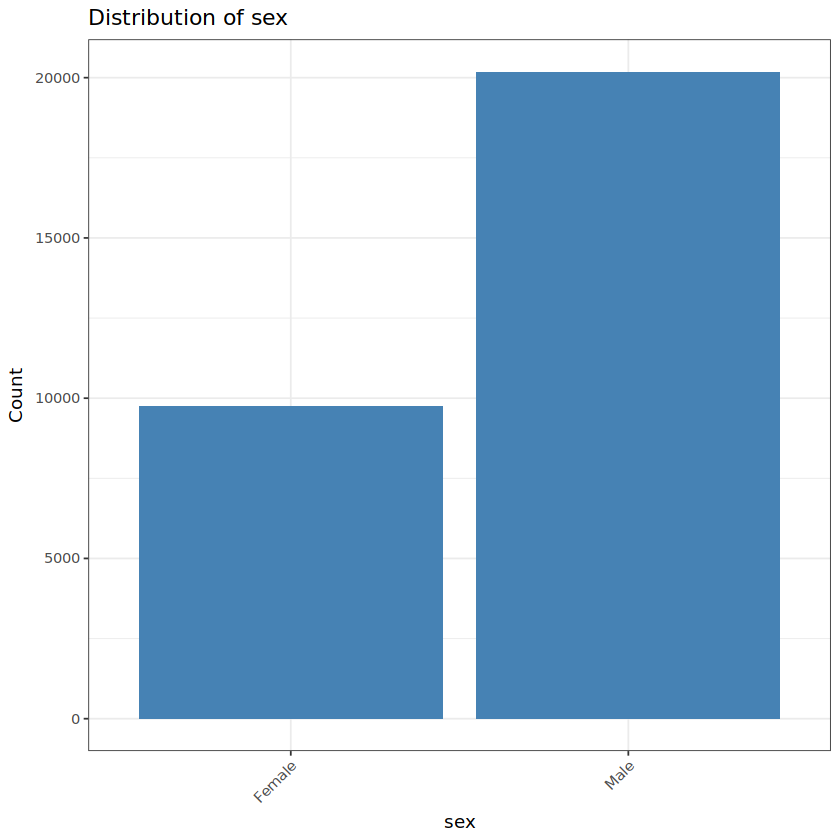

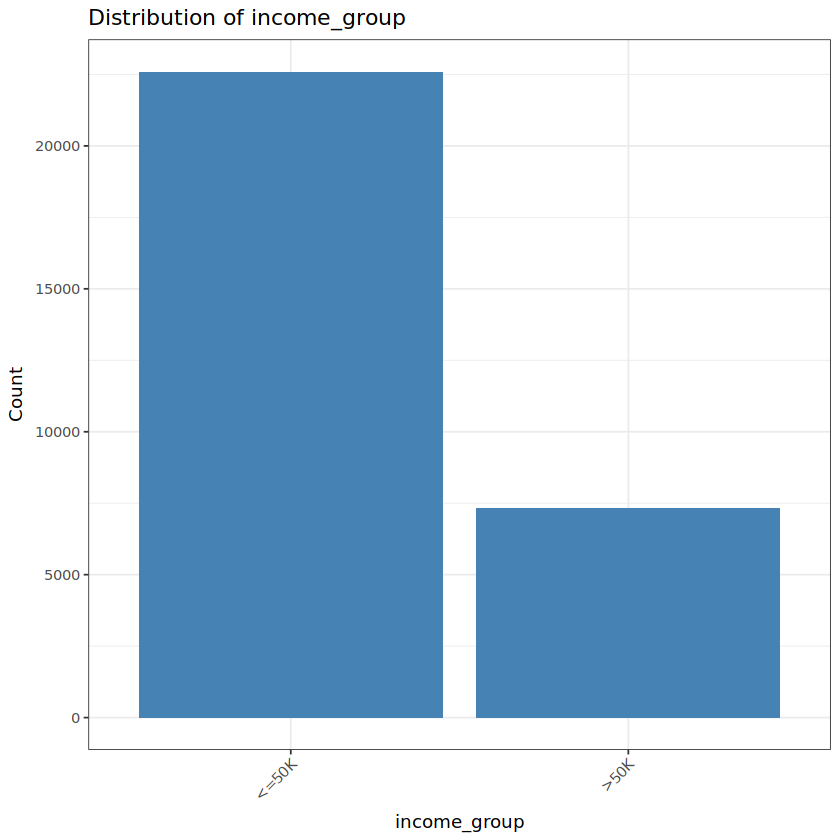

In [27]:
for (var in names(cat_data)) {
  p <- ggplot(df_gm, aes_string(x = var)) +
    geom_bar(fill = "steelblue") +
    theme_bw() +
    labs(title = paste("Distribution of", var),
         x = var, y = "Count") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))
  
  print(p)
}

From above graphs we have following observations:
1. Most of the workforce have been employed in private sector with 74% of the sample falling in this group.
2. Most of the workforce have highschool as highest education followed by at least some college education,
3. Proportion of married vs not married is quite similar with 52% people not married, not that this category include divorced, widowed, and other similar categories besides not marrying at all.
4. Most of the workforce were employed manual/service sector.
5. Around 85% of our sample is represented by white race which is not a unique observation overall. However it would be interesting to observe unemployment across the races too with this data, sadly we don't have similar dataset across similar timeline on our hand.
6. 67% of workforce in the dataset are men which is quite unexpected as there should have been some difference but not this much of a difference.
7. Around 24% of the observations have more than 50k income a year. It is to be noted that the observations are weighted so this value is not a representative of the population.

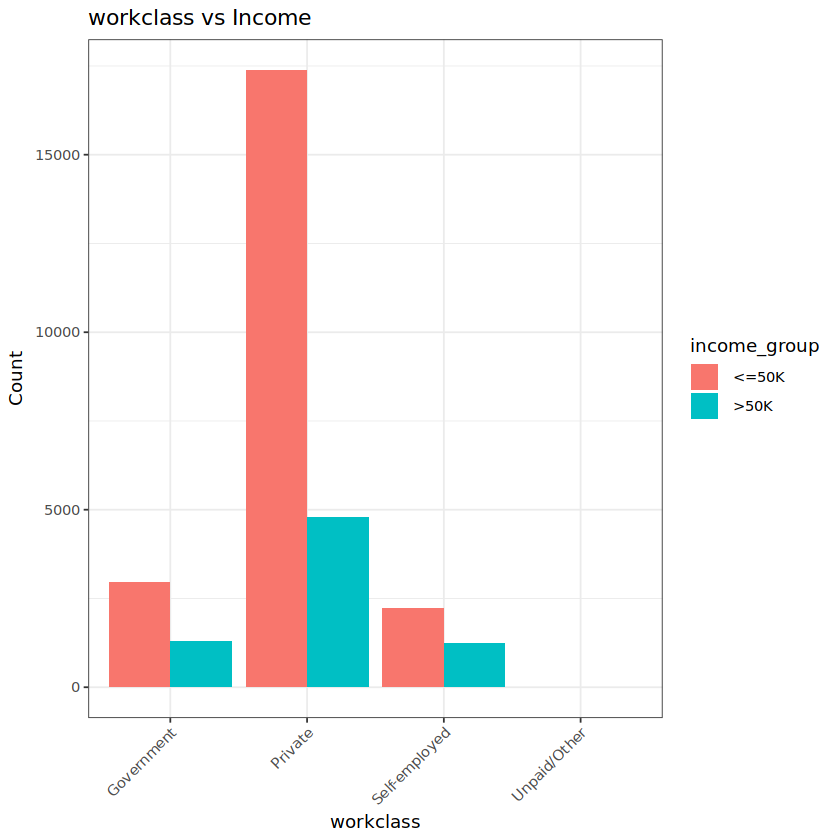

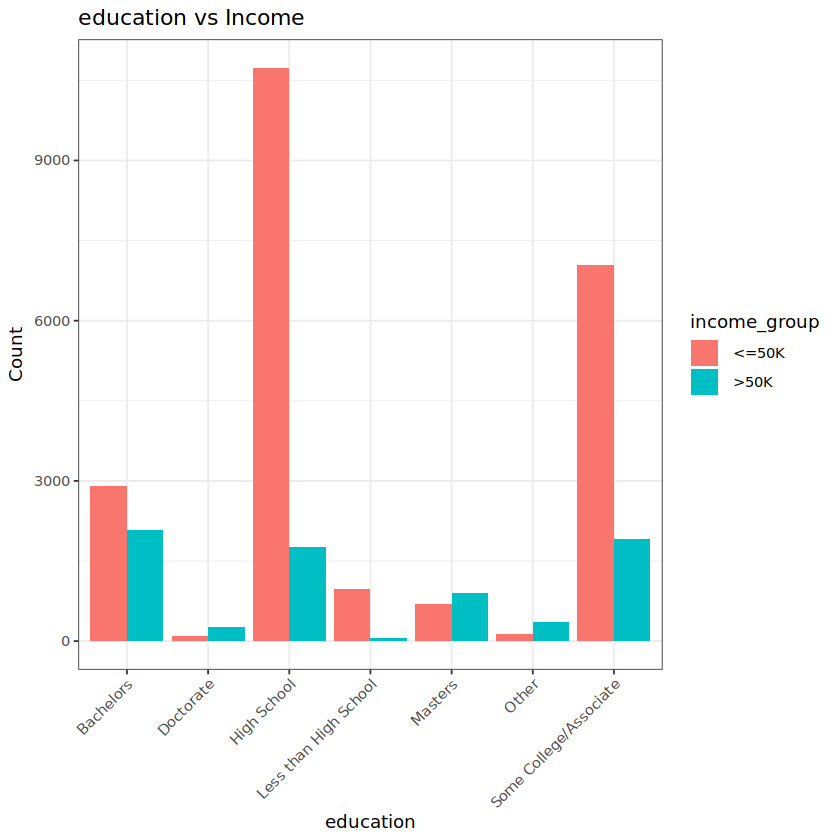

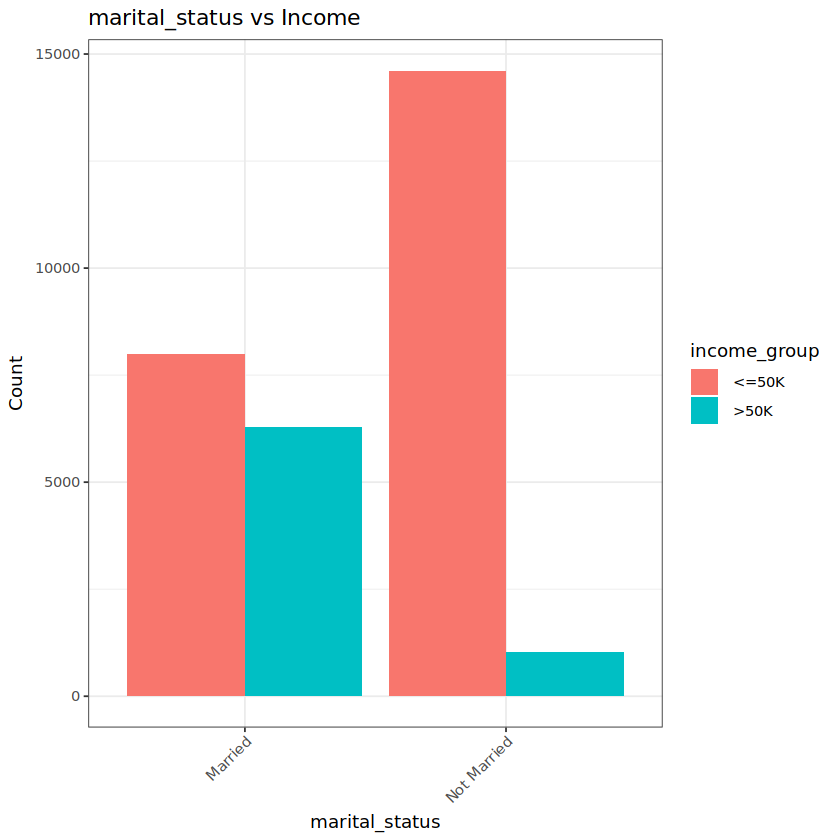

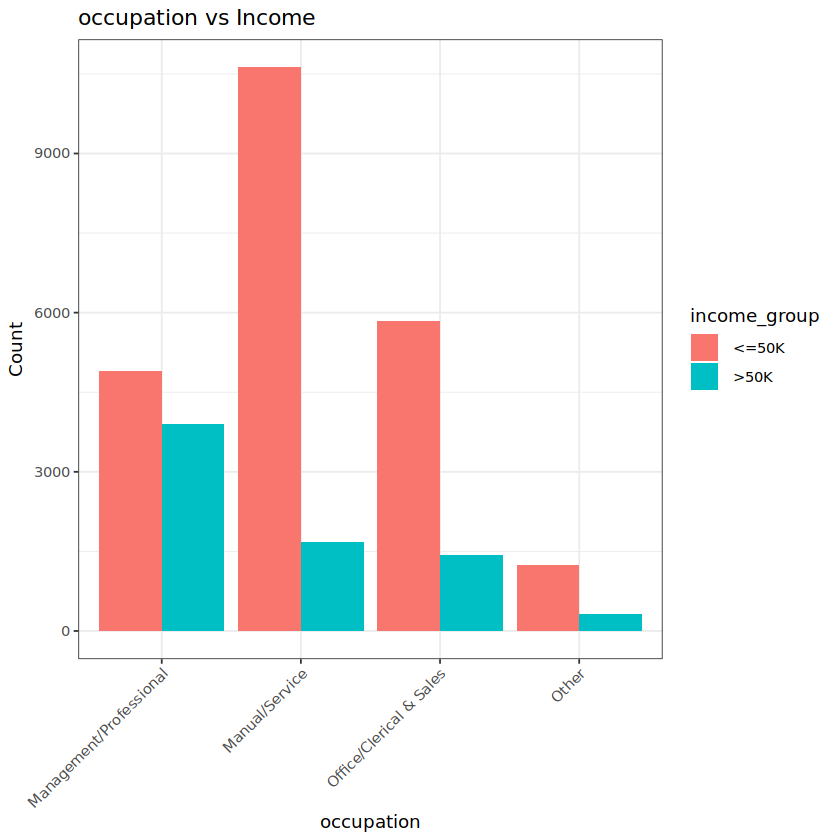

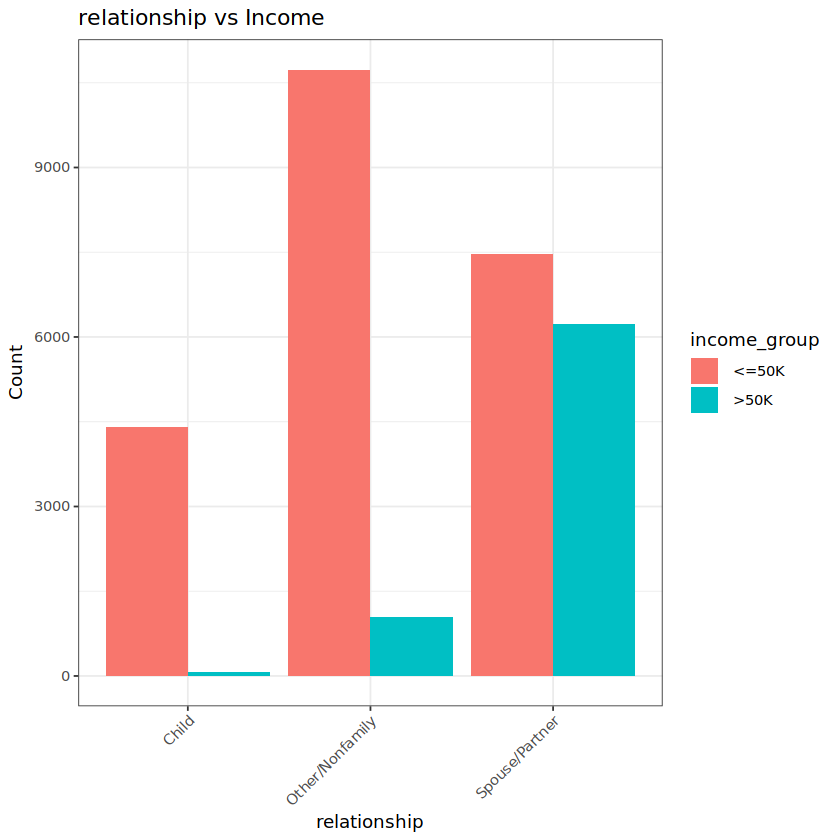

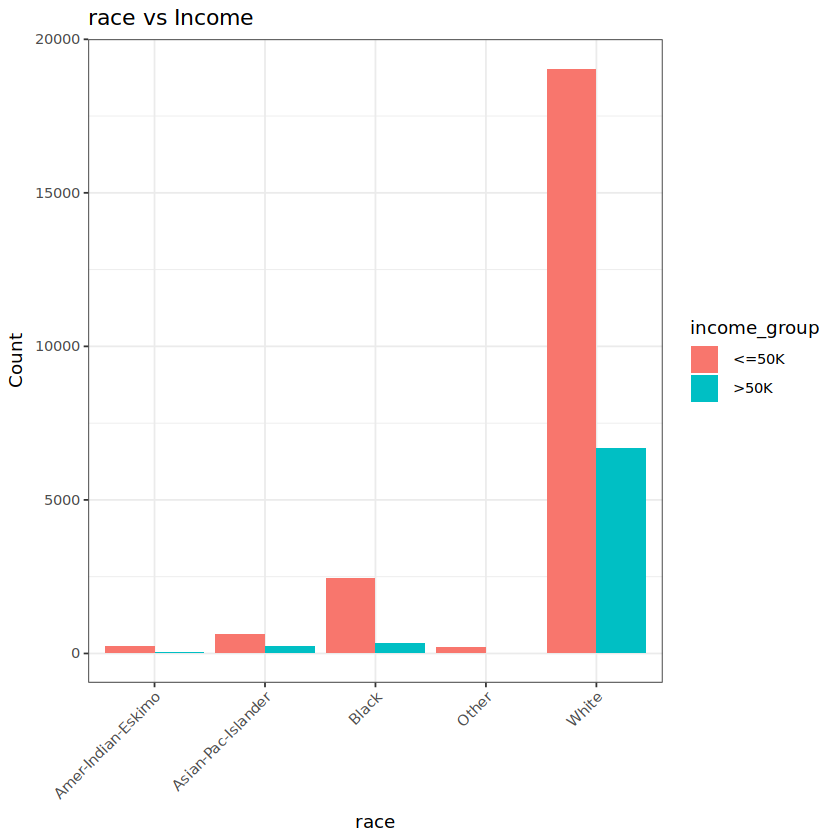

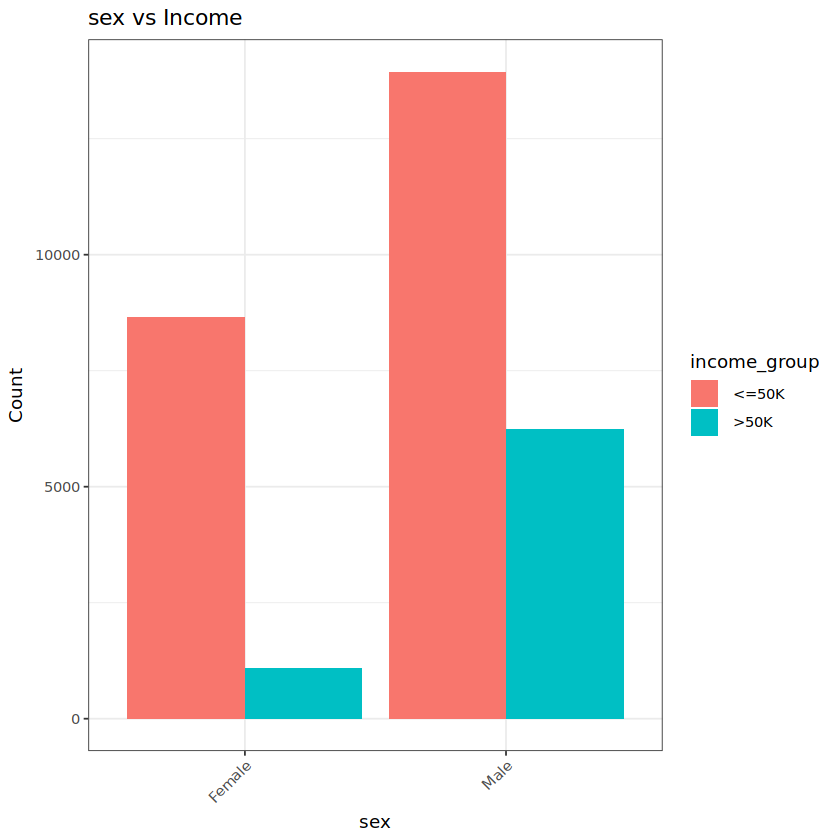

In [26]:
# Check the association between workclass and income
for (var in names(cat_data)) {
    if (var != 'income_group'){
  p <- ggplot(df_gm, aes_string(x = var, fill = 'income_group')) +
    geom_bar(position = 'dodge') +
    theme_bw() +
    labs(title = paste(var,'vs Income'),
         x = var, y = "Count") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))
  
  print(p)
}}

Above barplots provide us wiht more important observations than previous plots:
1. Masters, Doctrates, and Professional degrees incldued in other are the only categories where we have more number of workforce having more than 50k income. This also supports a general consensus that higher education leads to better salary overall.
2. Proportion of people having income greater than 50k is way less in not married class than the married class. This is an interesting observation as proportions should have been equal overall. It shows that married couples have more income overall.
3. Management and Professional vocations have larger proportion of the workforce in income above 50k. While present day data may differ it shows that in 1990s management and professional vocations indeed were more lucrative than manual, sales, and other jobs.

Readers can observe some of the proportions contained in the contingency tables below for higher precisions.

In [309]:
CrossTable(df_gm$marital_status, df_gm$income_group, prop.chisq = FALSE)


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  29936 

 
                     | df_gm$income_group 
df_gm$marital_status |     <=50K |      >50K | Row Total | 
---------------------|-----------|-----------|-----------|
             Married |      7987 |      6294 |     14281 | 
                     |     0.559 |     0.441 |     0.477 | 
                     |     0.353 |     0.858 |           | 
                     |     0.267 |     0.210 |           | 
---------------------|-----------|-----------|-----------|
         Not Married |     14614 |      1041 |     15655 | 
                     |     0.934 |     0.066 |     0.523 | 
                     |     0.647 |     0.142 |           | 
                     |     0.488 |     0.035 |           | 
---------------------|-----------|-----------|-----------|
        C

In [313]:
CrossTable(df_gm$occupation, df_gm$income_group, prop.chisq = FALSE)


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  29936 

 
                        | df_gm$income_group 
       df_gm$occupation |     <=50K |      >50K | Row Total | 
------------------------|-----------|-----------|-----------|
Management/Professional |      4897 |      3910 |      8807 | 
                        |     0.556 |     0.444 |     0.294 | 
                        |     0.217 |     0.533 |           | 
                        |     0.164 |     0.131 |           | 
------------------------|-----------|-----------|-----------|
         Manual/Service |     10622 |      1674 |     12296 | 
                        |     0.864 |     0.136 |     0.411 | 
                        |     0.470 |     0.228 |           | 
                        |     0.355 |     0.056 |           | 
------------------------|-------

In [312]:
CrossTable(df_gm$workclass, df_gm$income_group, prop.chisq = FALSE)


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  29936 

 
                | df_gm$income_group 
df_gm$workclass |     <=50K |      >50K | Row Total | 
----------------|-----------|-----------|-----------|
     Government |      2966 |      1310 |      4276 | 
                |     0.694 |     0.306 |     0.143 | 
                |     0.131 |     0.179 |           | 
                |     0.099 |     0.044 |           | 
----------------|-----------|-----------|-----------|
        Private |     17383 |      4782 |     22165 | 
                |     0.784 |     0.216 |     0.740 | 
                |     0.769 |     0.652 |           | 
                |     0.581 |     0.160 |           | 
----------------|-----------|-----------|-----------|
  Self-employed |      2238 |      1243 |      3481 | 
                |  

Above crosstables are only some of the further analysis we can do for the categorial variables. It is showing similar observations to the graphs before it generally, for example Self employed has highest proportion of the higher income group with 35.7% of them falling in this category, more than 80% of people employed in Manual and Sales based vocations have less than 50k income per year, and so on.

Now we will analyze numerical data.

      age            fnlwgt        education_num    capital_gain    
 Min.   :17.00   Min.   :  13769   Min.   : 1.00   Min.   :    0.0  
 1st Qu.:28.00   1st Qu.: 117679   1st Qu.: 9.00   1st Qu.:    0.0  
 Median :37.00   Median : 178514   Median :10.00   Median :    0.0  
 Mean   :38.39   Mean   : 189846   Mean   :10.11   Mean   :  603.6  
 3rd Qu.:47.00   3rd Qu.: 237647   3rd Qu.:12.00   3rd Qu.:    0.0  
 Max.   :90.00   Max.   :1484705   Max.   :16.00   Max.   :41310.0  
  capital_loss     hours_per_week 
 Min.   :   0.00   Min.   : 1.00  
 1st Qu.:   0.00   1st Qu.:40.00  
 Median :   0.00   Median :40.00  
 Mean   :  88.68   Mean   :40.73  
 3rd Qu.:   0.00   3rd Qu.:45.00  
 Max.   :4356.00   Max.   :98.00  

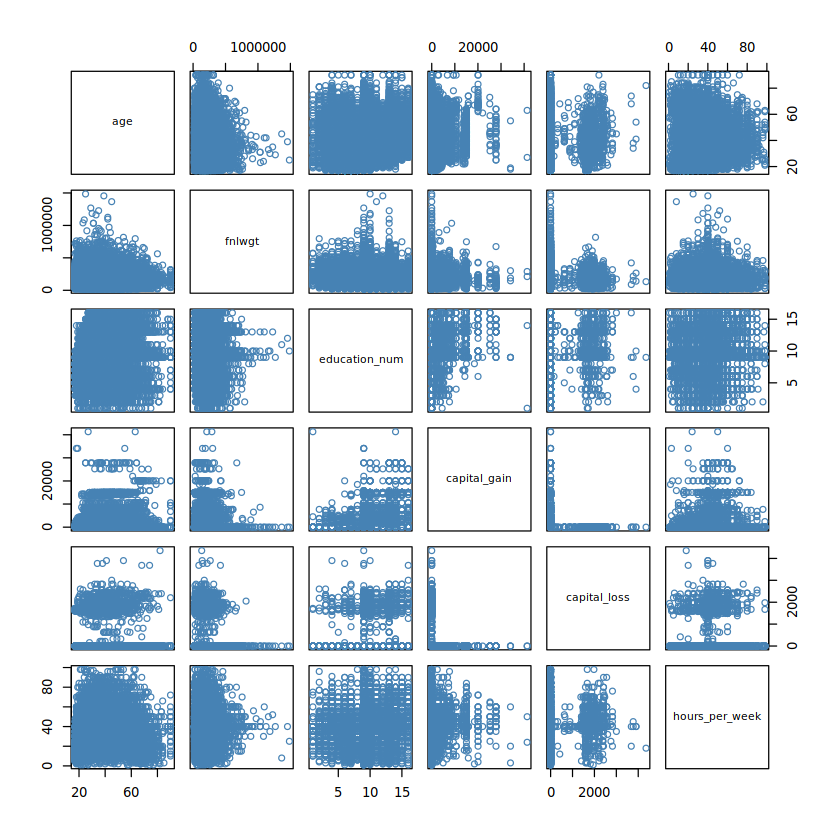

In [58]:
#subsetting dataset for numerical variables

df_gm_n <- df_gm[,sapply(df_gm, is.numeric)]
summary(df_gm_n)
pairs(df_gm_n, col = 'steelblue')

Pair plots give only a basic overview here with few relationship observable, this may imply to the fact that across the numerical variables we don't have high degrees of correlation, we will analyze this fact further with correlation plots and table.

In [448]:
#numerical variables summary across the workclass groups

df_gm %>%
  group_by(workclass) %>%
  summarize(mean_age = mean(age),
            median_age = median(age),
            mean_edu_num = mean(education_num),
            mean_hpw = mean(hours_per_week),
            mean_cap_gain = mean(capital_gain),
            count = n()) %>%
            print()

# A tibble: 4 × 7
  workclass     mean_age median_age mean_edu_num mean_hpw mean_cap_gain count
  <chr>            <dbl>      <dbl>        <dbl>    <dbl>         <dbl> <int>
1 Government        41.2         41        11.1      40.4          624.  4276
2 Private           36.8         35         9.86     40.1          530. 22165
3 Self-employed     45.3         44        10.5      45.2         1046.  3481
4 Unpaid/Other      47.8         57         9.07     32.7          488.    14


Mean age and capital gain seems to be different between most of the groups, we can perform post hoc hypothesis tests for it but its not the object of interest in our project and effect seems big enough to be true. Education mean is higher for government but for other categories its similar, and mean hours per week is quite different for self employed and unpaid employees

In [52]:
#numerical variables summary across the workclass groups

df_gm %>%
  group_by(sex) %>%
  summarize(mean_age = mean(age),
            median_age = median(age),
            mean_edu_num = mean(education_num),
            mean_hpw = mean(hours_per_week),
            mean_cap_gain = mean(capital_gain),
            count = n()) %>%
            print()

# A tibble: 2 × 7
  sex       mean_age median_age mean_edu_num mean_hpw mean_cap_gain count
  <chr>        <dbl>      <int>        <dbl>    <dbl>         <dbl> <int>
1 " Female"     36.9         35         10.1     36.8          367.  9747
2 " Male"       39.1         38         10.1     42.6          718. 20189


In [49]:
#weight summary across the sex or genders

df_gm %>%
  group_by(sex) %>%
  summarize(mean_weight = mean(fnlwgt),
            median_weight = median(age),
            count = n()) %>%
            print()

# A tibble: 2 × 4
  sex       mean_weight median_weight count
  <chr>           <dbl>         <int> <int>
1 " Female"     186024.            35  9747
2 " Male"       191692.            38 20189


In [54]:
#weight summary across the sex or genders

df_gm %>%
  group_by(sex, income_group) %>%
  summarize(mean_weight = mean(fnlwgt),
            median_weight = median(fnlwgt),
            max_weight = max(fnlwgt),
            count = n()) %>%
            print()

`summarise()` has grouped output by 'sex'. You can override using the `.groups` argument.


# A tibble: 4 × 6
# Groups:   sex [2]
  sex       income_group mean_weight median_weight max_weight count
  <chr>     <chr>              <dbl>         <dbl>      <int> <int>
1 " Female" " <=50K"         186242.        176448    1484705  8656
2 " Female" " >50K"          184296.        174640     953588  1091
3 " Male"   " <=50K"         193031.        181810    1455435 13945
4 " Male"   " >50K"          188701.        176683    1226583  6244


Above three grouped summaries are important for this project. Proportion of women in workforce was easily more than 40% in 1990s in US however for our sample we got only around 25% of women in workforce so we also checked the weights for the groups above and found that weights for female and male less than 50k is almost equal in all respect with a big difference in max weights for only high income group across the gender. This implies that overall weights are distributed equally across the sample observations and female grouped observations were given similar weights like men, of course maybe authors of the dataset made some mistake in this respect and underrepresented female population in US for the 1994 census. This aspect needs more analysis preferable from different census data and other US Employment based data for the same period.

Regardless, mean age, capital gain, and hours per week of women employees are quite lower than their male counterpart with similar education years. 

In [56]:
#numerical summary across the income_group

df_gm %>%
  group_by(income_group) %>%
  summarize(mean_age = mean(age),
            mean_edu_num = mean(education_num),
            mean_hpw = mean(hours_per_week),
            mean_cap_gain = mean(capital_gain),
            mean_cap_loss = mean(capital_loss),
            count = n()) %>%
            print()

# A tibble: 2 × 7
  income_group mean_age mean_edu_num mean_hpw mean_cap_gain mean_cap_loss count
  <chr>           <dbl>        <dbl>    <dbl>         <dbl>         <dbl> <int>
1 " <=50K"         36.6         9.63     39.2          149.          53.6 22601
2 " >50K"          43.9        11.6      45.4         2005.         197.   7335


There seems to be a difference in age, education num and hours per week for both groups. Generally higher income group seems to be having higher education years, higher hours per week worked, higher mean age, and obviously higher capital gain and capital loss. These variables seems to have a visible impact on our classification for income group, we will analyze this further in modeling.

In [59]:
cor(df_gm_n)

age         fnlwgt       education_num capital_gain capital_loss
age             1.00000000 -0.076149227  0.04032180    0.119557860  0.06139910 
fnlwgt         -0.07614923  1.000000000 -0.04559915   -0.005091701 -0.01023431 
education_num   0.04032180 -0.045599154  1.00000000    0.146564125  0.08121796 
capital_gain    0.11955786 -0.005091701  0.14656412    1.000000000 -0.05130992 
capital_loss    0.06139910 -0.010234307  0.08121796   -0.051309920  1.00000000 
hours_per_week  0.09967975 -0.021213210  0.14947912    0.085879548  0.05377469 
               hours_per_week
age             0.09967975   
fnlwgt         -0.02121321   
education_num   0.14947912   
capital_gain    0.08587955   
capital_loss    0.05377469   
hours_per_week  1.00000000

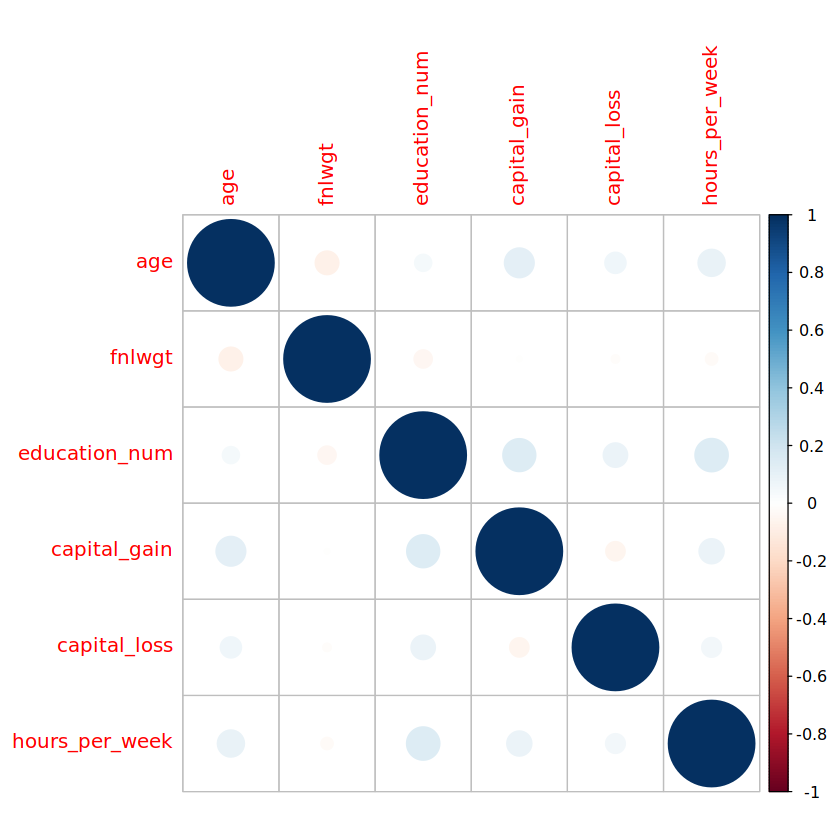

In [60]:
corrplot(cor(df_gm_n))

There is generally no correlation across the numerical values which is quite surprising to observe. Hours per week and Education Numbers should have had negative correlation as per general belief that more educated workers have lower hours per week with more income. Similarly Age and education num, capital gain, hours_per week, and capital loss should have some correlation between them but there does not exist any such correlation.

Plot for age

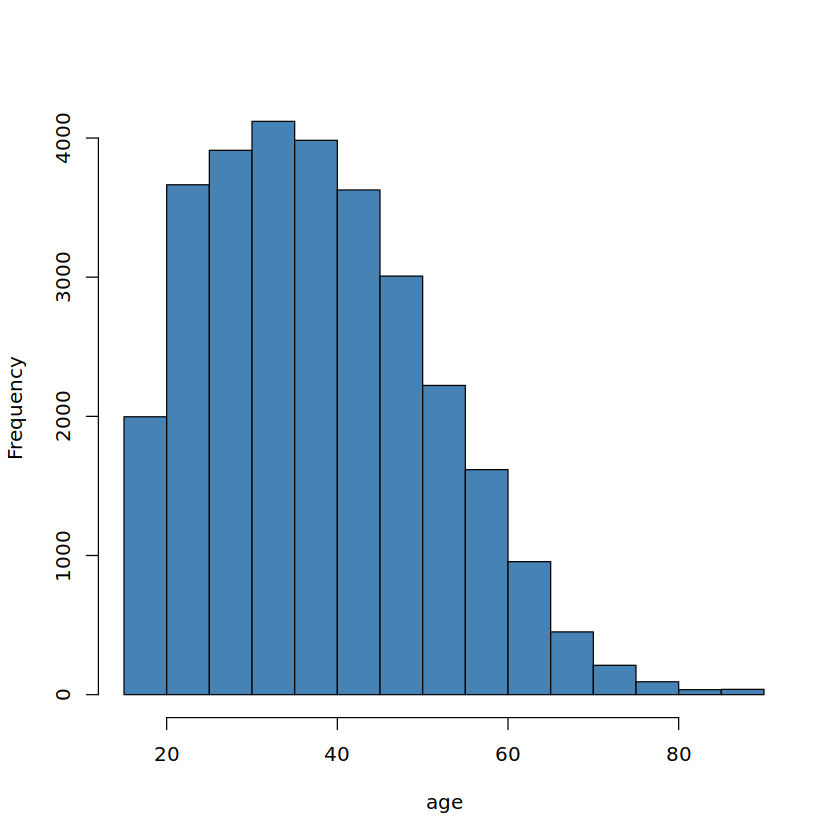

Plot for fnlwgt

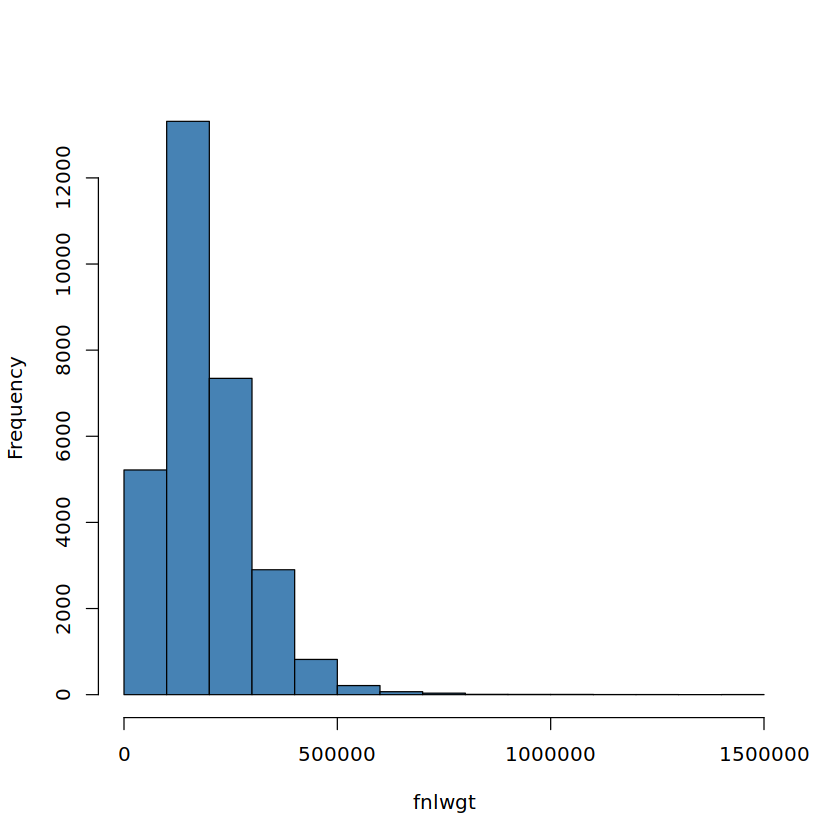

Plot for education_num

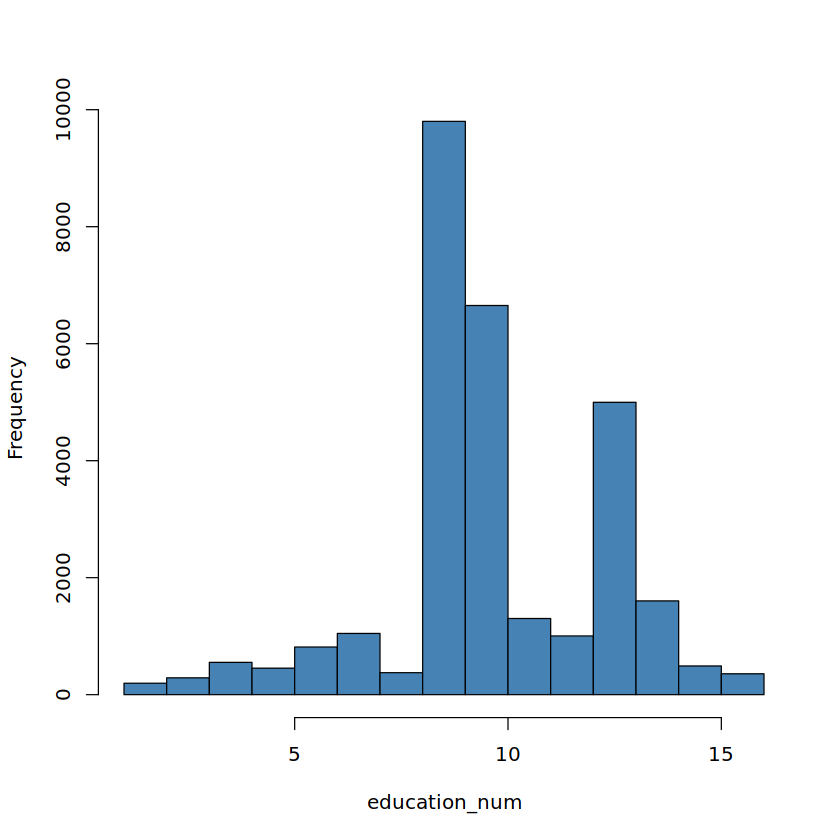

Plot for capital_gain

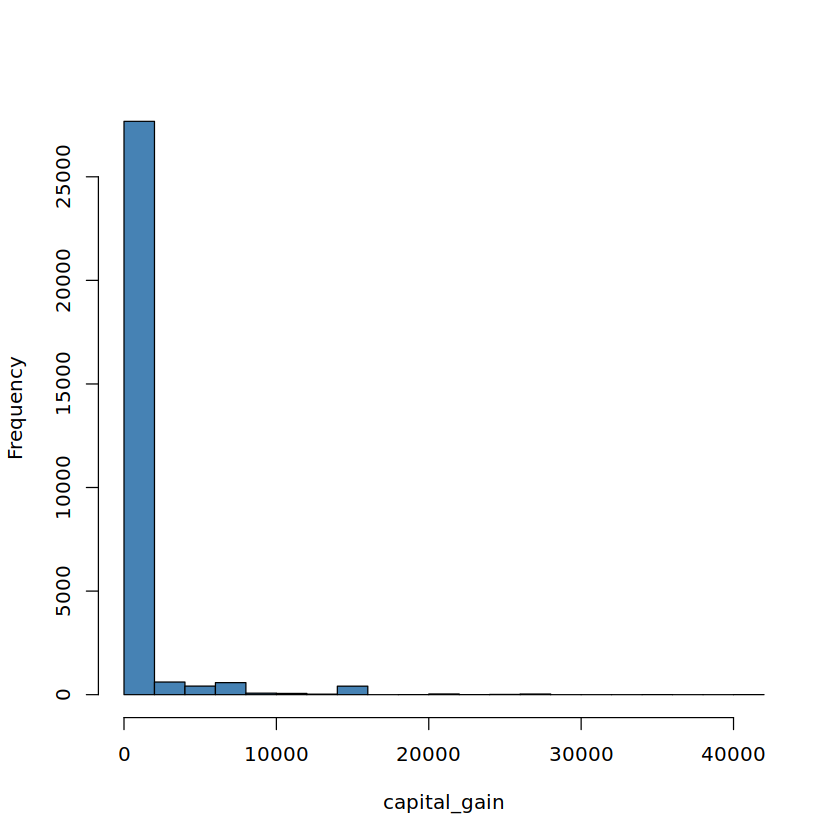

Plot for capital_loss

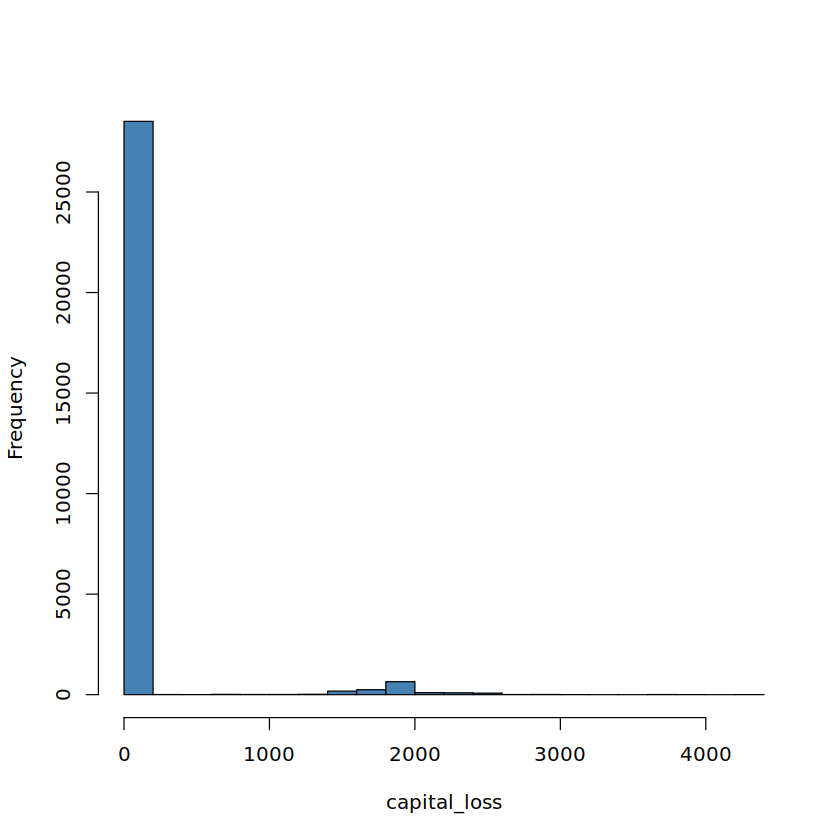

Plot for hours_per_week

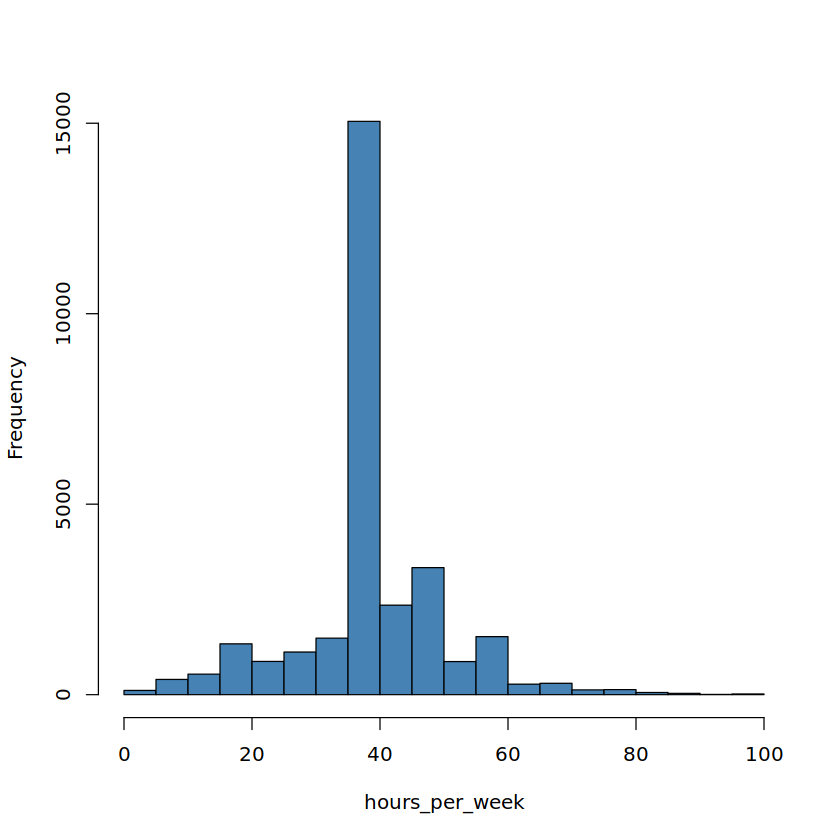

In [62]:
for (i in 1:dim(df_gm_n)[2]){
    hist(df_gm_n[,i], main = cat('Plot for', colnames(df_gm_n)[i]), col = 'steelblue', xlab = colnames(df_gm_n)[i])
}

From the above plots we can observe following observations:
1. Hours Per week, education_num, and age appears to be normally distributed with age having a cut off at 17 in this dataset.
2. Capital gain and capital loss are highly rightskewed and appears to be zero inflated distribution as 0s have highest count.
3. Fnlwgt is right skewed with locational parameters cenetered near 0 but it also have extreme outliers too.

In [63]:
melted_numeric <- melt(df_gm_n)

No id variables; using all as measure variables



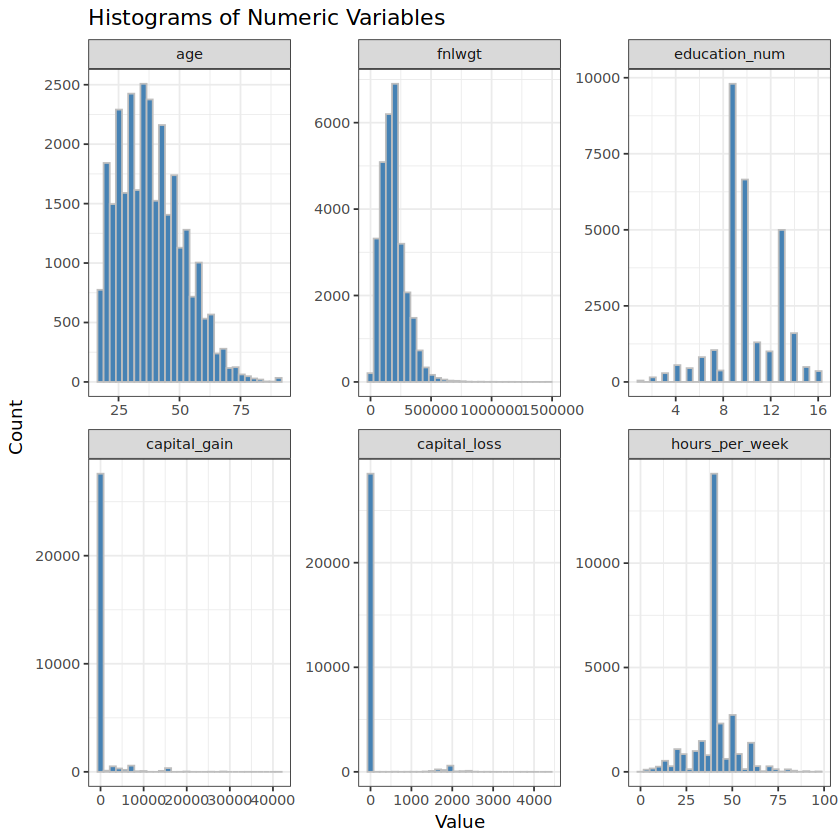

In [64]:
ggplot(melted_numeric, aes(x = value)) +
  geom_histogram(fill = "steelblue", bins = 30, color = "gray") +
  facet_wrap(~ variable, scales = "free") +
  theme_bw() +
  labs(title = "Histograms of Numeric Variables",
       x = "Value", y = "Count")


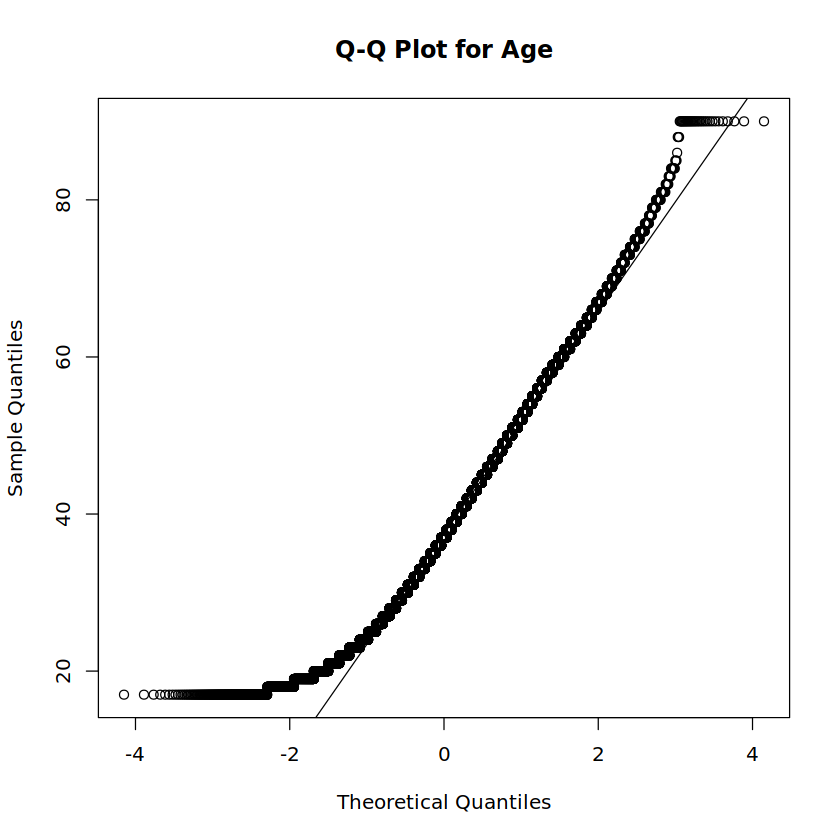

In [65]:
qqnorm(df_gm_n$age, main = "Q-Q Plot for Age")
qqline(df_gm_n$age)

In [73]:
shapiro.test(df_gm_n$age[1:5000])


	Shapiro-Wilk normality test

data:  df_gm_n$age[1:5000]
W = 0.96897, p-value < 2.2e-16


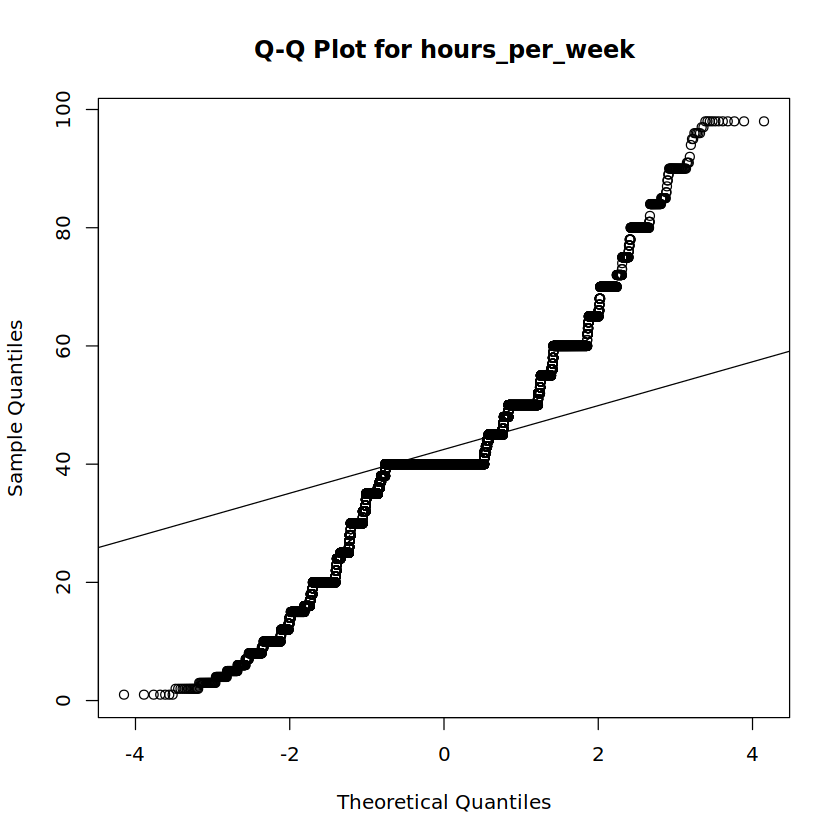

In [66]:
qqnorm(df_gm_n$hours_per_week, main = "Q-Q Plot for hours_per_week")
qqline(df_gm_n$hours_per_week)

In [72]:
shapiro.test(df_gm_n$hours_per_week[1:5000])


	Shapiro-Wilk normality test

data:  df_gm_n$hours_per_week[1:5000]
W = 0.88825, p-value < 2.2e-16


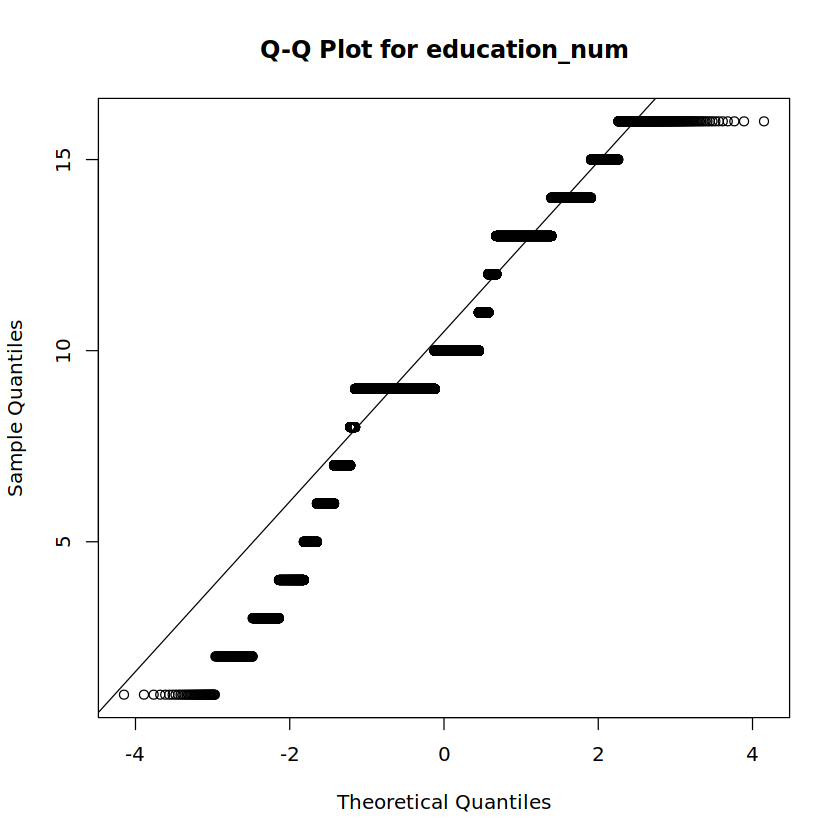

In [67]:
qqnorm(df_gm_n$education_num, main = "Q-Q Plot for education_num")
qqline(df_gm_n$education_num)

In [71]:
shapiro.test(df_gm_n$education_num[1:5000])


	Shapiro-Wilk normality test

data:  df_gm_n$education_num[1:5000]
W = 0.92432, p-value < 2.2e-16


After checking the qq plots for the three observations we observed as normal initially we can see that only educaation_num has a proper qqplot. Age has issues with normality at lower end because of the cut off and hours per week is not a good fit for normality at all. We also got low p value for all of them so its very likely that none of them are normally distributed overall. 

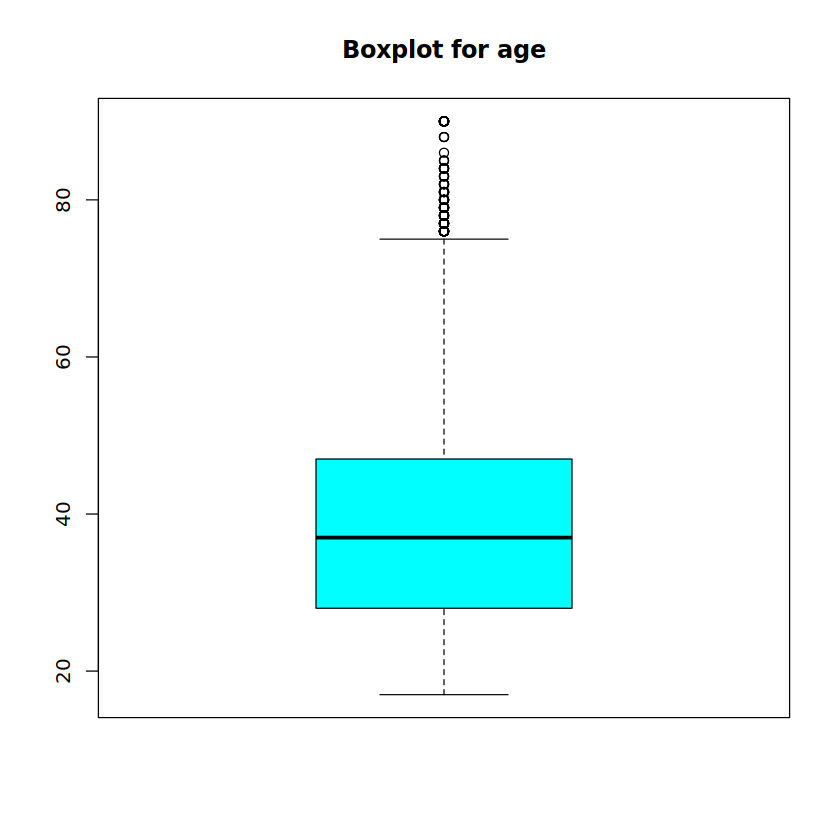

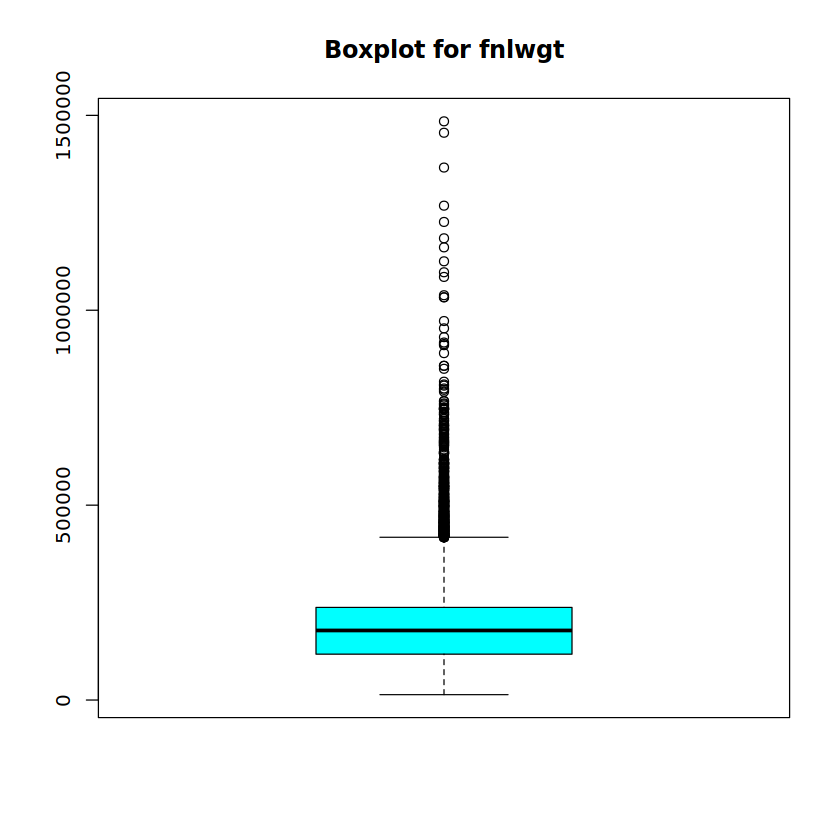

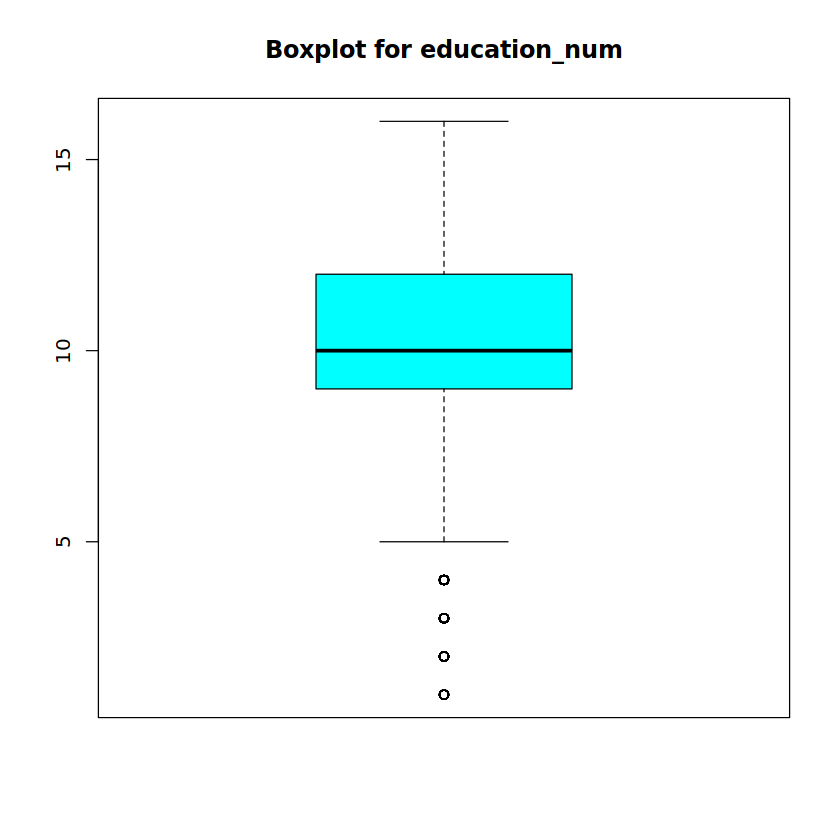

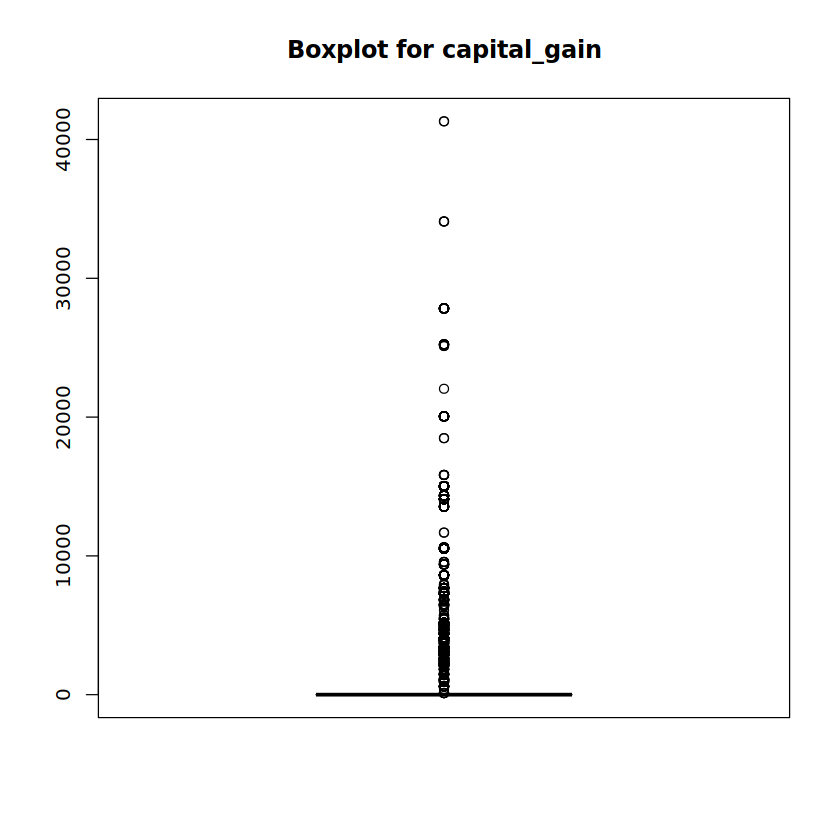

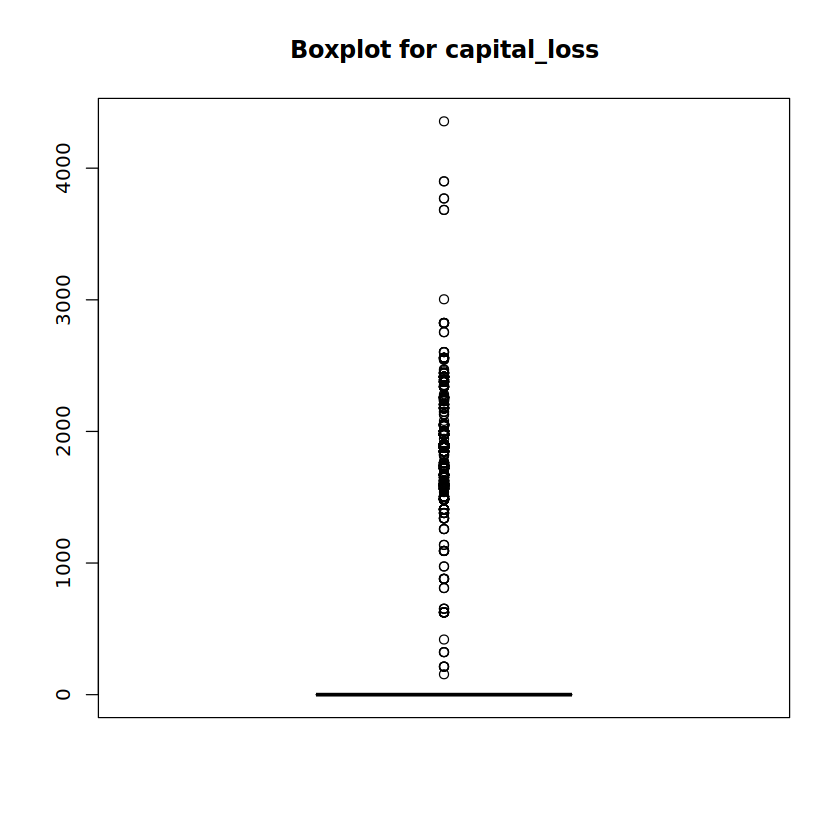

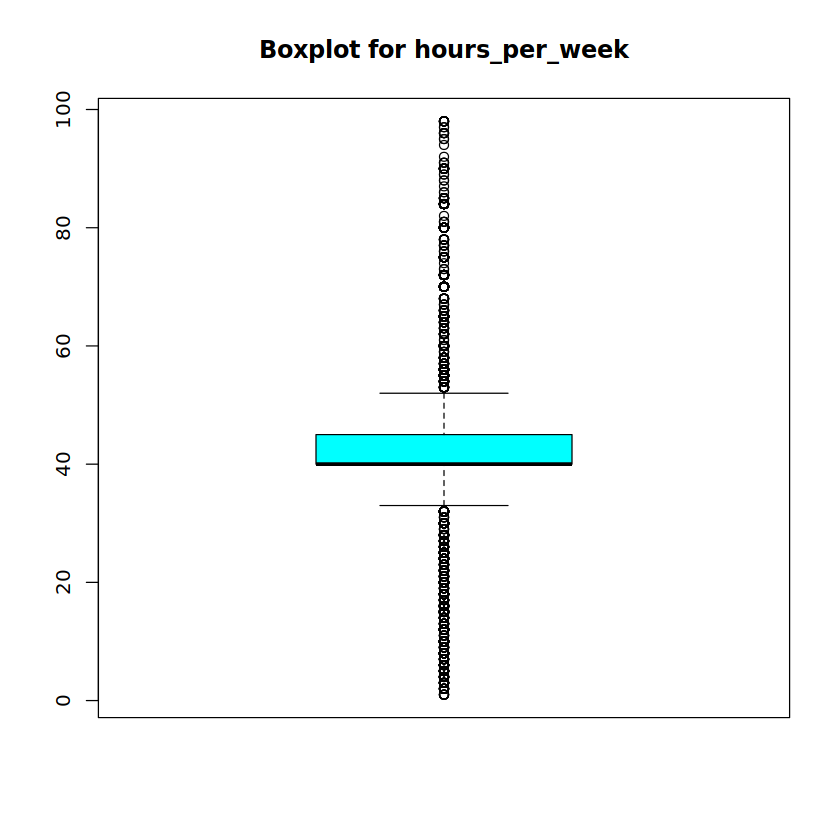

In [326]:
for (i in colnames(df_gm_n)){
    boxplot(df_gm_n[,i], col = 'cyan', main = paste('Boxplot for',i))
}

We have a lot of outliers in the dataset which impact the project overall. We can't remove them but we will scale them for model fitting for an efficient fit overall.

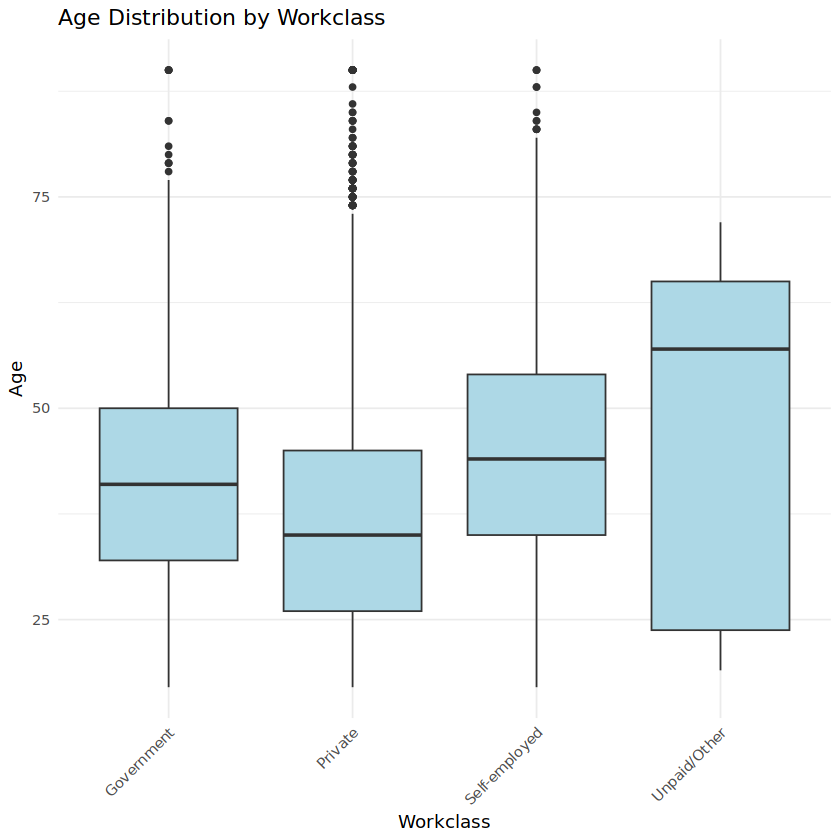

In [431]:
ggplot(df_gm, aes(x = workclass, y = age)) +
  geom_boxplot(fill = "lightblue") +
  labs(title = "Age Distribution by Workclass",
       x = "Workclass",
       y = "Age") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

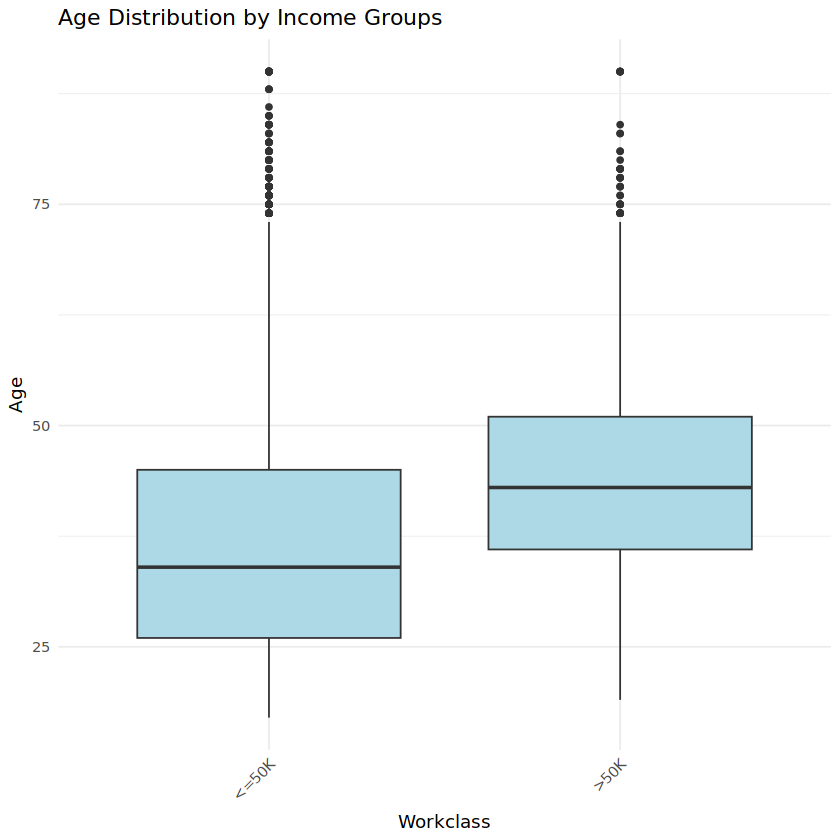

In [433]:
ggplot(df_gm, aes(x = income_group, y = age)) +
  geom_boxplot(fill = "lightblue") +
  labs(title = "Age Distribution by Income Groups",
       x = "Workclass",
       y = "Age") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

Distribution of income groups across the wages seems to be different with high income group having smaller range and less outliers too.

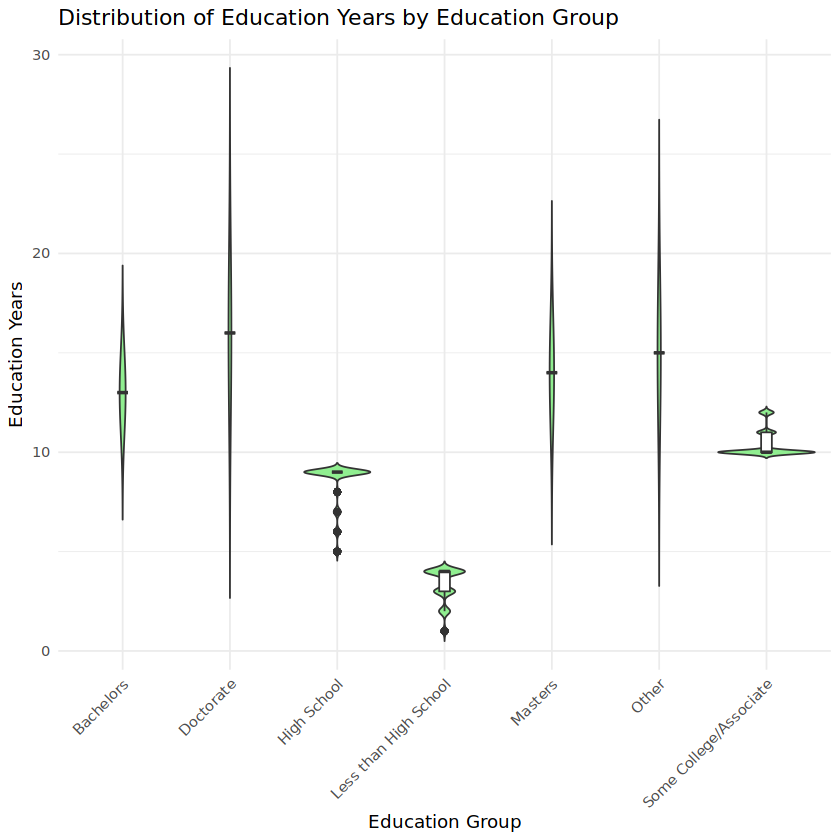

In [434]:
ggplot(df_gm, aes(x = education, y = education_num)) +
  geom_violin(fill = "lightgreen", trim = FALSE) +  # shows the density
  geom_boxplot(width = 0.1, fill = "white") +       # overlays a boxplot
  labs(title = "Distribution of Education Years by Education Group",
       x = "Education Group",
       y = "Education Years") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


Education groups and years seems to be proprly distributed with less than high school having much smaller distribution range compared to doctrate which has highest spread reaching to near 30 years of education as its maximum.

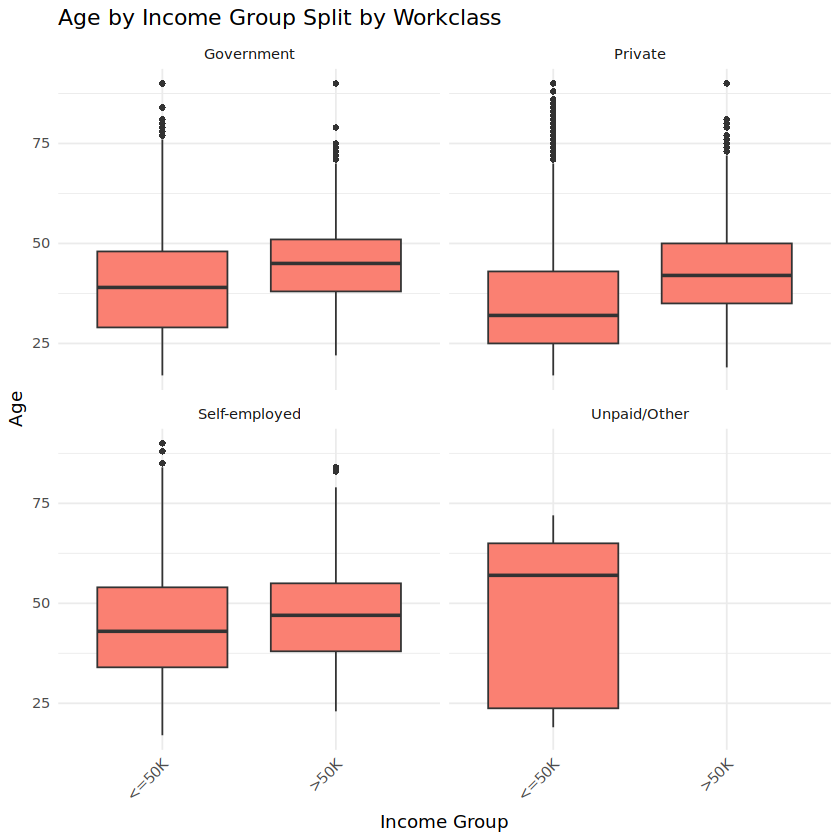

In [454]:
ggplot(df_gm, aes(x = income_group, y = age)) +
  geom_boxplot(fill = "salmon", outlier.shape = 16) +
  facet_wrap(~ workclass) +
  labs(title = "Age by Income Group Split by Workclass",
       x = "Income Group",
       y = "Age") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


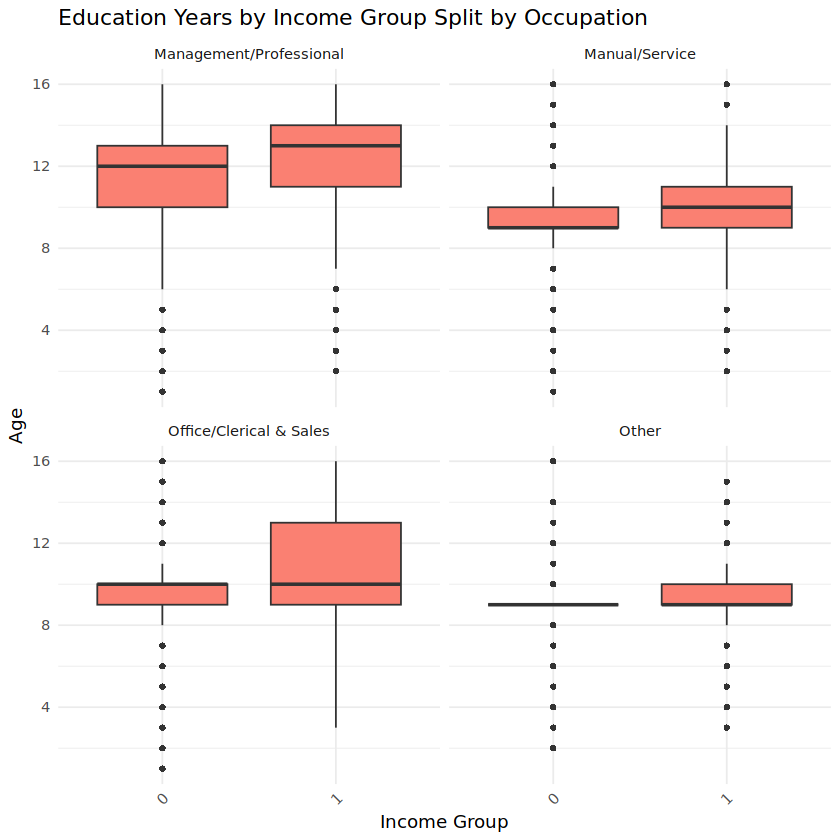

In [559]:
ggplot(df_gm, aes(x = income_group, y = education_num)) +
  geom_boxplot(fill = "salmon", outlier.shape = 16) +
  facet_wrap(~ occupation) +
  labs(title = "Education Years by Income Group Split by Occupation",
       x = "Income Group",
       y = "Age") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


Education Years across different occupations and income groups seems to be captured properly here with distribution of age for management/professional having wider or larger distributions compared to other groups. 

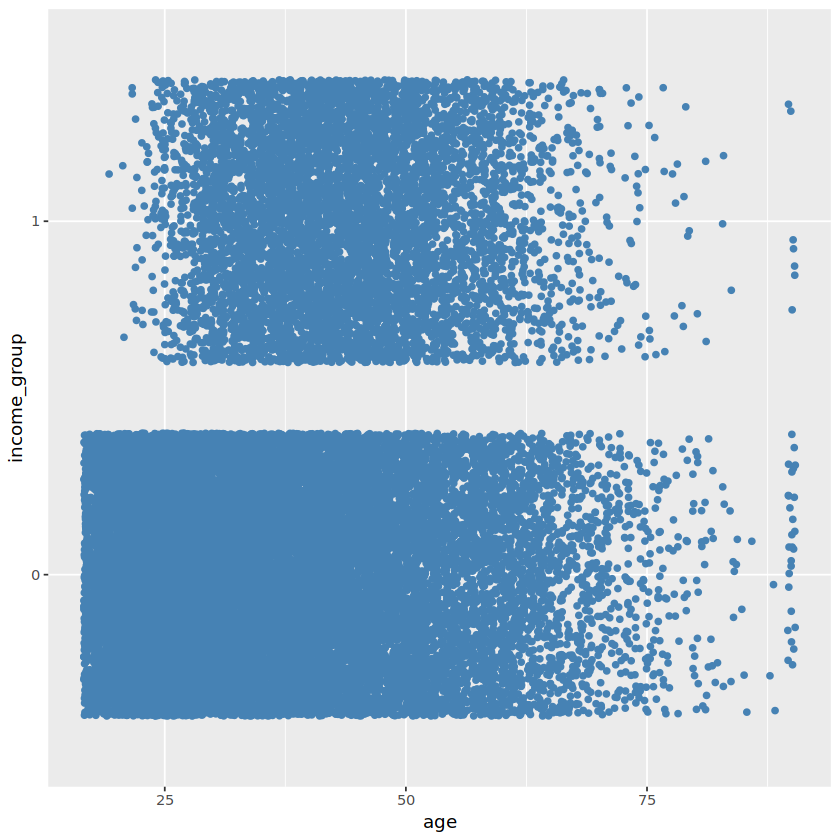

In [558]:
ggplot(data = df_gm, aes(y = income_group, x = age)) +
geom_jitter(col = 'steelblue')

### Hypothesis Tests

For hypothesis tests for the the planned hypothesis we will first do it based on the sample dataset and then use the weights presented in fnlwgt which represents the weight of each observation in true census data collected during the period. By using the survey with such weights we could analyze these hypothesis for the population estimates properly and observe if there indeed exist some difference between using these weights or not.

We will cover three planned hypothesis here with following null hypothesis:
1. Average Education Numbers for US Workforce in 1994 = 11.5
2. Proportion of Women in High income group is same as proportion of women in workforce as per 1990 data. That is proportion is 44.1%.
3. Proportion of workforce in high income group is 15%

In [80]:
# Create a survey design object using the sampling weight "fnlwgt"
des <- svydesign(ids = ~1, data = df_gm, weights = ~fnlwgt)

In [79]:
#First Hypothesis sample t test

print(t.test(df_gm$education_num, mu = 11.5))


	One Sample t-test

data:  df_gm$education_num
t = -95.003, df = 29935, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 11.5
95 percent confidence interval:
 10.07655 10.13410
sample estimates:
mean of x 
 10.10532 



In [412]:
# Compute weighted mean for education_num
res_mean <- svymean(~ education_num, des)
print(res_mean)

# Extract estimate and its standard error
est1 <- coef(res_mean)[1]
se1  <- SE(res_mean)[1]

# Degrees of freedom (approximate effective degrees of freedom for the design)
df1 <- degf(des)

# Compute the t-statistic and p-value
t_stat1 <- (est1 - 11.5) / se1
p_value1 <- 2 * pt(-abs(t_stat1), df = df1)

cat("Hypothesis 1 (Mean Education Years):\n")
cat("  Weighted mean =", round(est1, 3), "\n")
cat("  Standard Error =", round(se1, 3), "\n")
cat("  t-statistic =", round(t_stat1, 3), "\n")
cat("  p-value =", round(p_value1, 4), "\n\n")
cat('Confidence Interval:', est1 - 1.96*se1, est1 + 1.96*se1)

                mean     SE
education_num 10.041 0.0173
Hypothesis 1 (Mean Education Years):
  Weighted mean = 10.041 
  Standard Error = 0.017 
  t-statistic = -84.136 
  p-value = 0 

Confidence Interval: 10.00687 10.07486

Mean estimate is similar for both cases and in both cases, with and without weights, we got a p value less than 0.05, allowing us to reject the Null Hypothesis that average number of Education year is 11.5. And observing the condidence interval we can say that average number of Education year in US for year 1996 is around 10 years.

In [408]:
table(df_gm[df_gm$income_group == ' >50K',]$sex)
prop_h2 <- dim(df_gm[(df_gm['income_group'] == ' >50K' & df_gm['sex'] == ' Female'),])[1]/dim(df_gm)[1]

print(paste('Proportion of women having income greater thaan 50K:', prop_h2))


 Female    Male 
   1091    6244 

[1] "Proportion of women having income greater thaan 50K: 0.0364444147514698"


In [81]:
#Second Hypothesis Test

n_female <- dim(df_gm[(df_gm['income_group'] == ' >50K' & df_gm['sex'] == ' Female'),])[1]

# Perform a binomial test for the null proportion
prop_test_result <- prop.test(n_female, dim(df_gm)[1], p = 0.441)
print(prop_test_result)


	1-sample proportions test with continuity correction

data:  n_female out of dim(df_gm)[1], null probability 0.441
X-squared = 19873, df = 1, p-value < 2.2e-16
alternative hypothesis: true p is not equal to 0.441
95 percent confidence interval:
 0.03436418 0.03864454
sample estimates:
         p 
0.03644441 



In [82]:
# Subset the design to individuals with >50K income
des_hi <- subset(des, income_group == " >50K")

# Compute the weighted proportion of females in the >50K group
res_prop_female <- svymean(~I(sex == " Female"), des_hi)
print(res_prop_female)

# Extract estimate and standard error (the indicator returns 1 if female, 0 otherwise)
est2 <- coef(res_prop_female)[2]
se2  <- SE(res_prop_female)[1]

# Degrees of freedom for the high-income subset
df2 <- degf(des_hi)

# t-statistic and p-value to test H0: p = 0.441
t_stat2 <- (est2 - 0.441) / se2
p_value2 <- 2*pt(abs(t_stat2), df = df2, lower.tail = FALSE)

cat("Hypothesis 2 (Proportion of Women in >50K Income Group):\n")
cat("  Weighted proportion =", round(est2, 3), "\n")
cat("  Standard Error =", round(se2, 3), "\n")
cat("  t-statistic =", round(t_stat2, 3), "\n")
cat("  p-value =", round(p_value2, 4), "\n\n")
cat('Confidence Interval:', est2 - 1.96*se2, est2 + 1.96*se2)

                            mean     SE
I(sex == " Female")FALSE 0.85423 0.0047
I(sex == " Female")TRUE  0.14577 0.0047
Hypothesis 2 (Proportion of Women in >50K Income Group):
  Weighted proportion = 0.146 
  Standard Error = 0.005 
  t-statistic = -63.485 
  p-value = 0 

Confidence Interval: 0.1366586 0.1548879

Weight adjusted proportion of Women having Income greater than 50k income is 0.15 or 15% which is quite different from the 3% proportion we obtained from our dataset. This means that weighted adjustment indeed worked well in this hypothesis test, however even in that case we got a pvalue of less than 0.05 due to which we reject the null hypothesis that the proportion of women having yearly income greater than 50k is 0.441 or 44% which itself was the proportion of women in workforce in US in 1990.

This implies that while weighted adjustment increased the proportion quite a lot, as per census data proprotion of women in high income group is way less than the overall proportion of women in workforce in US during that period, this can be one of the evidence for some real income disparity that existed among both genders during that period. 

In [387]:
#Third Hypothesis Test

# Count the total number of observations and those with >50K income
total_obs <- nrow(df_gm)
high_income_obs <- sum(df_gm$income_group == " >50K")

# Perform a binomial test for the overall proportion
overall_prop_test <- binom.test(high_income_obs, total_obs, p = 0.15)
print(overall_prop_test)



	Exact binomial test

data:  high_income_obs and total_obs
number of successes = 7335, number of trials = 29936, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.15
95 percent confidence interval:
 0.2401588 0.2499362
sample estimates:
probability of success 
             0.2450227 



In [414]:
# Compute the weighted proportion for individuals with income >50K (indicator variable)
res_prop_hi <- svymean(~I(income_group == " >50K"), des)
print(res_prop_hi)

# Extract the estimate and standard error
est3 <- coef(res_prop_hi)[2]
se3  <- SE(res_prop_hi)[1]

df3 <- degf(des)

# t-statistic and p-value for H0: p = 0.15
t_stat3 <- (est3 - 0.15) / se3
p_value3 <- 2 * pt(-abs(t_stat3), df = df3)

cat("Hypothesis 3 (Overall Proportion Earning >50K):\n")
cat("  Weighted proportion =", round(est3, 3), "\n")
cat("  Standard Error =", round(se3, 3), "\n")
cat("  t-statistic =", round(t_stat3, 3), "\n")
cat("  p-value =", round(p_value3, 4), "\n")
cat('Confidence Interval:', est3 - 1.96*se3, est3 + 1.96*se3)

                                  mean     SE
I(income_group == " >50K")FALSE 0.7573 0.0028
I(income_group == " >50K")TRUE  0.2427 0.0028
Hypothesis 3 (Overall Proportion Earning >50K):
  Weighted proportion = 0.243 
  Standard Error = 0.003 
  t-statistic = 32.889 
  p-value = 0 
Confidence Interval: 0.2371742 0.2482229

For our third hypothesis test weighted proportions are not changing the test much and both tests are quite similar. In both tests we got a high test statistic/critical value and got p value less than 0.05, allowing us to reject the Null Hypothesis that the Proportion of workforce in high income bracket is 15%. Our null hypothesis was based on the multiple factors and data at 1990, and with this rejection we can observe that this proportion of people in high income bracket in US was around 24% as per Census data in year 1994.

Overall, we rejected all our hypothesis. Did we establish weak hypothesis? We can't say so. Average number of education years for US citizens was around 11.5 for 1990s however as per the census-income dataset we have we can see that for the workforce that number is around 10 years. Proportion of women in workforce was 44% according to multiple studies during that time, we assumed that this proportion will be similar in the high income bracket but from the hypothesis test we failed to see our intended effect, instead we got adjusted proportion of only 15%. 

Similarly proportion of people in workforce having high income is greater than our expected 15%, it is to be reminded to the reader that inflation adjusted amount is around 100k USD and even in 2024-25 this amount is recorded at quite conservative value at around 10%. Still, there should not have been such a big difference of around 10% in such case and this should be analyzed further and corroborated with other studies and data during that period.

Note: Weight adjusted hypothesis helped in one hypothesis only here, it helped in second hypothesis because number of women in high income group is highly unbalanced. From the weights analysis before we saw that while both such subgroups have similar weights distribution, due to data imbalance in across the groups sample alone is not good in analyzing the proportions when we are using much comparisions across multiple groups. Still our sample proportions are quite similar to weighted sample proportions if we don't use proportions spread across multiple levels for different groups.

## Linear Models

In this section we will fit Linear Models, specifically Logistic Regression models to our dataset. We will fit Generalized Linear Models and Generalized Additive models and test them across different metrics.

We will first optimize the dataset further

In [84]:
copy(df_gm)

ERROR: Error in copy(df_gm): could not find function "copy"


In [86]:
df_gm2 <- data.frame(df_gm)

In [88]:
df_gm2$income_group <- ifelse(df_gm2$income_group == ' >50K',1,0)

In [91]:
df_gm2$income_group <- factor(as.character(df_gm2$income_group))
df_gm2$workclass <- factor(df_gm2$workclass)
df_gm2$education  <- factor(df_gm2$education)
df_gm2$marital_status <- factor(df_gm2$marital_status)
df_gm2$relationship  <- factor(df_gm2$relationship)
df_gm2$occupation <- factor(df_gm2$occupation)
df_gm2$race <- factor(df_gm2$race)
df_gm2$sex <- factor(df_gm2$sex)

In [154]:
df_gm2$age <- scale(df_gm2$age)
df_gm2$education_num <- scale(df_gm2$education_num)
df_gm2$hours_per_week <- scale(df_gm2$hours_per_week)
df_gm2$capital_gain <- scale(df_gm2$capital_gain)
df_gm2$capital_loss <- scale(df_gm2$capital_loss)

In [155]:
str(df_gm2)

'data.frame':	29936 obs. of  14 variables:
 $ age           : num [1:29936, 1] 0.0466 0.8842 -0.0296 1.1126 -0.791 ...
  ..- attr(*, "scaled:center")= num 1.43e-16
  ..- attr(*, "scaled:scale")= num 1
 $ workclass     : Factor w/ 4 levels "Government","Private",..: 1 3 2 2 2 2 2 3 2 2 ...
 $ fnlwgt        : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education     : Factor w/ 7 levels "Bachelors","Doctorate",..: 1 1 3 3 1 5 3 3 5 1 ...
 $ education_num : num [1:29936, 1] 1.14 1.14 -0.435 -1.223 1.14 ...
  ..- attr(*, "scaled:center")= num 10.1
  ..- attr(*, "scaled:scale")= num 2.54
 $ marital_status: Factor w/ 2 levels " Married"," Not Married": 2 1 2 1 1 1 1 1 2 1 ...
 $ occupation    : Factor w/ 4 levels "Management/Professional",..: 3 1 2 2 1 1 2 1 1 1 ...
 $ relationship  : Factor w/ 3 levels "Child","Other/Nonfamily",..: 2 3 2 3 3 3 2 3 2 3 ...
 $ race          : Factor w/ 5 levels " Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ sex        

In [156]:
set.seed(123)
train_index <- sample(1:(nrow(df_gm2)), size = 0.8*nrow(df_gm2))
train_gam <- df_gm2[train_index,]
test_gam <- df_gm2[-train_index,]
print(dim(train_gam))
print(dim(test_gam))

[1] 23948    14
[1] 5988   14


In [157]:
str(train_gam)

'data.frame':	23948 obs. of  14 variables:
 $ age           : num [1:23948, 1] 1.493 0.351 1.341 -0.182 -0.258 ...
 $ workclass     : Factor w/ 4 levels "Government","Private",..: 3 1 2 2 2 1 2 2 2 1 ...
 $ fnlwgt        : int  450544 598995 109015 28572 189922 317733 161708 220860 80933 255835 ...
 $ education     : Factor w/ 7 levels "Bachelors","Doctorate",..: 1 1 7 7 3 1 7 3 3 7 ...
 $ education_num : num [1:23948, 1] 1.1396 1.1396 -0.0415 -0.0415 -0.4352 ...
 $ marital_status: Factor w/ 2 levels " Married"," Not Married": 1 2 1 1 1 1 2 2 1 2 ...
 $ occupation    : Factor w/ 4 levels "Management/Professional",..: 1 1 1 2 2 1 2 4 2 3 ...
 $ relationship  : Factor w/ 3 levels "Child","Other/Nonfamily",..: 3 2 3 3 3 3 1 2 3 2 ...
 $ race          : Factor w/ 5 levels " Amer-Indian-Eskimo",..: 5 3 5 5 5 5 5 5 5 5 ...
 $ sex           : Factor w/ 2 levels " Female"," Male": 2 1 1 2 2 2 1 2 2 1 ...
 $ capital_gain  : num [1:23948, 1] -0.234 -0.234 2.749 -0.234 -0.234 ...
 $ capital_loss 

In [657]:
summary(glm(data = train_gam, formula = income_group ~.,
                              family = binomial))


Call:
glm(formula = income_group ~ ., family = binomial, data = train_gam)

Coefficients:
                                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)                       -3.313e+00  3.500e-01  -9.466  < 2e-16 ***
age                                3.676e-01  2.346e-02  15.670  < 2e-16 ***
workclassPrivate                   1.500e-02  5.606e-02   0.268 0.789054    
workclassSelf-employed            -3.305e-01  7.296e-02  -4.530 5.90e-06 ***
workclassUnpaid/Other             -1.228e+01  1.378e+02  -0.089 0.928973    
fnlwgt                             7.419e-07  1.908e-07   3.888 0.000101 ***
educationDoctorate                 1.056e-01  1.899e-01   0.556 0.578117    
educationHigh School              -5.807e-02  1.385e-01  -0.419 0.674980    
educationLess than High School    -2.456e-01  3.280e-01  -0.749 0.453930    
educationMasters                   5.855e-02  9.017e-02   0.649 0.516101    
educationOther                     4.220e-01  1.618e-01   2.60

Based on the full model logistic regression we can see that while many of t tests for parameters and blocks appear to be valid there are few categories where we fail to reject the null hypothesis that parameters for them are 0, this is especially true for the race and education classes. Moreover, even after reducing the classes across the categories to a great level we have more than 25 t tests here, meaning that we have more than 73% of at least one of the above tests being false.

On top of that as we observed before the numeric variables themselves are not not normally distributed specifically and there does not appear to be direct linear relationship between them and the response variable, for this we will fit a Generalized Additive Models where we will fit cubic splines for each of the numerical variables.

In [658]:
gam_full <- gam(data = train_gam, formula = income_group ~ s(age, bs = "cr") +
                              s(education_num, bs = "cr") +
                              s(hours_per_week, bs = "cr") +
                              s(capital_gain, bs = "cr") +
                              s(capital_loss, bs = "cr") +
                              workclass + education +
                              marital_status + relationship +
                              occupation + sex + race,
                              family = binomial)
summary(gam_full)


Family: binomial 
Link function: logit 

Formula:
income_group ~ s(age, bs = "cr") + s(education_num, bs = "cr") + 
    s(hours_per_week, bs = "cr") + s(capital_gain, bs = "cr") + 
    s(capital_loss, bs = "cr") + workclass + education + marital_status + 
    relationship + occupation + sex + race

Parametric coefficients:
                                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)                       -5.562e+00  1.424e+00  -3.907 9.35e-05 ***
workclassPrivate                   1.268e-02  5.830e-02   0.217 0.827862    
workclassSelf-employed            -2.721e-01  7.686e-02  -3.540 0.000400 ***
workclassUnpaid/Other             -4.382e+01  2.023e+07   0.000 0.999998    
educationDoctorate                 7.383e-01  4.391e-01   1.682 0.092640 .  
educationHigh School              -4.909e-01  2.052e-01  -2.392 0.016757 *  
educationLess than High School    -4.032e-01  3.855e-01  -1.046 0.295492    
educationMasters                   1.809e-01  1.487e-01   

We fitted a full additive model above while ignoring fnlwt for now. From the Effictive Degrees of Freedom we can see that all the numeric variables in the model have edf > 1.5 or so, implying that non parametric relationship with the log odds for income greater than 50K indeed exist for all 5 variables and their p value is low enough for us to reject the null hypothesis that f(variables) are 0 or that these variables has no additional effect on the log odds for income greater than 50K. All this implies that Generalized Additive Model is indeed a better fit for our census income dataset.

We have not included the fnlwt for now, we will test the effect of having weights after hyperparameter tuning and model selection for this additive model. Generally, weights will help us to form population esitmates with better credibility but still the models without it would be enough to explain the linear additive relationship across the variables and response. 

Some categories still have high p values for the t test, we can't remove them specifically because some parts of them are indeed having proper p value for our analysis but they could be appearing due to faulty t tests as there are atleast 73% chances that one of the test will be wrong. To test this we will form reduced model where we will remove education, workclass, and race categories as all of them have classes where we are seeing this issue and compare them via anova function to analyze if the bigger model improve the model explainability or not.

In [660]:
#testing reduced mode, removing race, workclass, and education

reduced_gam <- gam(data = train_gam, formula = income_group ~ s(age, bs = "cr") +
                              s(education_num, bs = "cr") +
                              s(hours_per_week, bs = "cr") +
                              s(capital_gain, bs = "cr") +
                              s(capital_loss, bs = "cr") +
                              marital_status + relationship +
                              occupation + sex,
                              family = binomial)

anova(reduced_gam, gam_full, test = 'Chisq')

Resid. Df Resid. Dev Df       Deviance Pr(>Chi)    
1 23902.71  14930.22         NA       NA           NA
2 23891.68  14875.03   11.03671 55.18721 7.394996e-08

In [661]:
#testing other categories too
reduced_gam <- gam(data = train_gam, formula = income_group ~ s(age, bs = "cr") +
                              s(education_num, bs = "cr") +
                              s(hours_per_week, bs = "cr") +
                              s(capital_gain, bs = "cr") +
                              s(capital_loss, bs = "cr") +
                              race+ workclass +education,
                              family = binomial)

anova(reduced_gam, gam_full, test = 'Chisq')

Resid. Df Resid. Dev Df       Deviance Pr(>Chi)
1 23897.78  17857.72         NA       NA NA      
2 23891.68  14875.03   6.107635 2982.689  0

From above anova test we can observe that Full Model has reduced residual deviance, less residual deviance here implies that full model with adding the categories where not all levels pass the t tests indeed improve the capability of the model. Along with very low p value we can indeed reject the null hypothesis that the full model does not improve the model information while adding the parameters to be estimated.

And with other anova test we can also clearly see that marital_status, relationship, occupation, and sex categories have more explainibilty than the categories with dubious t tests, still by adding all the categories we are indeed getting better model so we will use them, and since every numeric variable is also valid for our test we will use a full model.

Still, our model fitting is not complete as all the cubic spline functions have a smoothing parameter we can tune for better modelling fitting. 

In [662]:
#hyperparameter tuning for the numerical factors

k_candidates <- c(5, 7, 9, 11)
aic_values <- numeric(length(k_candidates))

for(i in seq_along(k_candidates)){
  mod_temp <- gam(income_group ~ 
                  s(age, k = k_candidates[i], bs = "cr") +
                  s(education_num, bs = "cr") +
                  s(hours_per_week, bs = "cr") +
                  s(capital_gain, bs = "cr") +
                  s(capital_loss, bs = "cr") +
                  workclass + education + marital_status + relationship + occupation + sex,
                  data = train_gam,
                  family = binomial)
  aic_values[i] <- AIC(mod_temp)
}

best_k_age <- k_candidates[which.min(aic_values)]
cat("Best k for age smooth:", best_k_age, "\n")


Best k for age smooth: 9 


In [663]:
k_candidates <- c(5, 7, 9, 11)
aic_values <- numeric(length(k_candidates))

for(i in seq_along(k_candidates)){
  mod_temp <- gam(income_group ~ 
                  s(age, bs = "cr") +
                  s(education_num, k = k_candidates[i], bs = "cr") +
                  s(hours_per_week, bs = "cr") +
                  s(capital_gain, bs = "cr") +
                  s(capital_loss, bs = "cr") +
                  workclass + education + marital_status + relationship + occupation + sex,
                  data = train_gam,
                  family = binomial)
  aic_values[i] <- AIC(mod_temp)
}

best_k_edu <- k_candidates[which.min(aic_values)]
cat("Best k for education_num smooth:", best_k_edu, "\n")


Best k for education_num smooth: 9 


In [664]:
k_candidates <- c(5, 7, 9, 11)
aic_values <- numeric(length(k_candidates))

for(i in seq_along(k_candidates)){
  mod_temp <- gam(income_group ~ 
                  s(age, bs = "cr") +
                  s(education_num, bs = "cr") +
                  s(hours_per_week, k = k_candidates[i], bs = "cr") +
                  s(capital_gain, bs = "cr") +
                  s(capital_loss, bs = "cr") +
                  workclass + education + marital_status + relationship + occupation + sex,
                  data = train_gam,
                  family = binomial)
  aic_values[i] <- AIC(mod_temp)
}

best_k_hpw <- k_candidates[which.min(aic_values)]
cat("Best k for hours_per_week smooth:", best_k_hpw, "\n")


Best k for hours_per_week smooth: 7 


In [665]:
k_candidates <- c(5, 7, 9, 11, 13, 15)
aic_values <- numeric(length(k_candidates))

for(i in seq_along(k_candidates)){
  mod_temp <- gam(income_group ~ 
                  s(age, bs = "cr") +
                  s(education_num, bs = "cr") +
                  s(hours_per_week, bs = "cr") +
                  s(capital_gain,  k = k_candidates[i], bs = "cr") +
                  s(capital_loss, bs = "cr") +
                  workclass + education + marital_status + relationship + occupation + sex,
                  data = train_gam,
                  family = binomial)
  aic_values[i] <- AIC(mod_temp)
}

best_k_cg <- k_candidates[which.min(aic_values)]
cat("Best k for capital gain smooth", best_k_cg, "\n")


Best k for capital gain smooth 11 


In [666]:
k_candidates <- c(5, 7, 9, 11, 13, 15)
aic_values <- numeric(length(k_candidates))

for(i in seq_along(k_candidates)){
  mod_temp <- gam(income_group ~ 
                  s(age, bs = "cr") +
                  s(education_num, bs = "cr") +
                  s(hours_per_week, bs = "cr") +
                  s(capital_gain, bs = "cr") +
                  s(capital_loss, k = k_candidates[i], bs = "cr") +
                  workclass + education + marital_status + relationship + occupation + sex,
                  data = train_gam,
                  family = binomial)
  aic_values[i] <- AIC(mod_temp)
}

best_k_cl <- k_candidates[which.min(aic_values)]
cat("Best k for capital loss smooth:", best_k_cl, "\n")


Best k for capital loss smooth: 19 


In [667]:
#using tuned k values for full additive model

gam_full_adj <- gam(data = train_gam, formula = income_group ~ s(age, k = 9, bs = "cr") +
                              s(education_num, k = 9, bs = "cr") +
                              s(hours_per_week, k = 7, bs = "cr") +
                              s(capital_gain, k = 11, bs = "cr") +
                              s(capital_loss, k = 19, bs = "cr") +
                              workclass + education +
                              marital_status + relationship +
                              occupation + sex + race,
                              family = binomial)

In [668]:
anova(gam_full, gam_full_adj, test = 'Chisq')

Resid. Df Resid. Dev Df       Deviance Pr(>Chi)   
1 23891.68  14875.03         NA       NA          NA
2 23884.30  14685.73   7.376726 189.3052 4.01352e-37

We didn't expect the tuning to have this much effect, with same full model with adjusted smoothing bandwidth values we got a deviance difference of 189 with minimal reduction in the degrees of freedom. With p value so low can be clear that new model is a better fit overall. Now we will compare it with the weights adjusted model.

In [669]:
gam_full_adj_w <- gam(data = train_gam, formula = income_group ~ s(age, k = 9, bs = "cr") +
                              s(education_num, k = 9, bs = "cr") +
                              s(hours_per_week, k = 7, bs = "cr") +
                              s(capital_gain, k = 11, bs = "cr") +
                              s(capital_loss, k = 19, bs = "cr") +
                              workclass + education +
                              marital_status + relationship +
                              occupation + sex + race,
                              family = binomial,
                              weights = fnlwgt)

Warning message in newton(lsp = lsp, X = G$X, y = G$y, Eb = G$Eb, UrS = G$UrS, L = G$L, :
“Iteration limit reached without full convergence - check carefully”


In [670]:
aic_weighted <- AIC(gam_full_adj_w)
aic_unweighted <- AIC(gam_full_adj)
cat("AIC for weighted model:", aic_weighted, "\n")
cat("AIC for unweighted model:", aic_unweighted, "\n")

AIC for weighted model: 2708412179 
AIC for unweighted model: 14810.01 


In [671]:
pred_probs_unw <- predict(gam_full_adj, newdata = test_gam, type = "response")
pred_probs_w <- predict(gam_full_adj_w, newdata = test_gam, type = "response")

pred_class_w   <- ifelse(pred_probs_w >= 0.5, 1, 0)
pred_class_unw <- ifelse(pred_probs_unw >= 0.5, 1, 0)

actual <- as.numeric(as.character(test_gam$income_group))

In [672]:
conf_w <- table(Observed = actual, Predicted = pred_class_w)
conf_unw <- table(Observed = actual, Predicted = pred_class_unw)

# Print confusion matrices:
print(conf_w)
print(conf_unw)

        Predicted
Observed    0    1
       0 4311  260
       1  530  887
        Predicted
Observed    0    1
       0 4323  248
       1  560  857


In [673]:
accuracy_w <- sum(diag(conf_w)) / sum(conf_w)
accuracy_unw <- sum(diag(conf_unw)) / sum(conf_unw)

cat("Accuracy for weighted model:", round(accuracy_w, 4), "\n")
cat("Accuracy for unweighted model:", round(accuracy_unw, 4), "\n")

Accuracy for weighted model: 0.8681 
Accuracy for unweighted model: 0.8651 


In [674]:
roc_w <- roc(actual, pred_probs_w)
roc_unw <- roc(actual, pred_probs_unw)
cat("AUC for weighted model:", auc(roc_w), "\n")
cat("AUC for unweighted model:", auc(roc_unw), "\n")

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



AUC for weighted model: 0.9174194 
AUC for unweighted model: 0.9168934 


From the above workings we have following observations:
1. AIC can not be used to compare the models as weighted model impacts the likelihood each observation contributes depending upon the weights. AIC could have been used to compare the models if we had a full on population dataset but its outside the scope for this project.
2. Accuracy and AUC are similar for both models so for prediction purposes both models are quite similar.

Depending on the above observations we conclude that while both models have simialr prediction power with good accuracy overall weighted model could be better fit if we want to use the model for the population level inference while sample confined model is still a good model for explaining the overall relationship across the variables.

In [724]:
#we observed that weighted and non weighted models are quite similar for accurcy and other criterias so we will not use weights further on for
#model fitting as it indeed adds complexity to the model and impact the model plots and further analysis.

gam_fit <- gam(data = train_gam, formula = income_group ~ s(age, k = 9, bs = "cr") +
                              s(education_num, k = 9, bs = "cr") +
                              s(hours_per_week, k = 7, bs = "cr") +
                              s(capital_gain, k = 11, bs = "cr") +
                              s(capital_loss, k = 19, bs = "cr") +
                              workclass + education +
                              marital_status + relationship +
                              occupation + sex + race,
                              family = binomial, method = "ML")

In [725]:
#comparing gam with glm with the help of AIC
glm_final <- glm(data = train_gam, formula = income_group ~., family = binomial)
print(AIC(glm_final))
print(AIC(gam_fit))
#AIC of gam is much lower

[1] 16247
[1] 14859.81


In [730]:
concurvity(gam_fit, full = TRUE)

para s(age)    s(education_num) s(hours_per_week) s(capital_gain)
worst    1    0.4493629 1.0000000        0.2823824         0.06770895     
observed 1    0.4292099 0.8650929        0.2651937         0.04836111     
estimate 1    0.1005919 0.7139160        0.1264677         0.01930184     
         s(capital_loss)
worst    0.043491655    
observed 0.006411567    
estimate 0.013627217

Concurvity test the multicollinearity across the smoothing functions and we can see that education num has high evidence of multicollinearity implying that other smoothing functions are enough to explain the effects of smooth(education_num). Due to this we will remove the smoothing function for this predictor and fit it normally.


Method: ML   Optimizer: outer newton
full convergence after 5 iterations.
Gradient range [-0.0002438782,0.0002070823]
(score 7491.922 & scale 1).
Hessian positive definite, eigenvalue range [0.1354166,4.427607].
Model rank =  71 / 71 

Basis dimension (k) checking results. Low p-value (k-index<1) may
indicate that k is too low, especially if edf is close to k'.

                     k'   edf k-index p-value   
s(age)             8.00  6.56    0.99    0.57   
s(education_num)   8.00  1.51    1.00    0.85   
s(hours_per_week)  6.00  5.14    0.99    0.62   
s(capital_gain)   10.00  7.95    0.95    0.01 **
s(capital_loss)   18.00 16.30    0.99    0.56   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


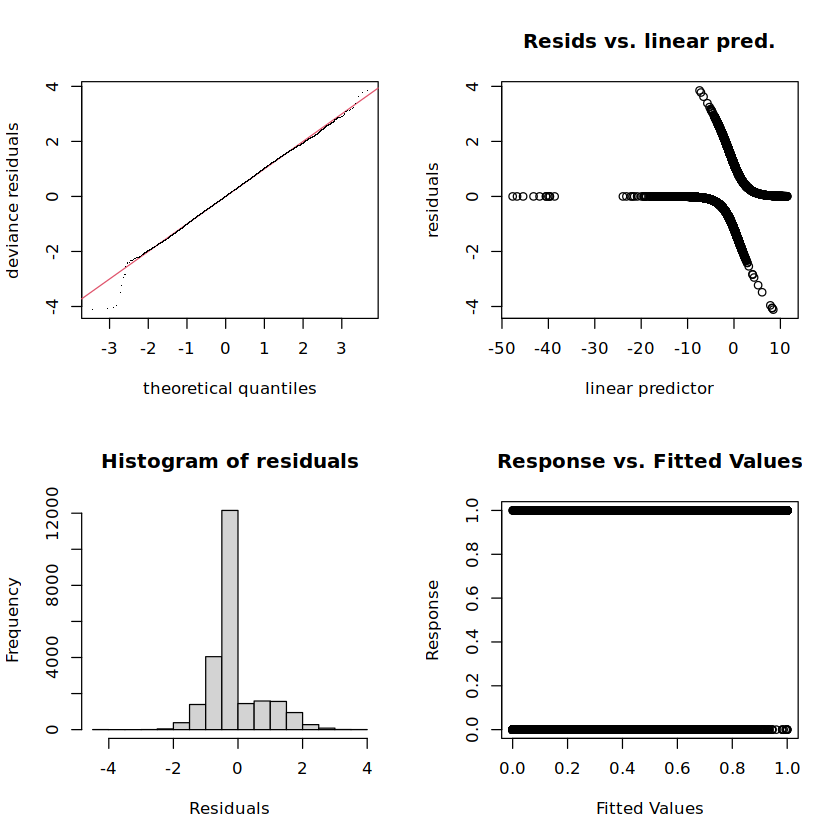

In [729]:
gam.check(gam_fit)

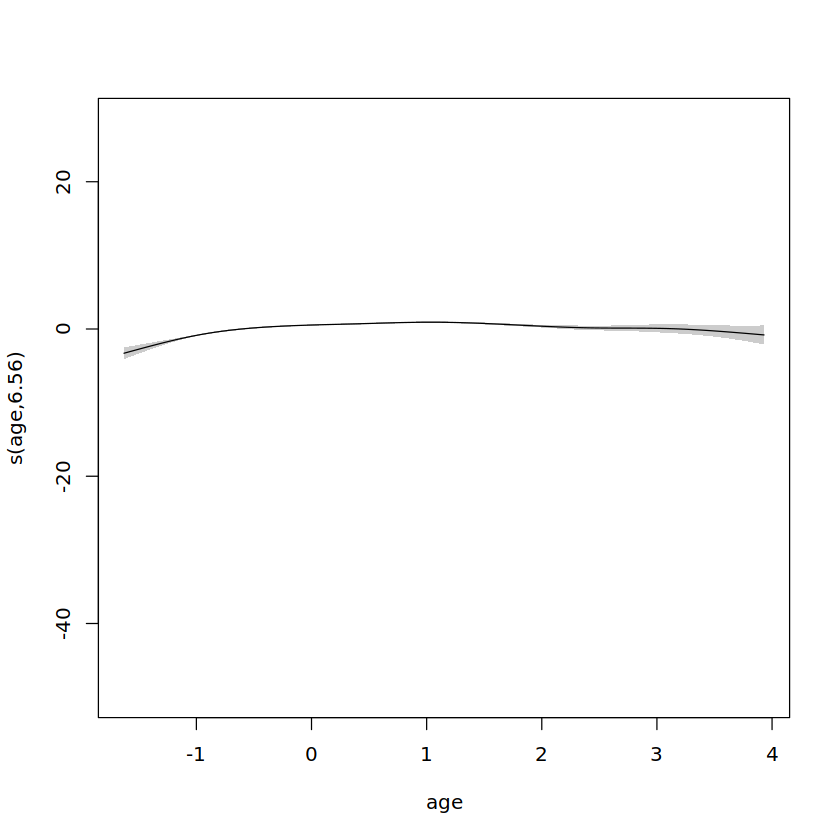

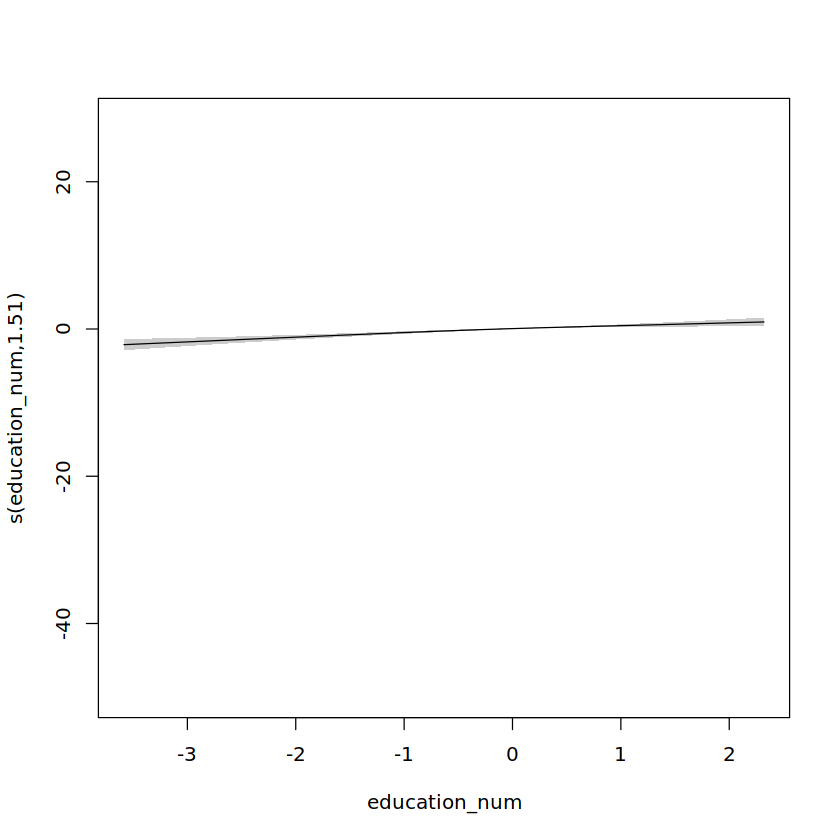

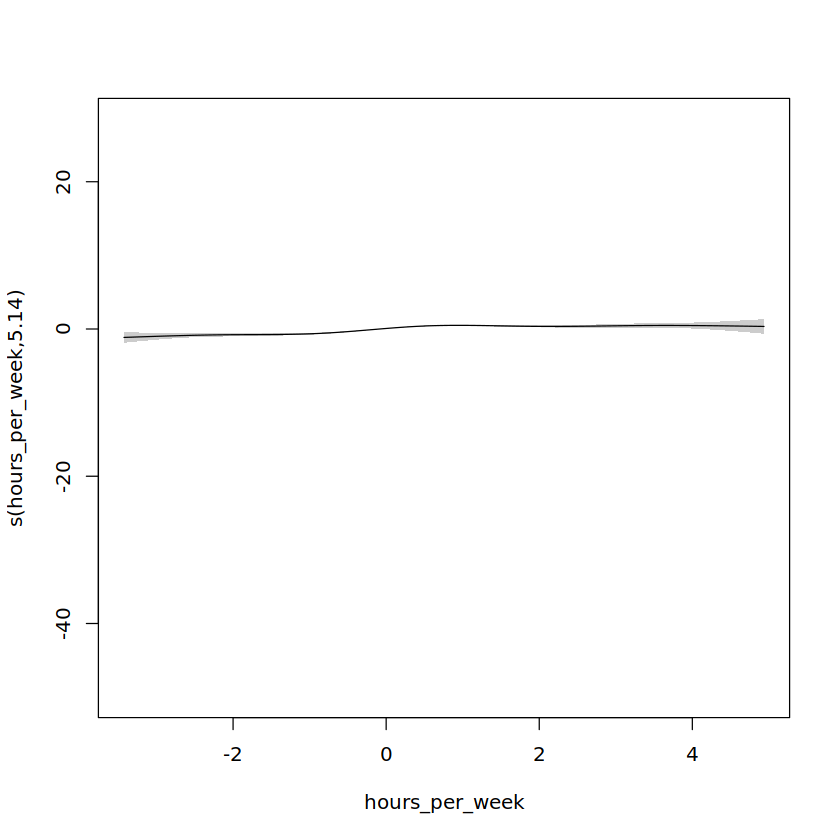

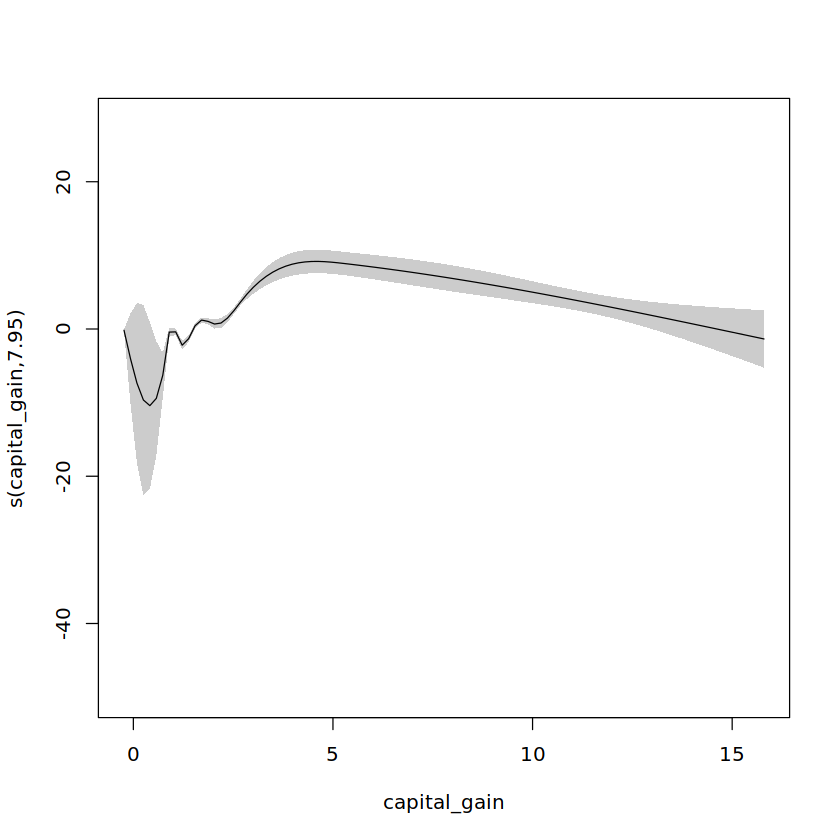

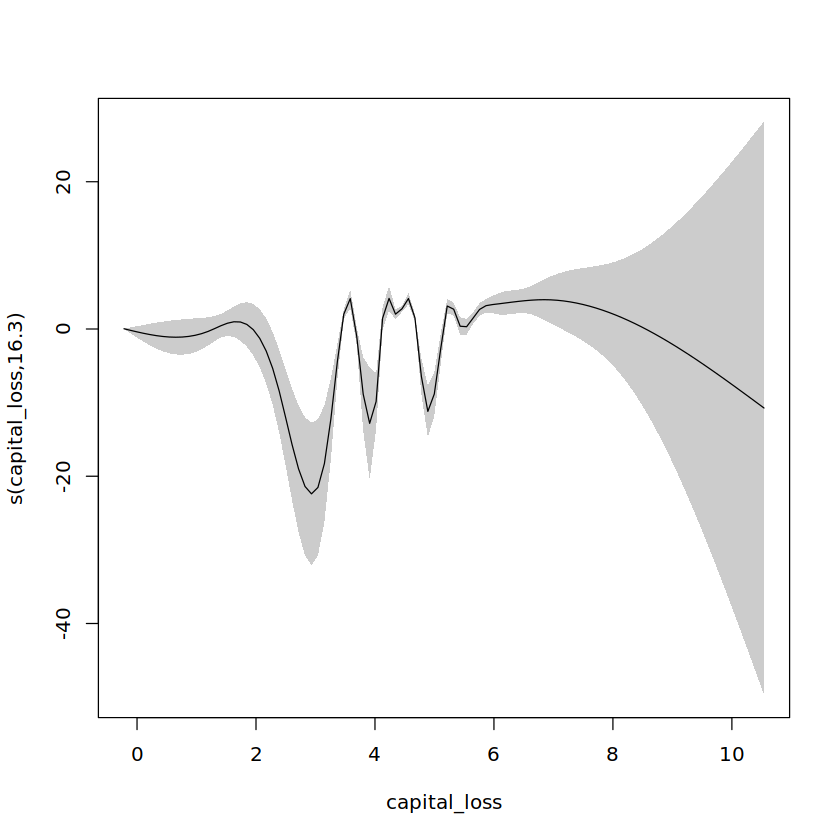

In [740]:
plot.gam(gam_fit, shade = TRUE)

Age, education num, and hours per week appears to be linearlly associated with log odds, however edf of them was way higher than cutoff of 1.5 where at less than or equal to 1.5 we may decide that linear relationship fits better for them. Still education number had lowest edf and since it is having higher multicollinearity too we are fine with removing the smoothing term for this model.

Besides them Capital Gain and Capital Loss indeed have a non linear relationships which is being modeled fine overall.

In [778]:
#we will use non weighted model for the final analysis because weighted model was not wroking well with gam analysis and model comparison overall
#this could have been rectified if we have full dataset with proper variation

gam_final <- gam(data = train_gam, formula = income_group ~ s(age, k = 9, bs = "cr")+
                              s(hours_per_week, k = 7, bs = "cr") +
                              s(capital_gain, k = 15, bs = "cr") +
                              s(capital_loss, k = 15, bs = "cr") +
                              education_num +
                              workclass + education +
                              marital_status + relationship +
                              occupation + sex + race,
                              family = binomial, method = "ML")

In [755]:
concurvity(gam_final, full = TRUE)

para      s(age)     s(hours_per_week) s(capital_gain) s(capital_loss)
worst    0.9943058 0.43200054 0.2794156         0.06820396      0.040909681    
observed 0.9943058 0.41905725 0.2630703         0.03022055      0.006672131    
estimate 0.9943058 0.09652853 0.1252004         0.01729114      0.012634639

Concurvity analysis is fine now.

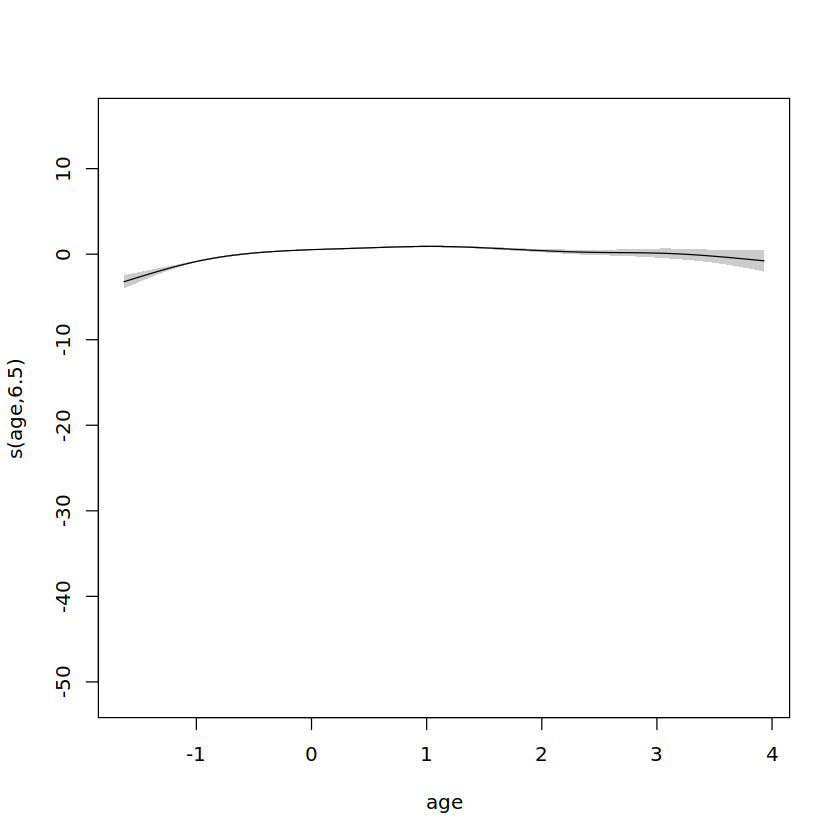

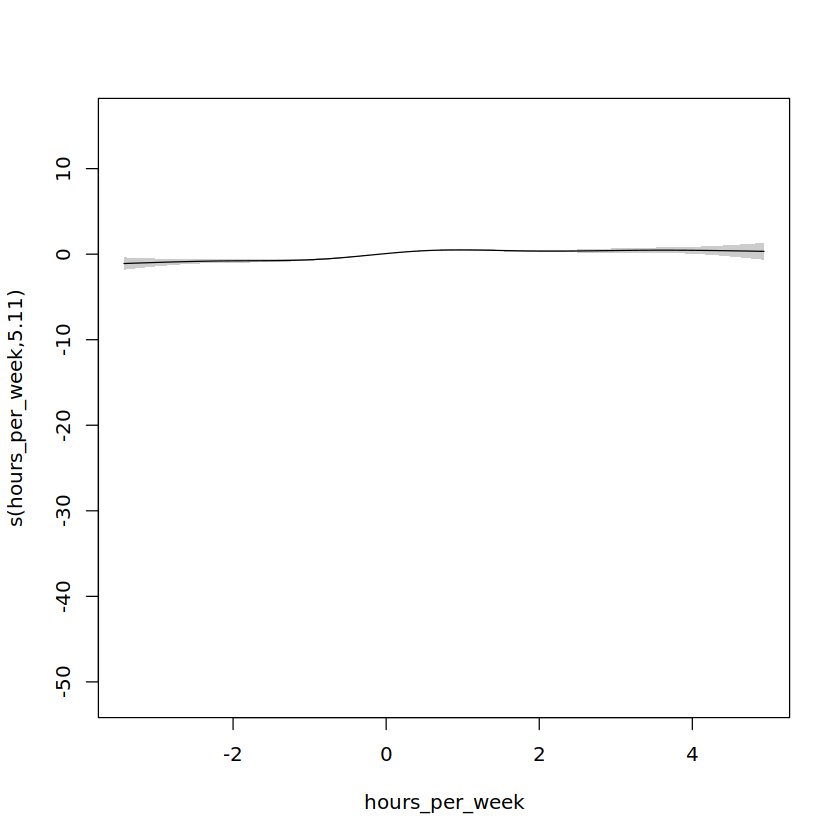

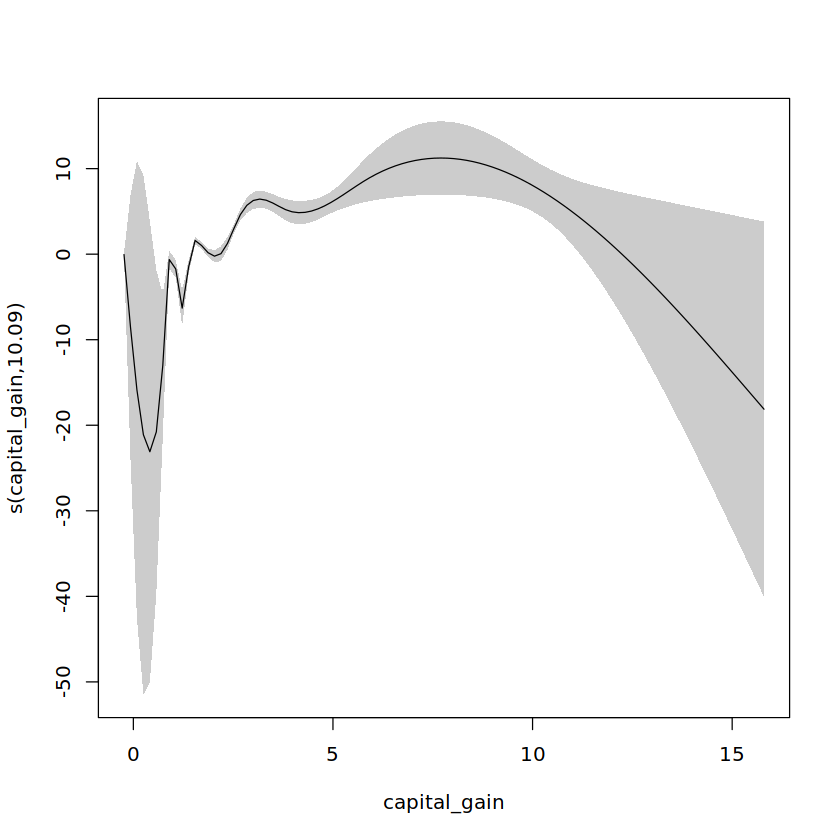

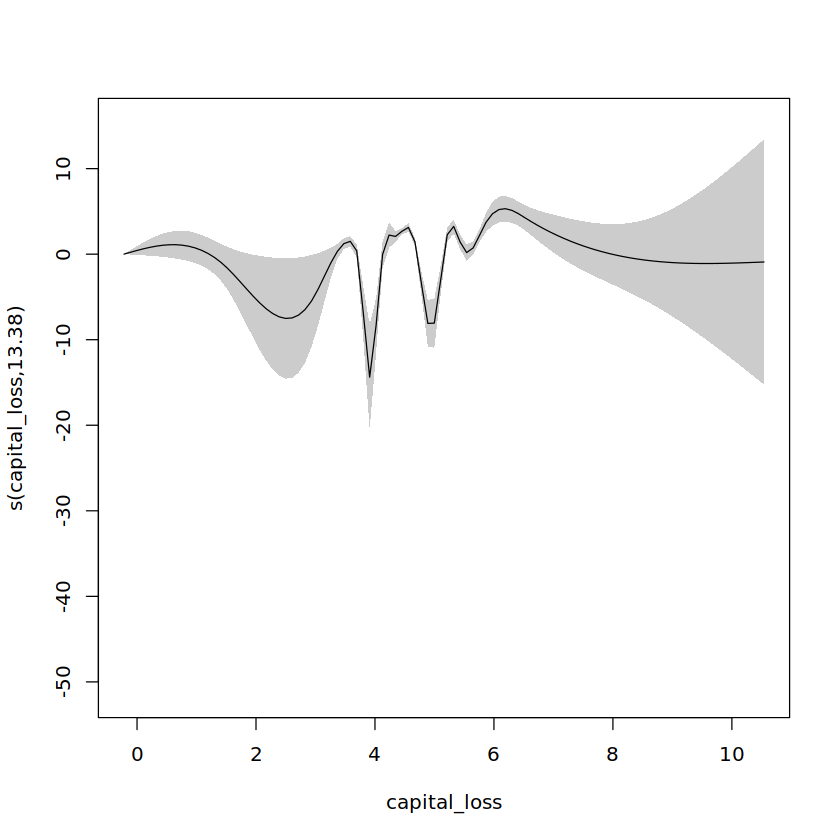

In [760]:
plot.gam(gam_final, shade = TRUE)

We reduced the k value for the capital loss because in previous plot analysis the variation across the confidence bands for higher values was way too high for our liking. This may lead to only slight reduction in explained deviance which we can accept for our model.


Method: ML   Optimizer: outer newton
full convergence after 5 iterations.
Gradient range [-0.0005510738,3.358223e-06]
(score 7466.743 & scale 1).
Hessian positive definite, eigenvalue range [0.7245655,1.949829].
Model rank =  64 / 64 

Basis dimension (k) checking results. Low p-value (k-index<1) may
indicate that k is too low, especially if edf is close to k'.

                     k'   edf k-index p-value  
s(age)             8.00  6.50    1.01   0.920  
s(hours_per_week)  6.00  5.11    1.00   0.735  
s(capital_gain)   14.00 10.09    0.97   0.055 .
s(capital_loss)   14.00 13.38    0.97   0.040 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


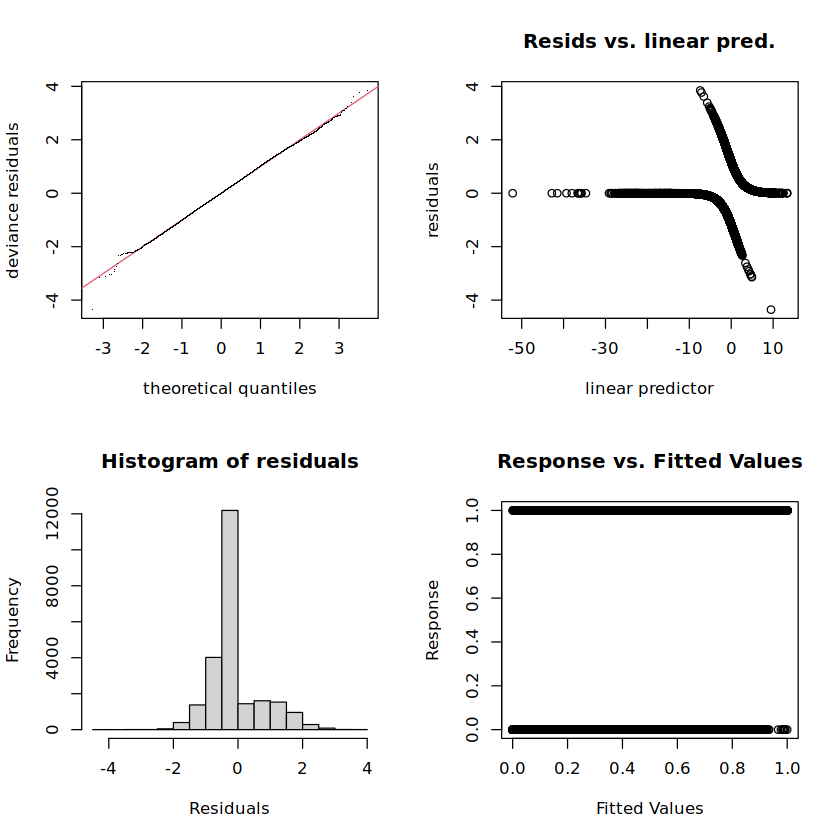

In [777]:
gam.check(gam_final)

Overall plots seems to be fine. P value for smoothing K values seems to be fine with capital loss having potential for having higher k value than chosen 15. Residuals are cenetered around 0 and deviance residual plot is appearing good. And by observing the response vs fitted plot we can see that we have highly confident model overall. 

In [779]:
summary(gam_final)


Family: binomial 
Link function: logit 

Formula:
income_group ~ s(age, k = 9, bs = "cr") + s(hours_per_week, k = 7, 
    bs = "cr") + s(capital_gain, k = 15, bs = "cr") + s(capital_loss, 
    k = 15, bs = "cr") + education_num + workclass + education + 
    marital_status + relationship + occupation + sex + race

Parametric coefficients:
                                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)                       -3.378e+00  3.799e-01  -8.891  < 2e-16 ***
education_num                      5.374e-01  7.766e-02   6.920 4.52e-12 ***
workclassPrivate                   6.423e-03  5.875e-02   0.109 0.912943    
workclassSelf-employed            -2.718e-01  7.711e-02  -3.525 0.000424 ***
workclassUnpaid/Other             -3.474e+01  2.023e+07   0.000 0.999999    
educationDoctorate                 3.223e-01  1.979e-01   1.628 0.103422    
educationHigh School              -1.242e-01  1.440e-01  -0.863 0.388352    
educationLess than High School    -3.394e-

We fit the model with all the predictors with age, hpw, capital gain, and capital loss allowed to model non linear relationship with log odds, for which we chose cubic splines and optimized the bandwidth K during hyperparameter tuning. All the categories have some levels with p value less than 0.05, workclass other have small number of observations because of which model is not able to model it properly.

Education, marital status, occupation, and sex are strong predictors of high income in our model and non linear smoothing functions are highly significant, they are not just simply straight lines and explain the relationship to some level. We will consider only those predictors/group levels having proper t tests for some coefficient observations:
1. Race white has largest positive coefficient at 0.8 followed by non family relationship at 0.6. Adding up the sex male positive coefficeints, we can say considering everything else constant un married white men have higher chances to fall in high income group. 
2. For negative coefficients we have Manual/service occupation at -0.8 which is somewhat unexpected but understandable. Following that we have other occupation and clerical/sales. Negative coefficients for these sub groups show that while keeping every other thing constant falling under groups with negative coefficients can reduce the chances a person has high income.
3. Base intercept is -3.3 and its for female sex having Amer-Indian-Eskimo race having Bachelors education working in a Managerial/Professional position while being married and having child relationship. Probability of such an individual having high income in 1994 is 0.033, which is quite low.
4. Numerical variables besides education numbers have non linear relationships, we can fit them with a linear relationship too for better explainability but that will impact the model performance. Regardless of that 1 sd increase for education_num has positive benefit for the log odds or overall probability, for example if we add 1 sd education_num we are getting probability as 0.055 which is quite an improvement.

In [802]:
#AIC Comparison GAM vs GLM Model

print(AIC(gam_final))
print(AIC(glm_final))

[1] 14801.19
[1] 16247


AIC is lower for Generalized Additive Model final fit compared to final GLM and its also lower than the previous best fit for Additive models.

In [800]:
# Predict probabilities for the test set
pred_probs <- predict(gam_final, newdata = test_gam, type = "response")
pred_class <- ifelse(pred_probs >= 0.5, 1, 0)

pred_probs2 <- predict(glm_final, newdata = test_gam, type = "response")
pred_class2 <- ifelse(pred_probs2 >= 0.5, 1, 0)

actual <- as.numeric(as.character(test_gam$income_group))
accuracy_gam <- mean(pred_class == actual)
cat("Accuracy of the final GAM model:", round(accuracy, 4), "\n")
accuracy_glm <- mean(pred_class2 == actual)
cat("Accuracy of the final GLM model:", round(accuracy, 4), "\n")

Accuracy of the final GAM model: 0.8656 
Accuracy of the final GLM model: 0.8656 


In [803]:
table(Predicted = pred_class, Actual = actual)

         Actual
Predicted    0    1
        0 4333  567
        1  238  850

In [809]:
f1_gam <- F1_Score(y_pred = pred_class, y_true = actual, positive = "1")

f1_glm <- F1_Score(y_pred = pred_class2, y_true = actual, positive = "1")

cat("F1 Score GAM:", round(f1_gam, 4), "\n")
cat("F1 Score GLM:", round(f1_glm, 4), "\n")


F1 Score GAM: 0.6786 
F1 Score GLM: 0.6498 


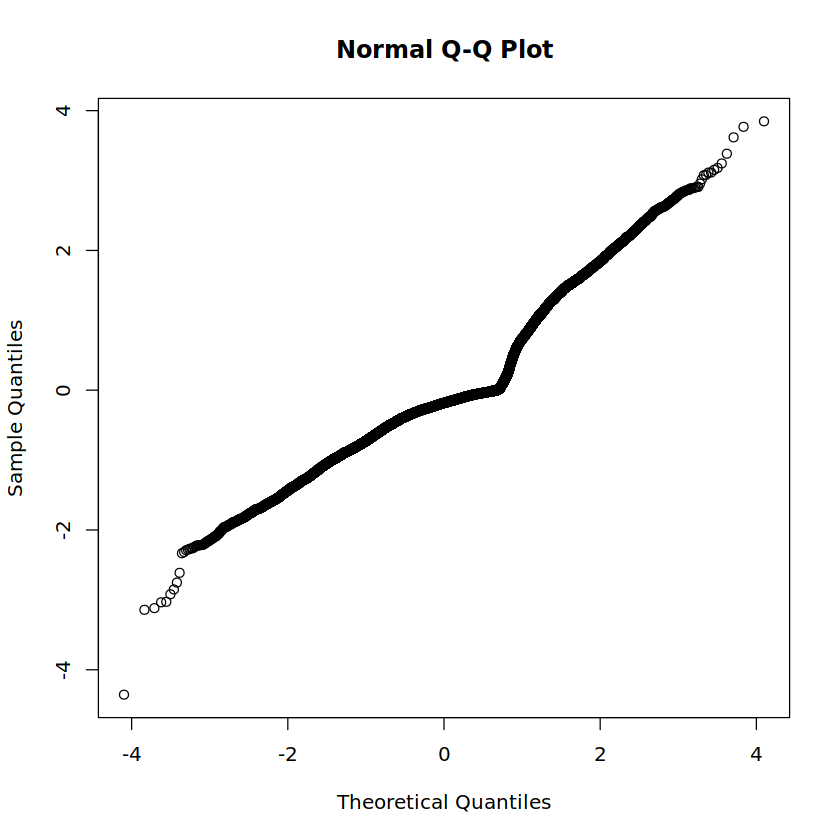

In [875]:
qqnorm(resid(gam_final))

Generalized Additive model we picked as our final linear model has a good amount of variance explainability, the fact corroborated by mupltiple anova tests and AIC comparisons across this section. Besides the inferential potential this model has, we also got better predictive model as even if Accuracy is similar at 0.87 F1 Score for GAM model is indeed higher.

It is difficult to get a better linear model than this with this dataset as most of the predictors are categorial variables with problems in few numerical variables we have as most of them have non linear relationship with log odds of the ratio of a person earining more than 50K compared to not earning such income per annum. But if we have more predictors we can indeed improve the model, we can also perform Machine Learning methods suited for classification only if we are focused on only predictions, but considering all that we got a good additive model which can explain the relationship between predictors and response while having good enough predictive power.

## Bayesian Model

Most of the predictors are categorical the number of unknown group variability must be quite less overall, implying that because of so many factor levels likelihood of having more latent groups seems unlikely due to which we can not use mixture models, so we will use bayesian hierarchical models for this dataset.

We used rjags models first as it has better visual representation of the hierarchical model however even 1 single iteration for MCMC gibbs sampling was taking us 30 minutes or so even with competent CPU/RAM combination making it near impossible to test and fit multiple models with MCMC giibs sampling algorithm. Due to this we used stan based model which uses more efficient Hamiltonian Monte Carlo algorithm.

In Hierarchical Models besides allowing the predictors to have their own prior distribution we can also allow different prior distributions for the factor levels or groups withing the predictors. Suppose we have chosen prior for Sex as a t distribution then with hierarchical model we can assign different group level prior for male and female categories. Following this we can allow multiple variables having group level priors but this could increase complexity so much that model itself would not only be time consuming to fit but also have divergent transition errors which can lead to not trustworthy Monte Carlo Chains.

For rjags model we will not test or run the model in this project but we used the following model, observation of which can help in explaining the overall hierarchical model we are interested in:

model{
    for (i in 1:N) {
        income_group[i] ~ dbern(p[i])
        logit(p[i]) <- alpha[sex_idx[i]] + inprod(beta[], X[i,])
    }

    for (j in 1:J){
        alpha[j] ~ dnorm(mu_alpha, tau_alpha)
    }

    mu_alpha ~ dnorm(0, 0.01)
    tau_alpha ~ dgamma(0.01, 0.01)

    for (k in 1:K){
        beta[k] ~ ddexp(0.0, sqrt(2.0))
    }
}'

In [876]:
head(data)

age workclass         fnlwgt education  education_num marital_status     
1 39   State-gov         77516  Bachelors 13             Never-married     
2 50   Self-emp-not-inc  83311  Bachelors 13             Married-civ-spouse
3 38   Private          215646  HS-grad    9             Divorced          
4 53   Private          234721  11th       7             Married-civ-spouse
5 28   Private          338409  Bachelors 13             Married-civ-spouse
6 37   Private          284582  Masters   14             Married-civ-spouse
  occupation         relationship   race   sex     capital_gain capital_loss
1  Adm-clerical       Not-in-family  White  Male   2174         0           
2  Exec-managerial    Husband        White  Male      0         0           
3  Handlers-cleaners  Not-in-family  White  Male      0         0           
4  Handlers-cleaners  Husband        Black  Male      0         0           
5  Prof-specialty     Wife           Black  Female    0         0           
6  Exec-managerial    Wife           White  Female    0         0           
  hours_per_week native_country income_group
1 40              United-States  <=50K      
2 13              United-States  <=50K      
3 40              United-States  <=50K      
4 40              United-States  <=50K      
5 40              Cuba           <=50K      
6 40              United-States  <=50K

In [94]:
df_bm <- subset(data, select = -c(fnlwgt, native_country)) #removing weights for the bayesian model


In [95]:
unique(df_bm$income_group)

[1] " <=50K" " >50K"

In [96]:
df_bm$income_group <- ifelse(df_bm$income_group == " >50K", 1, 0)

summary(df_bm)

      age         workclass          education         education_num  
 Min.   :17.00   Length:29936       Length:29936       Min.   : 1.00  
 1st Qu.:28.00   Class :character   Class :character   1st Qu.: 9.00  
 Median :37.00   Mode  :character   Mode  :character   Median :10.00  
 Mean   :38.39                                         Mean   :10.11  
 3rd Qu.:47.00                                         3rd Qu.:12.00  
 Max.   :90.00                                         Max.   :16.00  
 marital_status      occupation        relationship           race          
 Length:29936       Length:29936       Length:29936       Length:29936      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                         

In [97]:
str(df_bm)

'data.frame':	29936 obs. of  13 variables:
 $ age           : int  39 50 38 53 28 37 49 52 31 42 ...
 $ workclass     : chr  " State-gov" " Self-emp-not-inc" " Private" " Private" ...
 $ education     : chr  " Bachelors" " Bachelors" " HS-grad" " 11th" ...
 $ education_num : int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital_status: chr  " Never-married" " Married-civ-spouse" " Divorced" " Married-civ-spouse" ...
 $ occupation    : chr  " Adm-clerical" " Exec-managerial" " Handlers-cleaners" " Handlers-cleaners" ...
 $ relationship  : chr  " Not-in-family" " Husband" " Not-in-family" " Husband" ...
 $ race          : chr  " White" " White" " White" " Black" ...
 $ sex           : chr  " Male" " Male" " Male" " Male" ...
 $ capital_gain  : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital_loss  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hours_per_week: int  40 13 40 40 40 40 16 45 50 40 ...
 $ income_group  : num  0 0 0 0 0 0 0 1 1 1 ...


Since most of the predictors are already categorial variables for this dataset we can be quite confident that we don't need to find any latent variable as these grouped variables are more than enough to find the variance across the population. Hence we will not use a mixture model but a bayesian hierarchical model.

We can allow variability across different levels for categorial variables with a bayesian hierarchical model, however if we use all the categorial variables and allow each of them have their population and group based priors then it may lead to overfitting. For this project we will start with one categorial variable, sex. Then we will fit a model allowing intercepts to vary by workclass and sex.

In [98]:
# Make sex a factor (for random intercepts)
df_bm$sex <- as.factor(df_bm$sex)

# Scale numeric predictors
df_bm$age <- scale(df_bm$age)
df_bm$education_num <- scale(df_bm$education_num)
df_bm$capital_gain <- scale(df_bm$capital_gain)
df_bm$capital_loss <- scale(df_bm$capital_loss)
df_bm$hours_per_week <- scale(df_bm$hours_per_week)

In [99]:
set.seed(10)
idx <- sample(seq_len(nrow(df_bm)), 2000)
df_small <- df_bm[idx, ]
# Fit your model on df_small

In [33]:
# Formula: random intercept for sex, all other predictors as fixed effects
# Fitting a smaller dataset first

fit_sex <- stan_glmer(
  income_group ~ age + education_num + capital_gain + capital_loss + hours_per_week +
    workclass + education + marital_status + occupation + relationship + race +
    (1 | sex),
  data = df_small,
  family = binomial(link = "logit"),
  prior = laplace(location = 0, scale = 1),           # Laplace prior for betas (LASSO-like)
  prior_intercept = normal(location = 0, scale = 10), # Normal prior for intercept
  prior_covariance = decov(regularization = 2),       # Prior for group-level SDs
  chains = 4, iter = 2000, cores = parallel::detectCores(), seed = 123
)

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

Warning message:
“There were 41 divergent transitions after warmup. See
https://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup
to find out why this is a problem and how to eliminate them.”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”


In [41]:
summary(fit_sex)


Model Info:
 function:     stan_glmer
 family:       binomial [logit]
 formula:      income_group ~ age + education_num + capital_gain + capital_loss + 
	   hours_per_week + workclass + education + marital_status + 
	   occupation + relationship + race + (1 | sex)
 algorithm:    sampling
 sample:       4000 (posterior sample size)
 priors:       see help('prior_summary')
 observations: 2000
 groups:       sex (2)

Estimates:
                                       mean   sd   10%   50%   90%
(Intercept)                          -2.8    0.9 -3.9  -2.8  -1.7 
age                                   0.3    0.1  0.2   0.3   0.4 
education_num                         0.7    0.2  0.5   0.7   1.0 
capital_gain                          0.9    0.1  0.7   0.9   1.0 
capital_loss                          0.2    0.1  0.2   0.2   0.3 
hours_per_week                        0.3    0.1  0.2   0.3   0.4 
workclass Local-gov                  -0.2    0.3 -0.6  -0.2   0.2 
workclass Private                 

Multiple coefficients are close to 0, we will use the gam fitted model where we removed a lot of levels for further analysis, and these levels with little to no impact must have caused 41 divergent transitions, implying that there a lot of multicollinearity in the dataset. We will also remove the race variable while using more informative priors for the predictors to reduce the divergency errors.

Besides that model seems good to go. Sex based estimates are indeed different, hours per week, capital gain, and others have positive estimates correctly and governemnt based employment has negative estimates overall which is not surprising. We will test a new model with smaller dataset again before fitting on a training dataset and analyzing it further.

In [100]:
df_bm2 <- subset(df_gm, select = -c(fnlwgt))
df_bm2$income_group <- ifelse(df_bm2$income_group == " >50K", 1, 0)


In [101]:
# Make sex a factor (for random intercepts)
df_bm2$sex <- as.factor(df_bm2$sex)
df_bm2$occupation <- as.factor(df_bm2$occupation)

# Scale numeric predictors
df_bm2$age <- scale(df_bm2$age)
df_bm2$education_num <- scale(df_bm2$education_num)
df_bm2$capital_gain <- scale(df_bm2$capital_gain)
df_bm2$capital_loss <- scale(df_bm2$capital_loss)
df_bm2$hours_per_week <- scale(df_bm2$hours_per_week)

In [102]:
set.seed(10)
idx <- sample(seq_len(nrow(df_bm2)), 2000)
df_small <- df_bm2[idx, ]
# Fit your model on df_small

In [103]:
unique(df_small$education)

[1] "Some College/Associate" "High School"            "Bachelors"             
[4] "Masters"                "Less than High School"  "Other"                 
[7] "Doctorate"

In [68]:
#Now taaking occupation as group random estimate or group level effect

fit_2 <- stan_glmer(formula = income_group ~ age + education_num + capital_gain + hours_per_week +
           workclass + education + marital_status + relationship + (1 | occupation) + 
           (1 | sex), data = df_small, family = binomial(link = 'logit'), 
           prior = student_t(df = 7, 0, 2.5),   # using more informative student t prior
           prior_intercept = normal(location = 0, scale = 10),
           chains = 3, iter = 2000, cores = parallel::detectCores(), seed = 123
)
summary(fit_2)

Warning message:
“There were 18 divergent transitions after warmup. See
https://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup
to find out why this is a problem and how to eliminate them.”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”



Model Info:
 function:     stan_glmer
 family:       binomial [logit]
 formula:      income_group ~ age + education_num + capital_gain + hours_per_week + 
	   workclass + education + marital_status + relationship + (1 | 
	   occupation) + (1 | sex)
 algorithm:    sampling
 sample:       3000 (posterior sample size)
 priors:       see help('prior_summary')
 observations: 2000
 groups:       occupation (4), sex (2)

Estimates:
                                                    mean   sd   10%   50%   90%
(Intercept)                                       -2.3    0.8 -3.4  -2.3  -1.3 
age                                                0.3    0.1  0.2   0.3   0.4 
education_num                                      0.6    0.2  0.3   0.6   0.9 
capital_gain                                       0.9    0.1  0.7   0.9   1.0 
hours_per_week                                     0.3    0.1  0.2   0.3   0.4 
workclassPrivate                                   0.2    0.2 -0.1   0.2   0.4 
workclassS

This is a big improvement from before as only 18 divergent transitions errors are left and overall rhat, mcse, and effective sample size seems reasonable. But we will try to tune the model further to reduce divergent transitions and also because here group level effects for sex are near 0.

In [71]:
#group level effects for sex variable were 0 in previous fit most likely because its variability has already been explained across different 
#predictors and their level, we will remove it and only use occupation as group level prior in third fit

fit_3 <- stan_glmer(formula = income_group ~ age + education_num + capital_gain + hours_per_week +
           workclass + education + marital_status + relationship + (1 | occupation) + 
           sex, data = df_small, family = binomial(link = 'logit'), 
           prior = student_t(df = 7, 0, 2.5),   # using more informative student t prior
           prior_intercept = normal(location = 0, scale = 10),
           chains = 3, iter = 2000, cores = parallel::detectCores(), seed = 123
)
summary(fit_3)


Model Info:
 function:     stan_glmer
 family:       binomial [logit]
 formula:      income_group ~ age + education_num + capital_gain + hours_per_week + 
	   workclass + education + marital_status + relationship + (1 | 
	   occupation) + sex
 algorithm:    sampling
 sample:       1500 (posterior sample size)
 priors:       see help('prior_summary')
 observations: 2000
 groups:       occupation (4)

Estimates:
                                                    mean   sd   10%   50%   90%
(Intercept)                                       -2.2    0.8 -3.3  -2.2  -1.2 
age                                                0.3    0.1  0.2   0.3   0.4 
education_num                                      0.5    0.2  0.3   0.5   0.8 
capital_gain                                       0.9    0.1  0.7   0.9   1.0 
hours_per_week                                     0.3    0.1  0.2   0.3   0.4 
workclassPrivate                                   0.2    0.2 -0.1   0.2   0.4 
workclassSelf-employed   

We fixed divergent transitions error in this model so we will use it. Besides that model seems to be indeed a better fit overall from previous ones.

In [105]:
set.seed(123)
#training the model with 70% of the data

train_index <- sample(1:nrow(df_bm2), size = 0.7*nrow(df_bm2))
df_bm_train <- df_bm2[train_index,]
df_bm_test <- df_bm2[-train_index,]

In [106]:
#checking the size for datasets

dim(df_bm_train)
dim(df_bm_test)

[1] 20955    13

[1] 8981   13

In [133]:
#fitting final bayesian hierarchical model

fit_bm <- stan_glmer(formula = income_group ~ age + education_num + capital_gain + hours_per_week +
           workclass + education + marital_status + relationship + sex + (1 | occupation) 
           , data = df_bm_train, family = binomial(link = 'logit'), 
           prior = student_t(df = 6, 0, 2.5),   # using slightly more informative prior than before
           prior_intercept = normal(location = 0, scale = 10),
           chains = 3, iter = 2000, cores = parallel::detectCores(), seed = 123  
           # weights = df_gm$fnlwgt[train_index] #we also tested the model with weights, it did indeed improve our analysis but it takes a lot of time
           #to fit them, 3+ hours, and it also adds an extra layer of complexity which we could avoid 
)

Warning message:
“There were 3 divergent transitions after warmup. See
https://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup
to find out why this is a problem and how to eliminate them.”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”


There is only 3 divergent error appearing, we have fitted the model multiple times and most of the time it got 0 divergent transition like we showed in previous fit so its a random effect at this level. We can definitely remove some predictors and get 0 divergent errors all the time but we will lose some model capabilities as we saw from GAM model all the variables do contribute to the relationship to some level. Moreover, the posterior predictions for all the models were same along with accuracy/f1 score regardless of the random 3 divergent transitions we are getting in this kernel run randomly.

Besides from the summary below we have proper rhat, n_eff, and other metrics so this model is fine for further analysis.

In [134]:
summary(fit_bm)


Model Info:
 function:     stan_glmer
 family:       binomial [logit]
 formula:      income_group ~ age + education_num + capital_gain + hours_per_week + 
	   workclass + education + marital_status + relationship + sex + 
	   (1 | occupation)
 algorithm:    sampling
 sample:       3000 (posterior sample size)
 priors:       see help('prior_summary')
 observations: 20955
 groups:       occupation (4)

Estimates:
                                                    mean   sd   10%   50%   90%
(Intercept)                                       -3.4    0.5 -3.9  -3.4  -2.8 
age                                                0.4    0.0  0.4   0.4   0.4 
education_num                                      0.6    0.1  0.5   0.6   0.7 
capital_gain                                       0.8    0.0  0.7   0.8   0.8 
hours_per_week                                     0.4    0.0  0.3   0.4   0.4 
workclassPrivate                                   0.0    0.1  0.0   0.0   0.1 
workclassSelf-employed  

We fitted a full model besides race and we alloed occupation have the hierarchical priors. We have 0 to little effect divergent errors in this model so its good model compared to various others we tested.

In bayesian model we have posterior predictive distributions for all the predictors and even if we can't form population estimate specficially its still useful in explaining relationship across the factors and resposne:
1. Generally model seems to be a good fit with controllable or minimal sd for all the predictors. MCSE or Monte Carlo Standard Errors are also 0 for most of the predictors with 0.1 being maximum for worclass other/unpaid which is understandable as it has low number of observations.
2. Intercept here is log odds for observation quite similar to additive model with similar probability of 0.032 attributing to a married female with bachelors education. But since we allowed hierarchical priors for the occuption we can use this information, and indeed as per bayesian model for same set of predictors we got probability of 0.05 for the person falling in high income category.
3. There are some sub groups or levels with no effect on the baseline estimate like Working Privately, in additive model too it was not impactful as per the model and this is an interesting finding overall, that compared to government private employment does not increase in likelhood that a person can have higher income during that time in 1994.
4. Education categories seems to be adding to the odds properly with bachelors as baseline. As more education is added log odds are also increasing.
5. Numerical variables are fitted properly here with good effect on mean overall.
6. We allowed baseline odds to vary across the Occupation levels and indeed  we can see impact of this  as professional and clerical/sales occupation add to the log odds overall. 

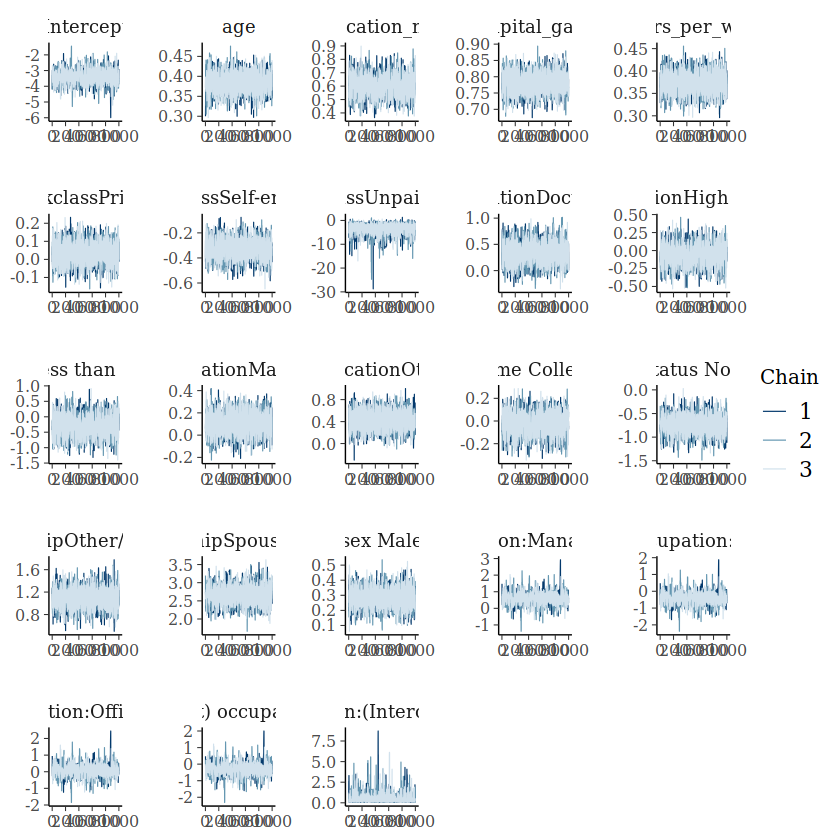

In [135]:
#Now we will perform convergence tests

plot(fit_bm, plotfun = "trace")

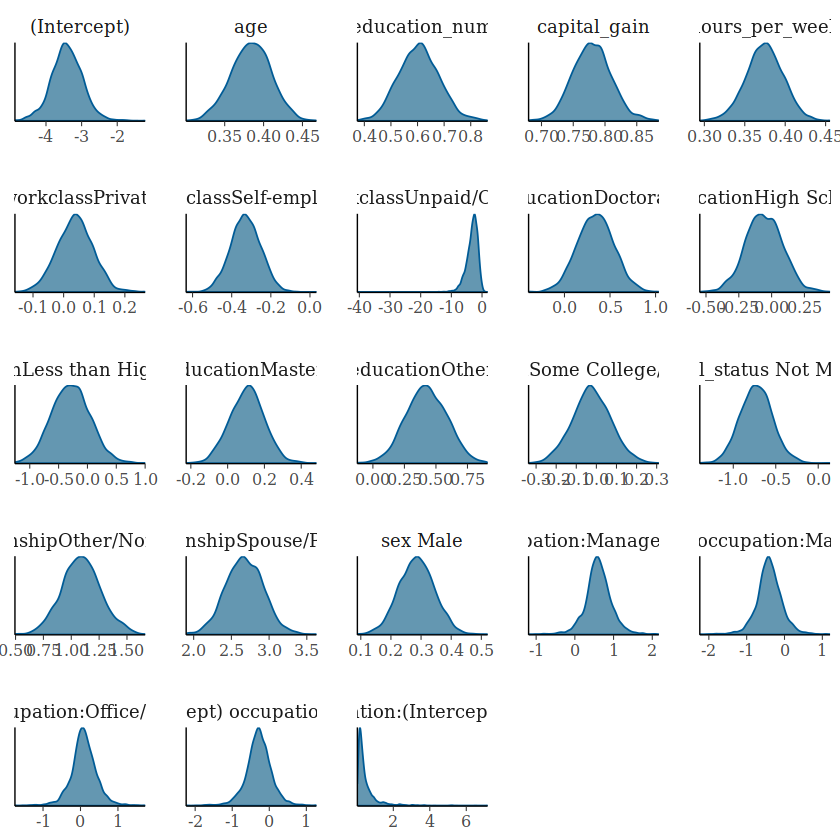

In [126]:
plot(fit_bm, plotfun = "dens")

Traceplots shows clear convergence and density plotss are fine too with most of the predictors centered around 0 with a small variance.

In [136]:
rhat(fit_bm)

(Intercept) 
                                        1.0008443 
                                              age 
                                        0.9998092 
                                    education_num 
                                        1.0017943 
                                     capital_gain 
                                        0.9998786 
                                   hours_per_week 
                                        0.9996828 
                                 workclassPrivate 
                                        0.9992810 
                           workclassSelf-employed 
                                        0.9997997 
                            workclassUnpaid/Other 
                                        1.0027638 
                               educationDoctorate 
                                        1.0004648 
                             educationHigh School 
                                        1.0024752 
                   educationLess than High School 
                                        1.0019674 
                                 educationMasters 
                                        1.0009529 
                                   educationOther 
                                        1.0004156 
                  educationSome College/Associate 
                                        1.0015571 
                       marital_status Not Married 
                                        0.9996772 
                      relationshipOther/Nonfamily 
                                        0.9990586 
                       relationshipSpouse/Partner 
                                        0.9993708 
                                         sex Male 
                                        0.9997005 
b[(Intercept) occupation:Management/Professional] 
                                        1.0016987 
         b[(Intercept) occupation:Manual/Service] 
                                        1.0015724 
b[(Intercept) occupation:Office/Clerical_&_Sales] 
                                        1.0019742 
                  b[(Intercept) occupation:Other] 
                                        1.0016998 
        Sigma[occupation:(Intercept),(Intercept)] 
                                        0.9998409

R Hat value is around 1 for all the predictors implying that all the chains have converged properly. Overall even with above few metrics we can be quite sure that our bayesian model have created good chains for our analysis.

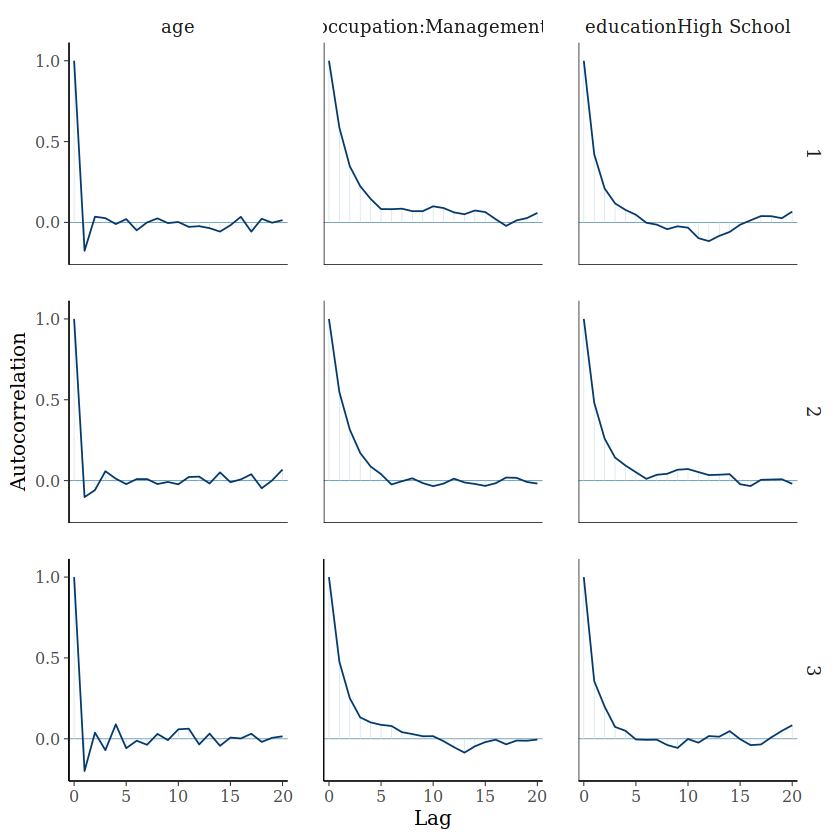

In [137]:
mcmc_acf(as.array(fit_bm), pars = c("age", "b[(Intercept) occupation:Management/Professional]", 'educationHigh School'), lags = 20)

In [140]:
autocorr.diag(as.mcmc(as.matrix(fit_bm)))

(Intercept) age         education_num capital_gain hours_per_week
Lag 0  1.000000000  1.00000000 1.0000000000   1.00000000   1.000000000  
Lag 1  0.430024848 -0.15816733 0.4473283244  -0.21085583  -0.162631895  
Lag 5  0.069269521 -0.01859894 0.0363415104  -0.01439364   0.026479401  
Lag 10 0.028792131  0.01390960 0.0109456361   0.02143026  -0.006304392  
Lag 50 0.001449844 -0.03192735 0.0004870541   0.01957865   0.008035997  
       workclassPrivate workclassSelf-employed workclassUnpaid/Other
Lag 0   1.000000000      1.000000e+00           1.0000000000        
Lag 1  -0.012823678     -7.165381e-06           0.0674861914        
Lag 5   0.001876148      7.194489e-03          -0.0134778816        
Lag 10 -0.004196675     -1.435964e-02          -0.0002040179        
Lag 50  0.028721676      7.454952e-03           0.0122180164        
       educationDoctorate educationHigh School ⋯
Lag 0   1.000000000       1.000000000          ⋯
Lag 1  -0.104425123       0.420346884          ⋯
Lag 5   0.025248212       0.032558115          ⋯
Lag 10 -0.029560532       0.011930138          ⋯
Lag 50 -0.007655435       0.001284094          ⋯
       educationSome College/Associate marital_status Not Married
Lag 0   1.000000000                     1.000000000              
Lag 1   0.318315703                     0.049603136              
Lag 5   0.028435809                     0.023444845              
Lag 10  0.009444941                     0.009824563              
Lag 50 -0.005426739                    -0.005327615              
       relationshipOther/Nonfamily relationshipSpouse/Partner sex Male    
Lag 0   1.000000000                 1.000000000                1.000000000
Lag 1   0.003634305                 0.197243044               -0.187746802
Lag 5   0.018133482                -0.010270583               -0.004221668
Lag 10 -0.013324209                -0.009133374                0.014293383
Lag 50 -0.005596241                -0.020505707               -0.013294764
       b[(Intercept) occupation:Management/Professional]
Lag 0  1.000000000                                      
Lag 1  0.538524027                                      
Lag 5  0.069077764                                      
Lag 10 0.023909037                                      
Lag 50 0.005572785                                      
       b[(Intercept) occupation:Manual/Service]
Lag 0  1.000000000                             
Lag 1  0.543611095                             
Lag 5  0.075773006                             
Lag 10 0.031550179                             
Lag 50 0.004512366                             
       b[(Intercept) occupation:Office/Clerical_&_Sales]
Lag 0   1.0000000000                                    
Lag 1   0.5392001133                                    
Lag 5   0.0745923856                                    
Lag 10  0.0248951433                                    
Lag 50 -0.0002395156                                    
       b[(Intercept) occupation:Other]
Lag 0  1.000000000                    
Lag 1  0.520012511                    
Lag 5  0.071812012                    
Lag 10 0.023877357                    
Lag 50 0.009059546                    
       Sigma[occupation:(Intercept),(Intercept)]
Lag 0   1.00000000                              
Lag 1   0.43492560                              
Lag 5   0.03038555                              
Lag 10 -0.01704884                              
Lag 50 -0.03227364

Above are auto correlation plots and table for some predictors as we can't plot all of them, but generally all of them have low autocorrelation and at around lag of 5-10 all of the predictors have near zero autocorrelation with 0th value. This implies that bayesian model is producing chains with good information overall.

In [138]:
#HPD for the fitted model
HPDinterval(as.mcmc(as.matrix(fit_bm)))

lower       upper      
(Intercept)                                       -4.27411373 -2.50629723
age                                                0.33692633  0.43285796
education_num                                      0.44531071  0.75201459
capital_gain                                       0.72382593  0.84408102
hours_per_week                                     0.32754487  0.41771275
workclassPrivate                                  -0.08006447  0.15052487
workclassSelf-employed                            -0.47464443 -0.17253378
workclassUnpaid/Other                             -7.76769435 -0.09870139
educationDoctorate                                -0.06117520  0.73915139
educationHigh School                              -0.34416069  0.23839471
educationLess than High School                    -0.95110282  0.35415501
educationMasters                                  -0.07855185  0.29267394
educationOther                                     0.08640692  0.76376469
educationSome College/Associate                   -0.22686118  0.16298631
marital_status Not Married                        -1.09455574 -0.32522887
relationshipOther/Nonfamily                        0.75526555  1.43396421
relationshipSpouse/Partner                         2.17092193  3.16132920
sex Male                                           0.16017974  0.40589707
b[(Intercept) occupation:Management/Professional] -0.12787326  1.28051684
b[(Intercept) occupation:Manual/Service]          -1.10128126  0.31213377
b[(Intercept) occupation:Office/Clerical_&_Sales] -0.61911013  0.77136572
b[(Intercept) occupation:Other]                   -0.97573533  0.43591261
Sigma[occupation:(Intercept),(Intercept)]          0.04244746  1.64038093

In [139]:
effectiveSize(as.mcmc(as.matrix(fit_bm)))

(Intercept) 
                                        1043.4320 
                                              age 
                                        4125.9309 
                                    education_num 
                                        1046.3618 
                                     capital_gain 
                                        4601.6385 
                                   hours_per_week 
                                        4163.9186 
                                 workclassPrivate 
                                        3001.8663 
                           workclassSelf-employed 
                                        2950.2293 
                            workclassUnpaid/Other 
                                        2034.8512 
                               educationDoctorate 
                                        2861.1105 
                             educationHigh School 
                                        1094.3952 
                   educationLess than High School 
                                        1227.3175 
                                 educationMasters 
                                        3045.9024 
                                   educationOther 
                                        2945.4060 
                  educationSome College/Associate 
                                        1233.6837 
                       marital_status Not Married 
                                        2454.6798 
                      relationshipOther/Nonfamily 
                                        2438.5489 
                       relationshipSpouse/Partner 
                                        1902.9914 
                                         sex Male 
                                        4027.5406 
b[(Intercept) occupation:Management/Professional] 
                                         899.5416 
         b[(Intercept) occupation:Manual/Service] 
                                         886.6937 
b[(Intercept) occupation:Office/Clerical_&_Sales] 
                                         849.0191 
                  b[(Intercept) occupation:Other] 
                                         868.4710 
        Sigma[occupation:(Intercept),(Intercept)] 
                                        1080.6666

Effective sample sizes are good overall. We took 3 chains with 1000 iterations for burnin and 1000 iterations for recording, most of the variables have effective sample size across 1000-5000 where 1000 is considered good size generally in practice. For some we have less than 1000 but they are close to 1000 nevertheless. Benefit of all this is that we have high number of independent draws across all the variables, and this was expected because of low autocorrelation.

Overall from above tests, plots, and summary observations we can be confirmed that the model has converged properly with 3 chains at 2000 iterations. We can run smaller chains too but since stan_glmer by default use 1000 for burn it we are left with 1000 for our analysis so atleast 2000 iterations should be minimum for this dataset.

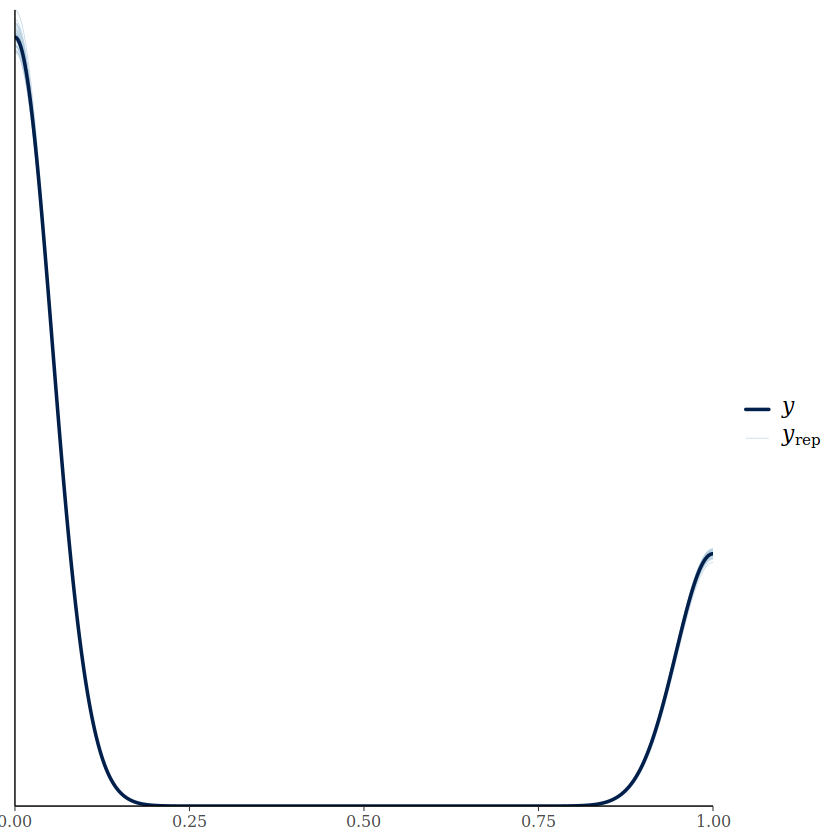

In [141]:
pp_check(fit_bm)


In [142]:
colMeans(as.mcmc(as.matrix(fit_bm)))

(Intercept) 
                                      -3.38251144 
                                              age 
                                       0.38344360 
                                    education_num 
                                       0.60348091 
                                     capital_gain 
                                       0.77935839 
                                   hours_per_week 
                                       0.37397247 
                                 workclassPrivate 
                                       0.03663993 
                           workclassSelf-employed 
                                      -0.33031219 
                            workclassUnpaid/Other 
                                      -3.44709222 
                               educationDoctorate 
                                       0.34548684 
                             educationHigh School 
                                      -0.06068847 
                   educationLess than High School 
                                      -0.29746580 
                                 educationMasters 
                                       0.10280765 
                                   educationOther 
                                       0.42463167 
                  educationSome College/Associate 
                                      -0.02663170 
                       marital_status Not Married 
                                      -0.73603633 
                      relationshipOther/Nonfamily 
                                       1.08922517 
                       relationshipSpouse/Partner 
                                       2.66343360 
                                         sex Male 
                                       0.28679176 
b[(Intercept) occupation:Management/Professional] 
                                       0.59746915 
         b[(Intercept) occupation:Manual/Service] 
                                      -0.41323493 
b[(Intercept) occupation:Office/Clerical_&_Sales] 
                                       0.07925048 
                  b[(Intercept) occupation:Other] 
                                      -0.29102691 
        Sigma[occupation:(Intercept),(Intercept)] 
                                       0.50430938

In [181]:
# Predict on train set
train_probs <- posterior_linpred(fit_bm, newdata = df_bm_train, transform = TRUE)
train_pred <- ifelse(colMeans(train_probs) > 0.5, 1, 0)
train_acc <- mean(train_pred == df_bm_train$income_group)

# Predict on test set
test_probs <- posterior_linpred(fit_bm, newdata = df_bm_test, transform = TRUE)
test_pred <- ifelse(colMeans(test_probs) > 0.5, 1, 0)
test_acc <- mean(test_pred == df_bm_test$income_group)

cat("Train Accuracy:", train_acc, "\n")
cat("Test Accuracy:", test_acc, "\n")

Instead of posterior_linpred(..., transform=TRUE) please call posterior_epred(), which provides equivalent functionality.

Instead of posterior_linpred(..., transform=TRUE) please call posterior_epred(), which provides equivalent functionality.



Train Accuracy: 0.8384634 
Test Accuracy: 0.8467877 


Instead of posterior_linpred(..., transform=TRUE) please call posterior_epred(), which provides equivalent functionality.

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.895

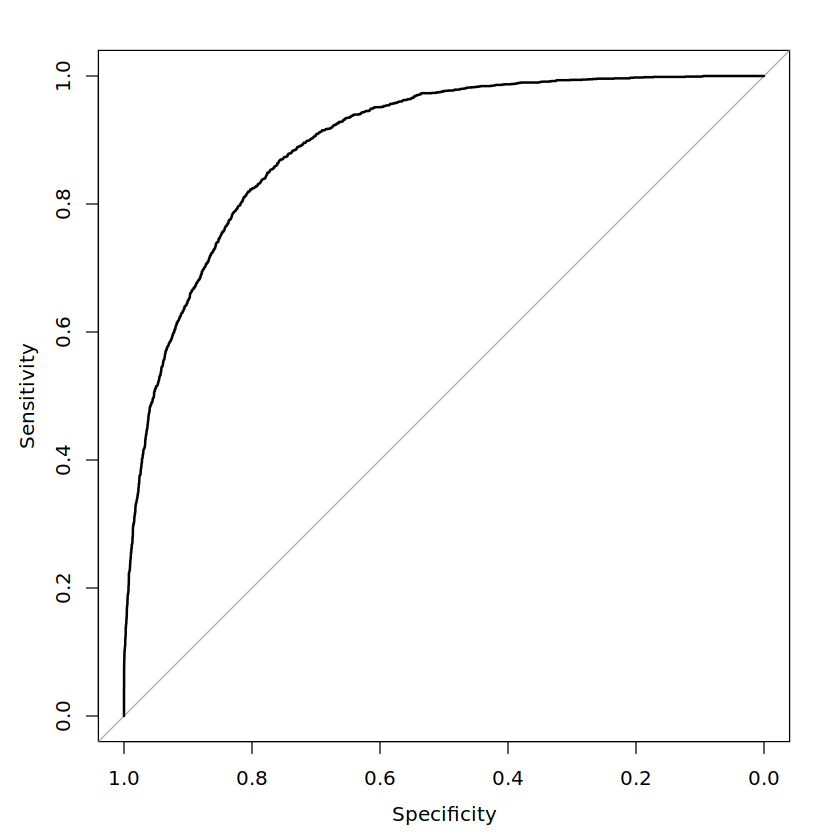

In [185]:
pred_probs <- posterior_linpred(fit_bm, newdata = df_bm_test, transform = TRUE)
pred_mean <- colMeans(pred_probs)

roc_obj <- roc(df_bm_test$income_group, pred_mean)
auc(roc_obj)
plot(roc_obj)

`geom_smooth()` using formula = 'y ~ x'


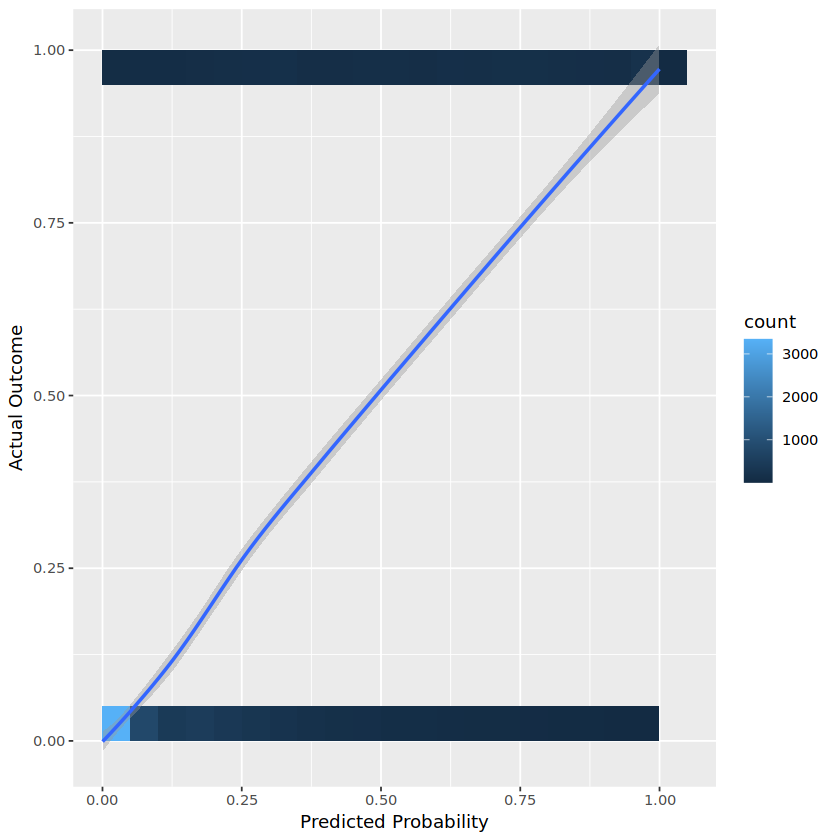

In [186]:
#predictive probabilites are reliable
df_calib <- data.frame(
  pred = pred_mean,
  actual = df_bm_test$income_group
)
ggplot(df_calib, aes(x = pred, y = actual)) +
  geom_bin2d(bins = 20) +
  geom_smooth(method = "loess") +
  labs(x = "Predicted Probability", y = "Actual Outcome")


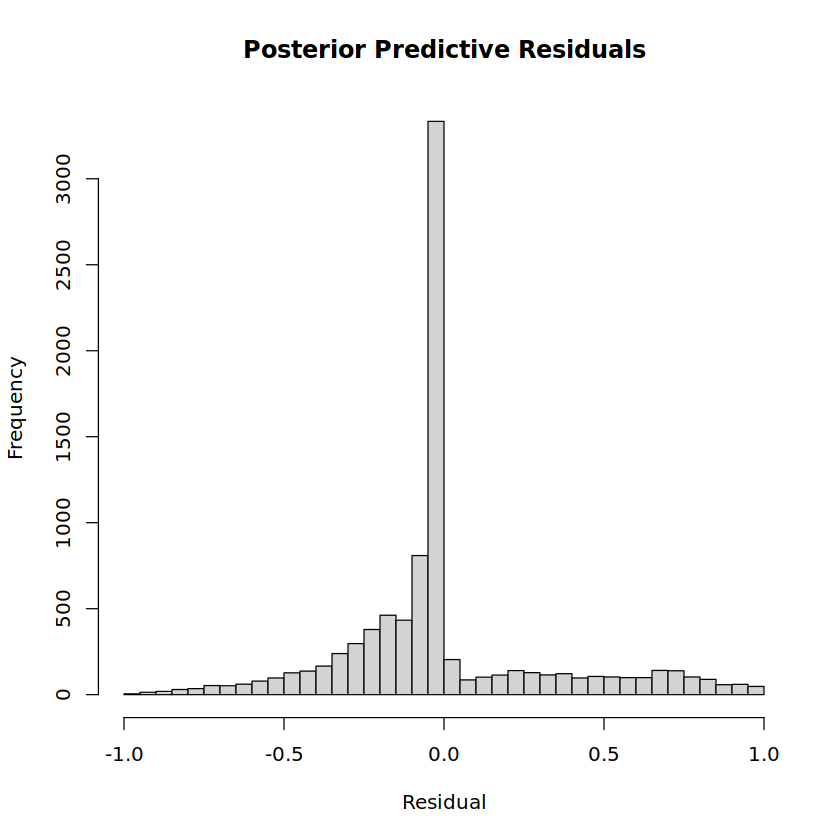

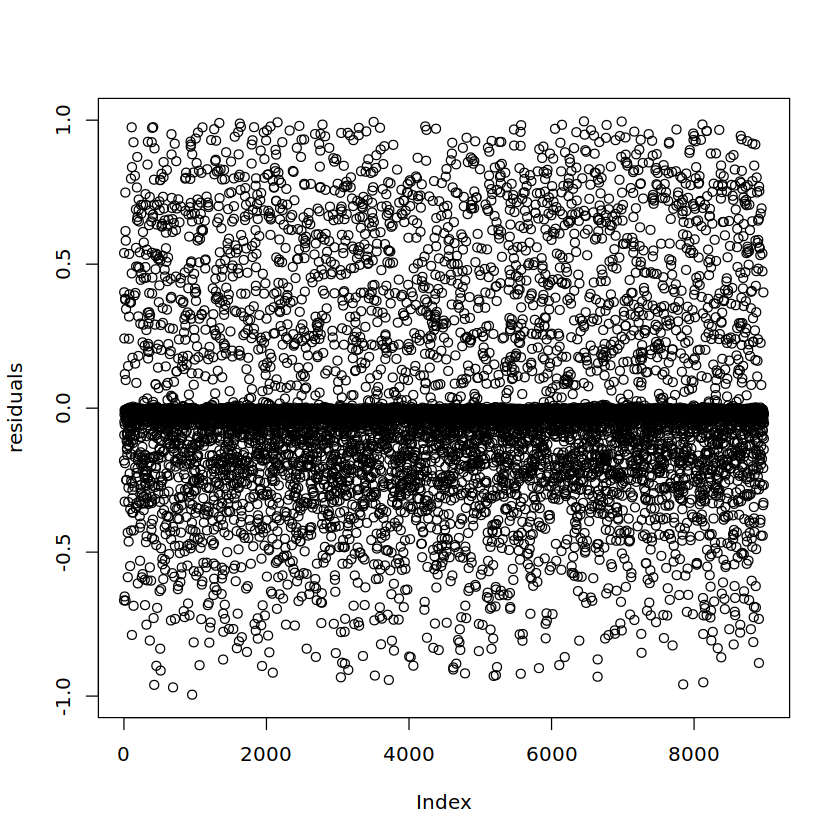

In [187]:
# Get posterior predictive draws for the test set
yrep <- posterior_predict(fit_bm, newdata = df_bm_test)
# Calculate mean predicted value for each observation
yrep_mean <- colMeans(yrep)
# Calculate residuals
residuals <- df_bm_test$income_group - yrep_mean

# Plot residuals
hist(residuals, breaks = 30, main = "Posterior Predictive Residuals", xlab = "Residual")
plot(residuals)

Residuals are cenetered around 0 with a spread. Spread does not have any specific pattern and no major outliers exist outside the spread. Overall, residuals look healthy.

In [192]:
# True/False Positives/Negatives
TP <- sum(test_pred == 1 & df_bm_test$income_group == 1)
FP <- sum(test_pred == 1 & df_bm_test$income_group == 0)
FN <- sum(test_pred == 0 & df_bm_test$income_group == 1)

precision <- TP / (TP + FP)
recall <- TP / (TP + FN)
F1 <- 2 * (precision * recall) / (precision + recall)

cat("F1 Score:", F1, "\n")

F1 Score: 0.6396019 


In [189]:
fit_matrix <- as.matrix(fit_bm)
cat('Proportion of population having income greater than 50 K:',round(mean(train_pred),2),'\n')

Proportion of population having income greater than 50 K: 0.2 


In [190]:
# For a new person
newdata <- data.frame(
  age = 0,  # mean if scaled
  education_num = 0,  # mean if scaled
  capital_gain = 0,
  hours_per_week = 0,
  workclass = "Private",
  education = "Bachelors",
  marital_status = " Married",
  relationship = "Spouse/Partner",
  sex = " Female",
  occupation = "Manual/Service"
)

yrep_new <- posterior_predict(fit_bm, newdata = newdata, draws = 1000)
mean_prob <- mean(yrep_new)
# 95% credible interval:
cat("Posterior mean probability:", mean_prob, "\n")

Posterior mean probability: 0.254 


Now we will check other proportions across the MCMC sample distribution which we got.

In [191]:
# Subset test data
df_female <- subset(df_bm_test, sex == " Female")
df_male <- subset(df_bm_test, sex == " Male")

# Get posterior predictive draws for all females
yrep_female <- posterior_predict(fit_bm, newdata = df_female)
yrep_male <- posterior_predict(fit_bm, newdata = df_male)

# For each posterior draw, calculate the proportion of high income
prop_high_income_draws_female <- rowMeans(yrep_female)
prop_high_income_draws_male <- rowMeans(yrep_male)

prob_gt_20 <- mean(prop_high_income_draws_female >= 0.441)
cat("Posterior probability that proportion of women having high income >= 44.1%:", prob_gt_20, "\n")
cat('Posterior Mean for Women having high income:', mean(prop_high_income_draws_female),"\n")
cat('Posterior Mean for Men having high income:', mean(prop_high_income_draws_male),"\n")
cat('Posterior Mean for Men having high income compare to women:', mean(prop_high_income_draws_male > prop_high_income_draws_female))

Posterior probability that proportion of women having high income >= 44.1%: 0 
Posterior Mean for Women having high income: 0.1076074 
Posterior Mean for Men having high income: 0.3073083 
Posterior Mean for Men having high income compare to women: 1

In [145]:
#checking privately employed employees proportion 
df_private <- subset(df_bm_test, workclass == "Private")
df_govt <- subset(df_bm_test, workclass == "Government")

yrep_private <- posterior_predict(fit_bm, newdata = df_private)
yrep_govt <- posterior_predict(fit_bm, newdata = df_govt)

# For each posterior draw, calculate the proportion of high income
prop_high_income_draws_private <- rowMeans(yrep_private)
prop_high_income_draws_govt <- rowMeans(yrep_govt)

cat('Posterior Mean for People employed in Private Sector having high income:', mean(prop_high_income_draws_private), '\n')
cat('Posterior Mean for People employed in Government Sector having high income:', mean(prop_high_income_draws_govt))

Posterior Mean for People employed in Private Sector having high income: 0.210934 
Posterior Mean for People employed in Government Sector having high income: 0.3085451

In [171]:
#checking posterior mean for people with age equal to or greater than 38 (mean age) and education_num greater than 10(mean education year)
#having income_group greater than 50K USD per annum

df_age <- df_bm_test[df_bm_test$age >= 0 & df_bm_test$education_num >= 0,]

cat('Posterior Mean for People having age greater than 38 and education years greater than 10 having high income:', mean(colMeans(posterior_predict(fit_bm, new_data = df_age))))

Posterior Mean for People having age greater than 38 and education years greater than 10 having high income: 0.2470878

In Bayesian Model here we got the stationary distribution with which we can have even more indepth analysis than shown above. But it is to be noted that since this model is not including weights into considerations sub groups having low number of observations in the sample will not be having good posterior prediction with this model, but for all other cases there should not be any problem as we saw before in weight analysis in EDA and Linear Model section that while weights can improve the model besides the issues with subgroups, all other proportions and other findings like Accuracy, F Scores, and others are same for both weight and not weighted models.


## Neural Network

In this section we will git a basic neurel network. For more complex neurel network Tensorflow/Pytorch seems to be a better fit while running them on python. Still, a basic neurel network will be enough for us to compare the models in this project.

For the linear model we will cover all the variables besides fmlwgt as linear model does not have issue with more predictors like Linear Model and Bayesian Models have

In [864]:
df <-  subset(data, select = -fnlwgt)
df$income_group <- ifelse(df$income_group == " >50K", 1, 0)
dummies <- dummyVars(income_group ~ ., data = df)
df_nn <- as.data.frame(predict(dummies, newdata = df))
num_cols <- sapply(df_nn, is.numeric)
df_nn[num_cols] <- scale(df_nn[num_cols])
df_nn$income_group <- as.factor(df$income_group)

head(df_nn)

age         workclass Federal-gov workclass Local-gov workclass Private
1  0.04659375 -0.1801466            -0.2716969          -1.6888387       
2  0.88419263 -0.1801466            -0.2716969          -1.6888387       
3 -0.02955160 -0.1801466            -0.2716969           0.5921031       
4  1.11262868 -0.1801466            -0.2716969           0.5921031       
5 -0.79100512 -0.1801466            -0.2716969           0.5921031       
6 -0.10569695 -0.1801466            -0.2716969           0.5921031       
  workclass Self-emp-inc workclass Self-emp-not-inc workclass State-gov
1 -0.1889529             -0.2984857                  4.7372665         
2 -0.1889529              3.3501328                 -0.2110851         
3 -0.1889529             -0.2984857                 -0.2110851         
4 -0.1889529             -0.2984857                 -0.2110851         
5 -0.1889529             -0.2984857                 -0.2110851         
6 -0.1889529             -0.2984857                 -0.2110851         
  workclass Without-pay education 10th education 11th ⋯
1 -0.02163025           -0.1672894     -0.1903706     ⋯
2 -0.02163025           -0.1672894     -0.1903706     ⋯
3 -0.02163025           -0.1672894     -0.1903706     ⋯
4 -0.02163025           -0.1672894      5.2527370     ⋯
5 -0.02163025           -0.1672894     -0.1903706     ⋯
6 -0.02163025           -0.1672894     -0.1903706     ⋯
  native_country Puerto-Rico native_country Scotland native_country South
1 -0.06045068                -0.0191722              -0.04841202         
2 -0.06045068                -0.0191722              -0.04841202         
3 -0.06045068                -0.0191722              -0.04841202         
4 -0.06045068                -0.0191722              -0.04841202         
5 -0.06045068                -0.0191722              -0.04841202         
6 -0.06045068                -0.0191722              -0.04841202         
  native_country Taiwan native_country Thailand native_country Trinadad&Tobago
1 -0.0370327            -0.02383656             -0.02452803                   
2 -0.0370327            -0.02383656             -0.02452803                   
3 -0.0370327            -0.02383656             -0.02452803                   
4 -0.0370327            -0.02383656             -0.02452803                   
5 -0.0370327            -0.02383656             -0.02452803                   
6 -0.0370327            -0.02383656             -0.02452803                   
  native_country United-States native_country Vietnam native_country Yugoslavia
1  0.3111829                   -0.0462861             -0.02312448              
2  0.3111829                   -0.0462861             -0.02312448              
3  0.3111829                   -0.0462861             -0.02312448              
4  0.3111829                   -0.0462861             -0.02312448              
5 -3.2134371                   -0.0462861             -0.02312448              
6  0.3111829                   -0.0462861             -0.02312448              
  income_group
1 0           
2 0           
3 0           
4 0           
5 0           
6 0

In [865]:
set.seed(123)
train_idx <- sample(1:dim(df_nn)[1], size = 0.8*dim(df_nn)[1])
train_nn <- df_nn[train_idx, ]
test_nn <- df_nn[-train_idx, ]

In [855]:
head(train_nn)

age        workclass Federal-gov workclass Local-gov workclass Private
20485  1.4933554 -0.1801466            -0.2716969          -1.6888387       
20537  0.3511752 -0.1801466             3.6804495          -1.6888387       
29145  1.3410647 -0.1801466            -0.2716969           0.5921031       
27293 -0.1818423 -0.1801466            -0.2716969           0.5921031       
31390 -0.2579877 -0.1801466            -0.2716969           0.5921031       
3275   1.0364833 -0.1801466             3.6804495          -1.6888387       
      workclass Self-emp-inc workclass Self-emp-not-inc workclass State-gov
20485 -0.1889529              3.3501328                 -0.2110851         
20537 -0.1889529             -0.2984857                 -0.2110851         
29145 -0.1889529             -0.2984857                 -0.2110851         
27293 -0.1889529             -0.2984857                 -0.2110851         
31390 -0.1889529             -0.2984857                 -0.2110851         
3275  -0.1889529             -0.2984857                 -0.2110851         
      workclass Without-pay education 10th education 11th ⋯
20485 -0.02163025           -0.1672894     -0.1903706     ⋯
20537 -0.02163025           -0.1672894     -0.1903706     ⋯
29145 -0.02163025           -0.1672894     -0.1903706     ⋯
27293 -0.02163025           -0.1672894     -0.1903706     ⋯
31390 -0.02163025           -0.1672894     -0.1903706     ⋯
3275  -0.02163025           -0.1672894     -0.1903706     ⋯
      native_country Puerto-Rico native_country Scotland native_country South
20485 -0.06045068                -0.0191722              -0.04841202         
20537 -0.06045068                -0.0191722              -0.04841202         
29145 -0.06045068                -0.0191722              -0.04841202         
27293 -0.06045068                -0.0191722              -0.04841202         
31390 -0.06045068                -0.0191722              -0.04841202         
3275  -0.06045068                -0.0191722              -0.04841202         
      native_country Taiwan native_country Thailand
20485 -0.0370327            -0.02383656            
20537 -0.0370327            -0.02383656            
29145 -0.0370327            -0.02383656            
27293 -0.0370327            -0.02383656            
31390 -0.0370327            -0.02383656            
3275  -0.0370327            -0.02383656            
      native_country Trinadad&Tobago native_country United-States
20485 -0.02452803                    0.3111829                   
20537 -0.02452803                    0.3111829                   
29145 -0.02452803                    0.3111829                   
27293 -0.02452803                    0.3111829                   
31390 -0.02452803                    0.3111829                   
3275  -0.02452803                    0.3111829                   
      native_country Vietnam native_country Yugoslavia income_group
20485 -0.0462861             -0.02312448               NaN         
20537 -0.0462861             -0.02312448               NaN         
29145 -0.0462861             -0.02312448               NaN         
27293 -0.0462861             -0.02312448               NaN         
31390 -0.0462861             -0.02312448               NaN         
3275  -0.0462861             -0.02312448               NaN

In [869]:
#fitting a simple neural network with 8 neurons
nn_model <- nnet(income_group ~ ., data = train_nn, size = 8, decay = 0.001, trace = FALSE)

In [871]:
pred_probs <- predict(nn_model, newdata = test_nn, type = "raw")
pred_class <- ifelse(pred_probs >= 0.5, 1, 0)
actual <- as.numeric(as.character(test_nn$income_group))
accuracy <- mean(pred_class == actual)
cat("Neural Network Accuracy:", round(accuracy, 4), "\n")
cat('F1 Score for Neural Network:', F1_Score(y_pred = pred_class, y_true = actual, positive = "1"))

Neural Network Accuracy: 0.8562 
F1 Score for Neural Network: 0.6732448

Neural Network accuracy and F1 score is slightly lower than Generalized Additive Model. Of course we can improve the neural network by using more complex packages such as keras and tensorflow which would be best trained by using a GPU. For this project a simple neurel network is enough and even a simple neurel network of 8 hidden units and 1 layer is giving us comparable predictive results as GAM.

However it is to be noted that while GAM is using smoothing function for some of the variables it still has more explainability power than the Neurel Network here and depending upon the task, reader may prefer using GAM over neural network.

## Conclusion

In this project we covered Census Income data based on US Census 1994 available at UC Irvine ML repo. We first observed the datset and then formed the hypothesis based on the studies and facts known across multiple studies during the 1990-1993 period. After that we performed data cleaning, explantory data analysis, and hypothesis tests.

For the hypothesis tests we used weights to properly form population estimates and test them. However, we rejected all our hypothesis, average number of education year as per census 1994 data was not equal to 11.5 as media claimed, its around 10 years with low variance. Similarly proportion of women having high income was not equal to proportion of women actually in the workforce that is 44.1%, we got an estimate of 14% only, a very big difference. And once again we rejected the hypothesis that proportion of people in US falling in high income group of earning more than 50K USD in 1994 was 15%, we got the estimate at 24%. Considering that our hypothesis was based on 1990-93 data but even then in one year inflation can not be so big that people earning more than 50K USD a year, more than 100K USD per year in 2025 inflation adjusted, increased by more than 50% in a year.

Besides hypothesis tests we also performed various analysis on data itself and found multiple relationships across them like sex, married status, occupation, and age having major influence in deciding if a person would be in high income bracket. After cleaning the data and preparing it for the models we fitted Linear Model specifically to test these relationships, and for some levels we indeed got appropriate positive and negative coefficients which told us the relationships like more education years helping in more income. But we also got some concerning evidence that some predictors provided unfair advatage during that period, for example being a white male in manageriaal position while being married in 1994 would ensure that a person have higher probability of having higher income even if all the factors besides gender or race or both are different, and with huge difference at hat.  

After that we formed bayesian hiearchical model with which we were able to MCMC chains and good posterior distributions for multiple predictors while allowing group level priors for occupation vary as it was chosen as Hierarchical prior. Our MCMC Model converged properly and we were able to form multiple posterior predictions like government employees having 31% of having high income compared to 21% for private sector, which is quite different from today. Overall probability for high income group was 20% which is actually lower than 24% we got from frequentist approach and is actually  near to our assumed proportion for same period. We could analyze the model further for more interesting finding. Overall Bayesian Model allowed us to obtain Stationary Distribution for our dataset and we got a good usable model with which we can form probabilistic statements about parameters or predictions with credible intervals.

And in the end we fitted a small nueral network and observed that even with a relatively basic and small netwrok neurel network had great predictive capability as cen be observed below.

| Model           | Accuracy  | F1 Score   |
|-----------------|-----------|-----------|
| Generalized Linear Model             | 0.8656    | 0.6498     |
| Generalized Additive Model             | 0.8656    | 0.6786    |
| Bayesian Hierarchical Model       | 0.8468    | 0.6396    |
| Neural Network  | 0.8562    | 0.6732    |

While Neural Network would not be good for inference like additive model or for making probablity statements with credible intervals in bayesial model it worked great for accuracy and F1 scores with both scores quite near our best model for prediction, Generalized Additive Model. We can improve Neural Network a lot by by using more complex neural networks in tensorflow or pytorch.

Overall, in the project we performed a proper statistical analysis for the Census Income Data starting while also focusing on planned hypothesis with proper power analysis. For understanding the relationships across the variables Generalized Additive Model helped us a lot, and by using the additive model we were able to form a linear model which outperformed all other models too. Bayesian Model also helped us to understand the relationships across the data while helping us form direct credible estimates with the stationary distribution captured by Monte Carlo Chains while allowing for hierarchical priors. And in the end we formed a basic neural network to find that even with basic neural network with least amount of work and hyperparameter tuning could provide us predictive capability approximately equal to our best fit model.

## Bibliography

These are external sources we used to collect the data and form the hypothesis.
1. Census Income - https://archive.ics.uci.edu/dataset/20/census+income
2. NCES Digest of educational studies - https://nces.ed.gov/pubs91/91660.pdf
3. World Bank US labor data- https://data.worldbank.org/indicator/SL.TLF.TOTL.FE.ZS?locations=US
4. Wage stagnation chart US - https://www.epi.org/publication/charting-wage-stagnation/